In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datacmp

In [6]:
df = pd.read_csv('laptop_data.csv')
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [7]:
print(datacmp.get_detailed(df))

╭────────────────┬──────────╮
│ Info           │   Values │
├────────────────┼──────────┤
│ Number of Rows │     1303 │
│ Number of Rows │       12 │
╰────────────────┴──────────╯

╭──────────────────┬─────────┬────────┬────────────┬──────────┬──────────────╮
│ Column Name      │ Dtype   │   Null │   Not Null │ Mean     │   Unique Val │
├──────────────────┼─────────┼────────┼────────────┼──────────┼──────────────┤
│ Unnamed: 0       │ int64   │      0 │       1303 │ 651.0    │         1303 │
│ Company          │ object  │      0 │       1303 │ -        │           19 │
│ TypeName         │ object  │      0 │       1303 │ -        │            6 │
│ Inches           │ float64 │      0 │       1303 │ 15.02    │           18 │
│ ScreenResolution │ object  │      0 │       1303 │ -        │           40 │
│ Cpu              │ object  │      0 │       1303 │ -        │          118 │
│ Ram              │ object  │      0 │       1303 │ -        │            9 │
│ Memory           │ object  

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = pd.to_numeric(df['Weight'])

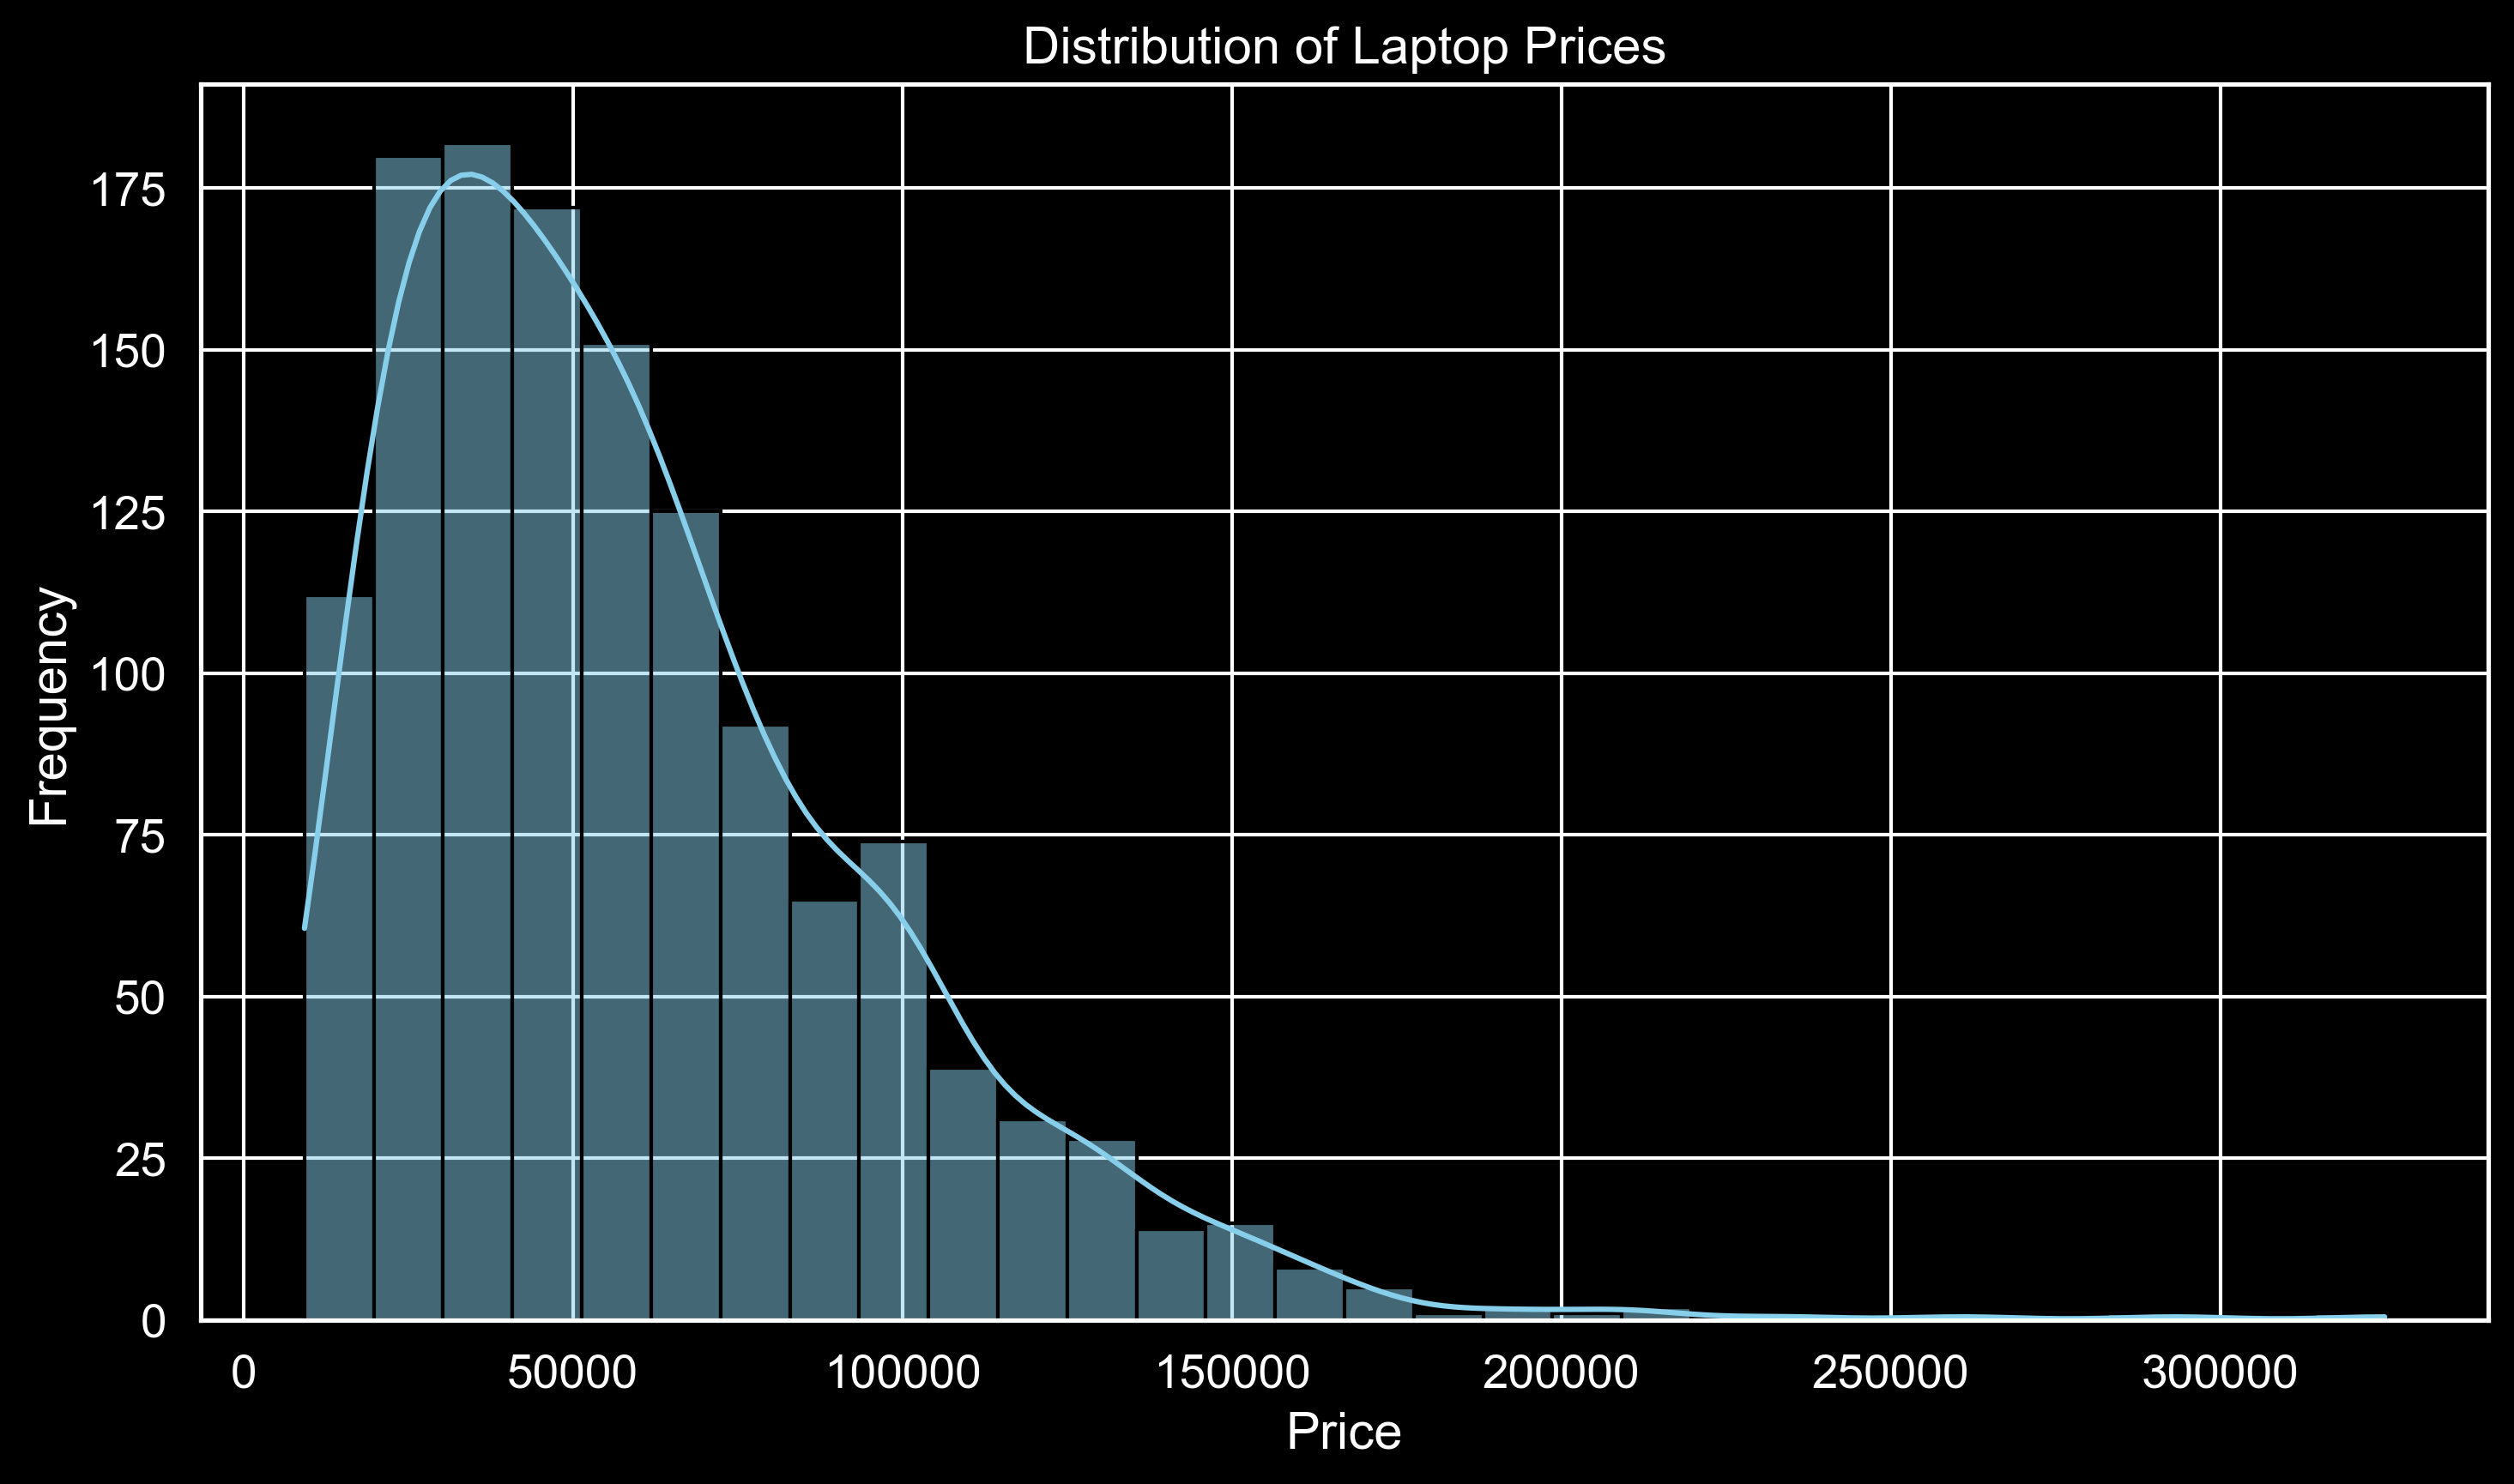

In [49]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['Price'], kde=True, color='skyblue', bins=30, edgecolor='black')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distributions/price_distribution.png', dpi=300)
plt.show()

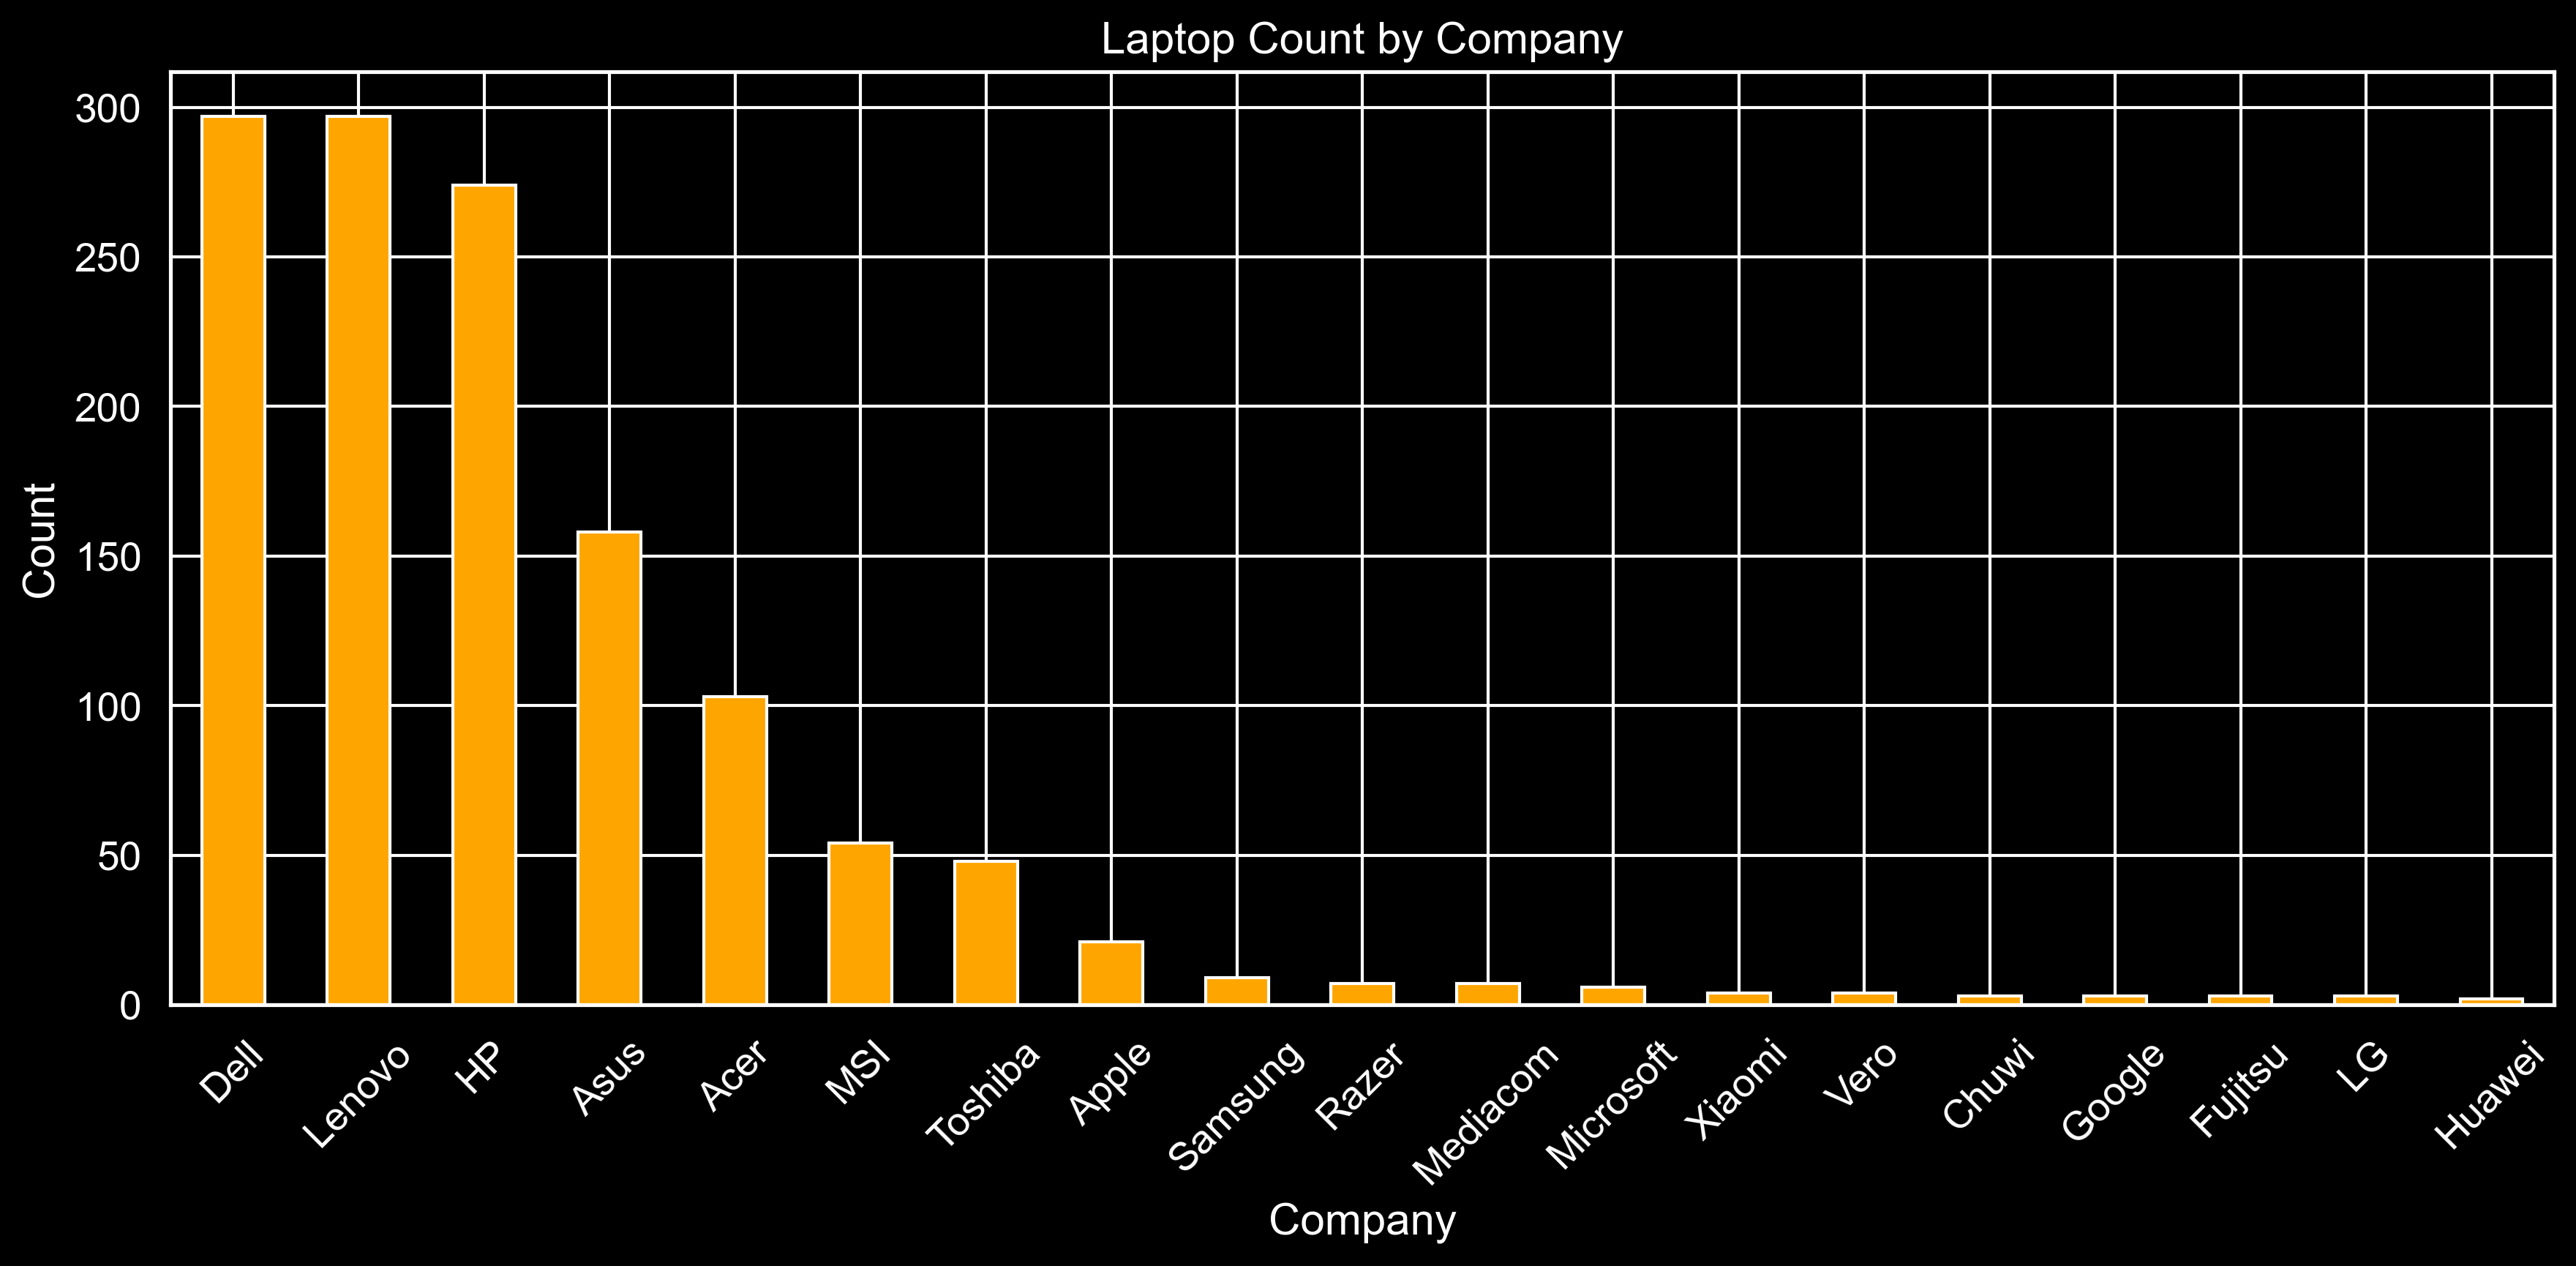

In [47]:
plt.style.use('dark_background')

plt.figure(figsize=(12, 6), dpi=300)
df['Company'].value_counts().plot(kind='bar', color='orange')

plt.title('Laptop Count by Company')
plt.xlabel('Company')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('distributions/company_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\549600916.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None, color='lime', edgecolor='white')


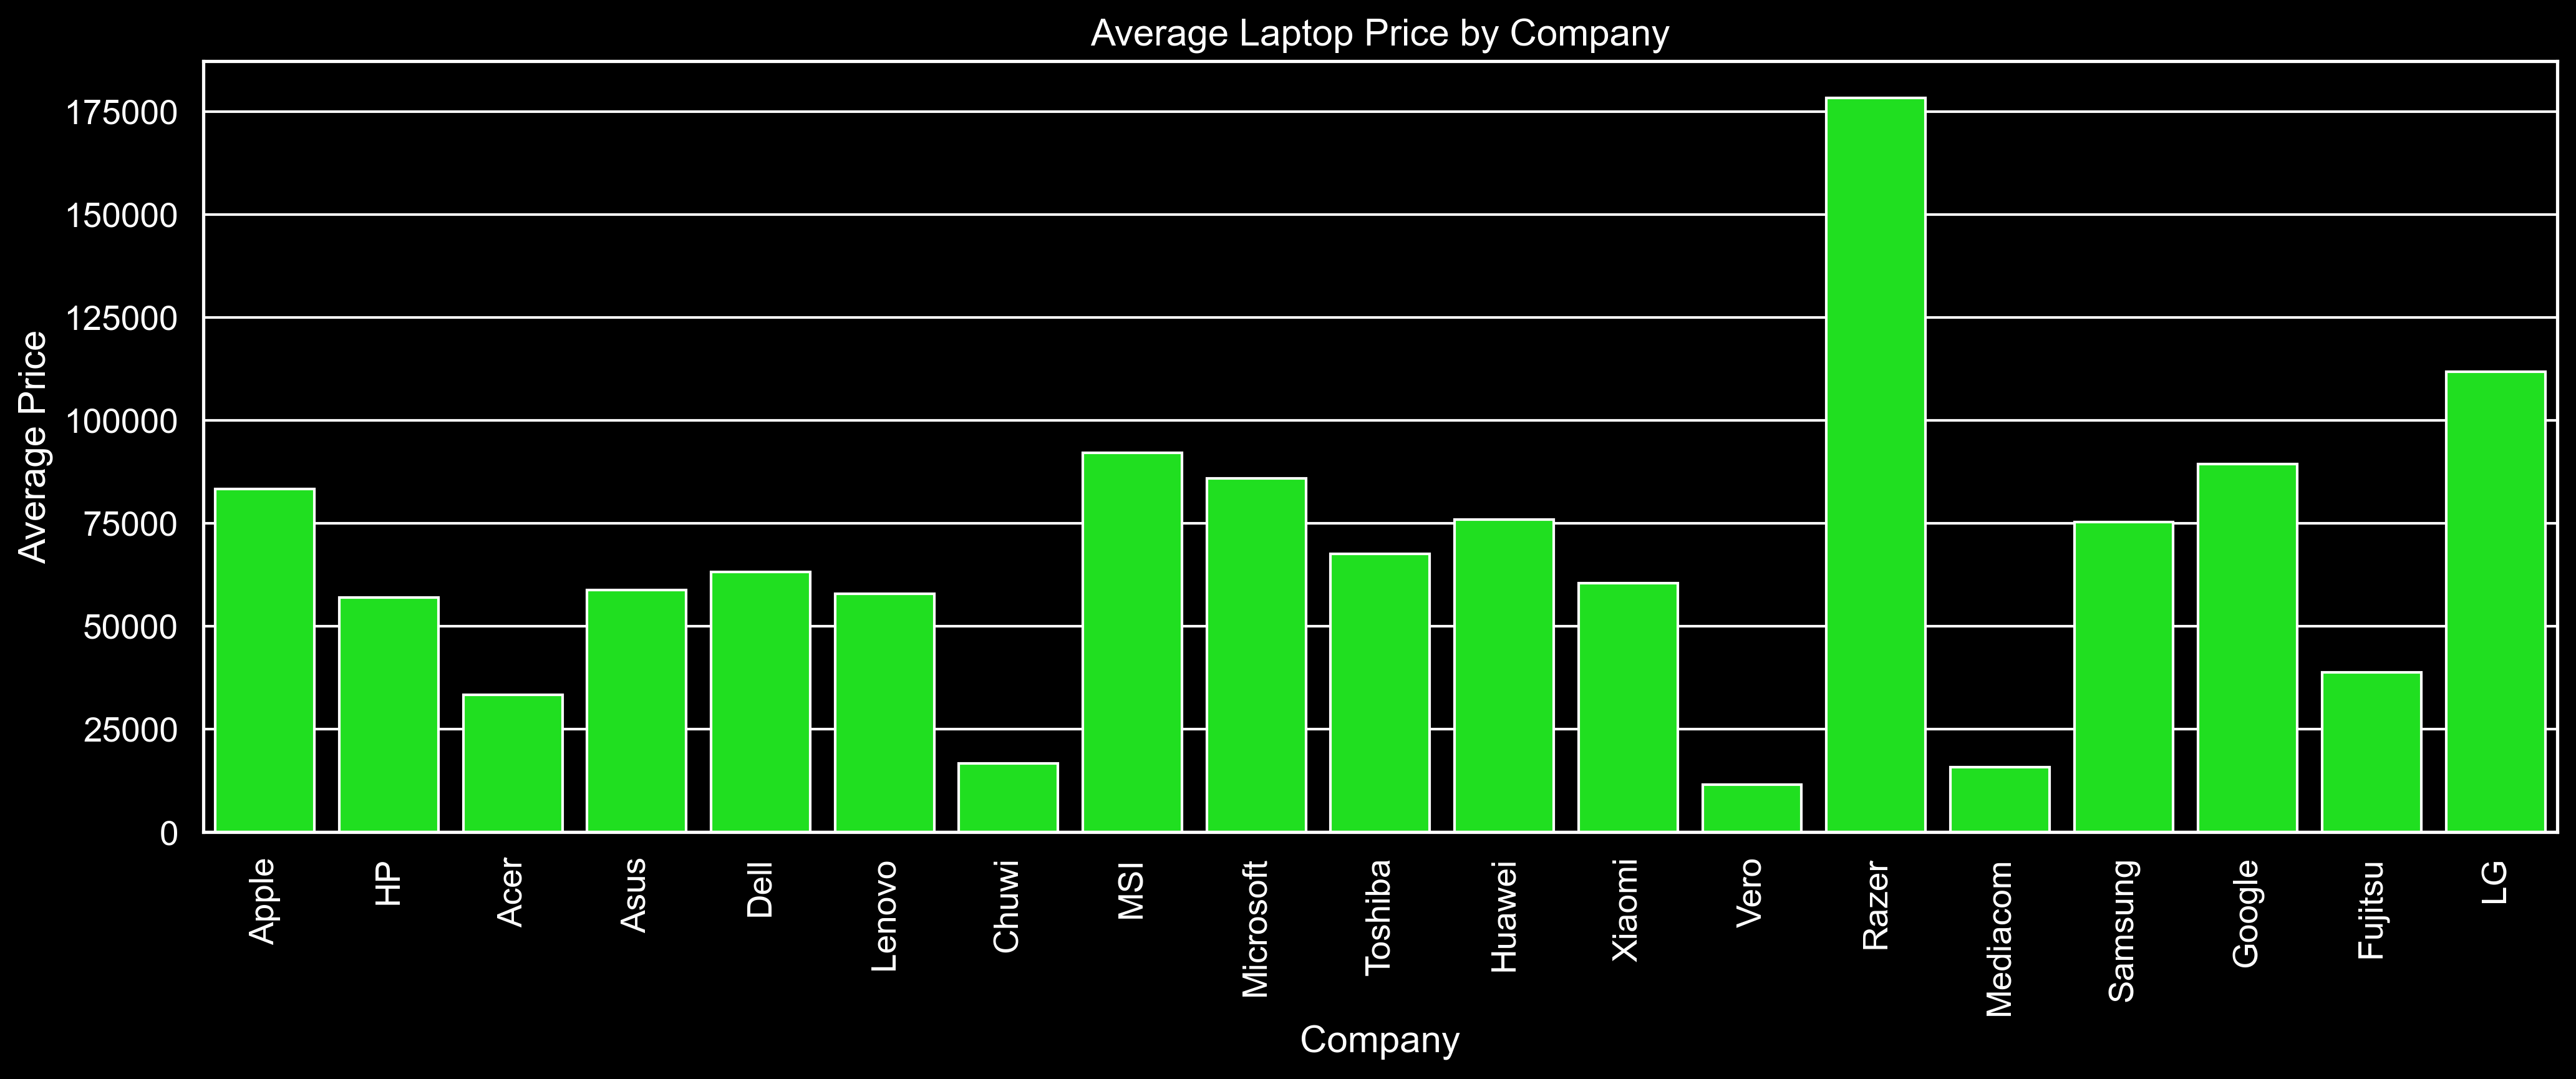

In [45]:
plt.style.use('dark_background')

plt.figure(figsize=(14, 6), dpi=300)
sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None, color='lime', edgecolor='white')
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_company.png', dpi=300)
plt.show()

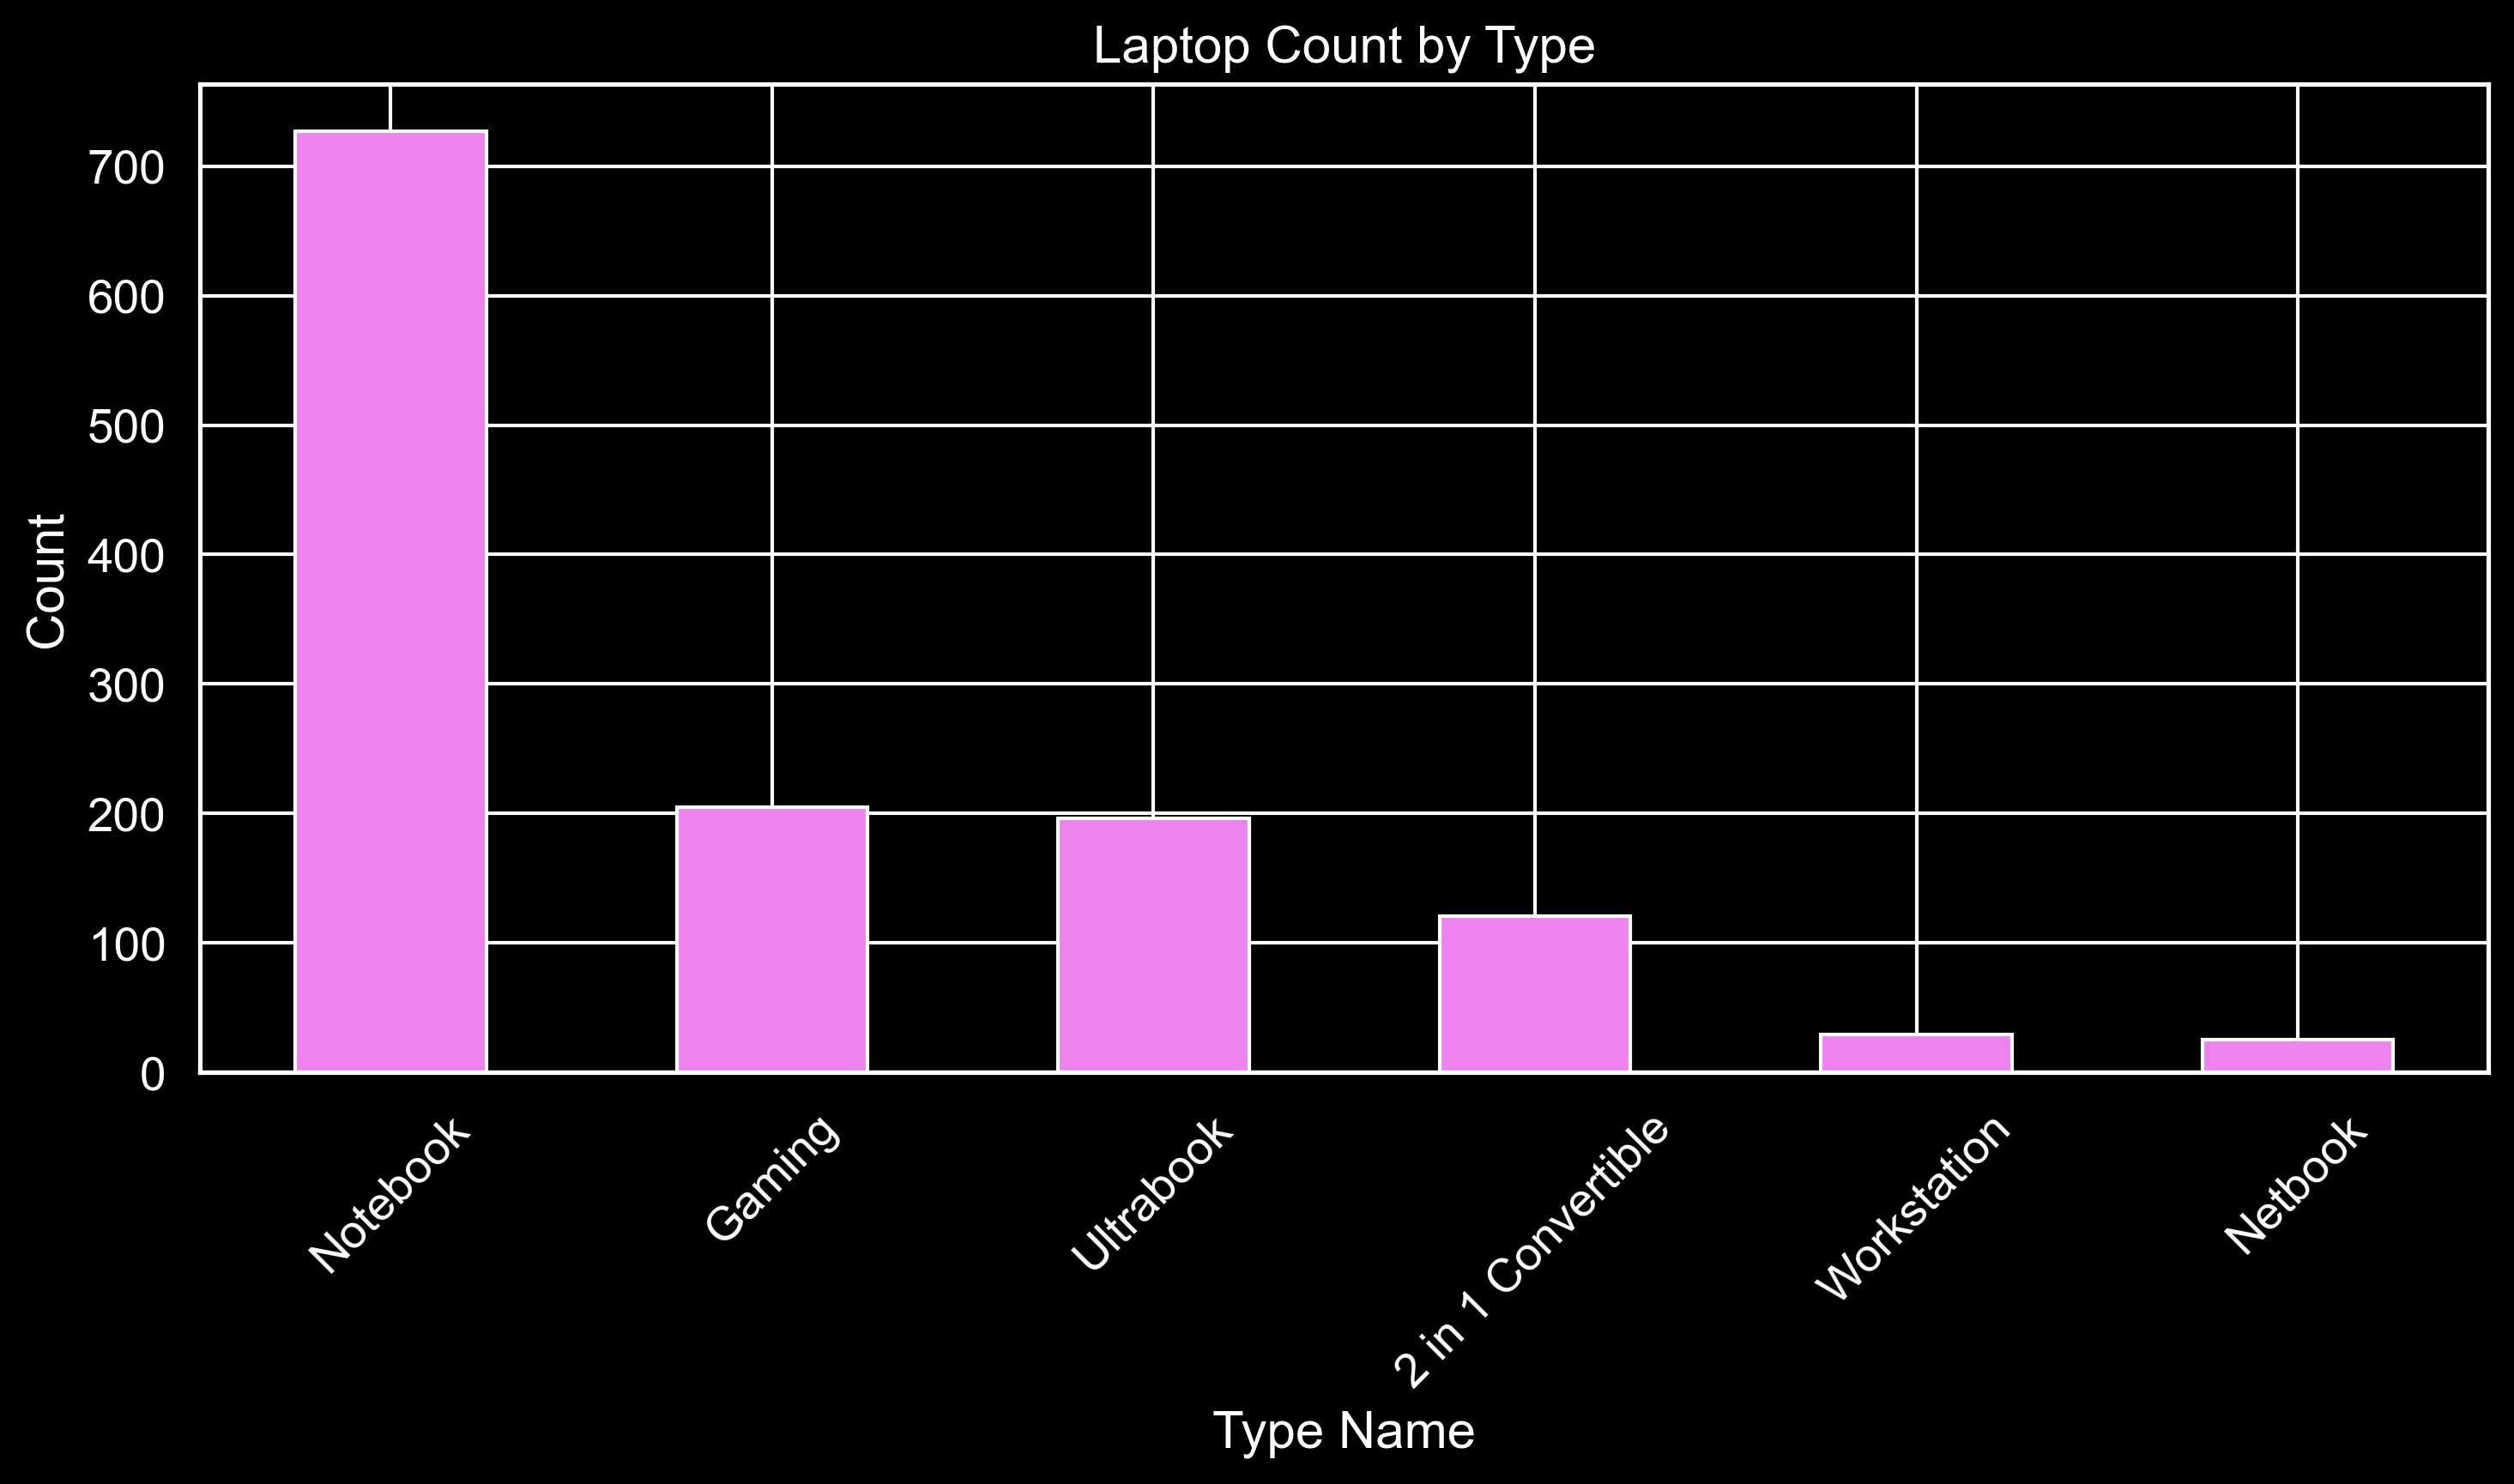

In [44]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
df['TypeName'].value_counts().plot(kind='bar', color='violet', edgecolor='white')
plt.title('Laptop Count by Type')
plt.xlabel('Type Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distributions/type_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\3665296595.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['TypeName'], y=df['Price'], estimator='mean', ci=None, color='teal')


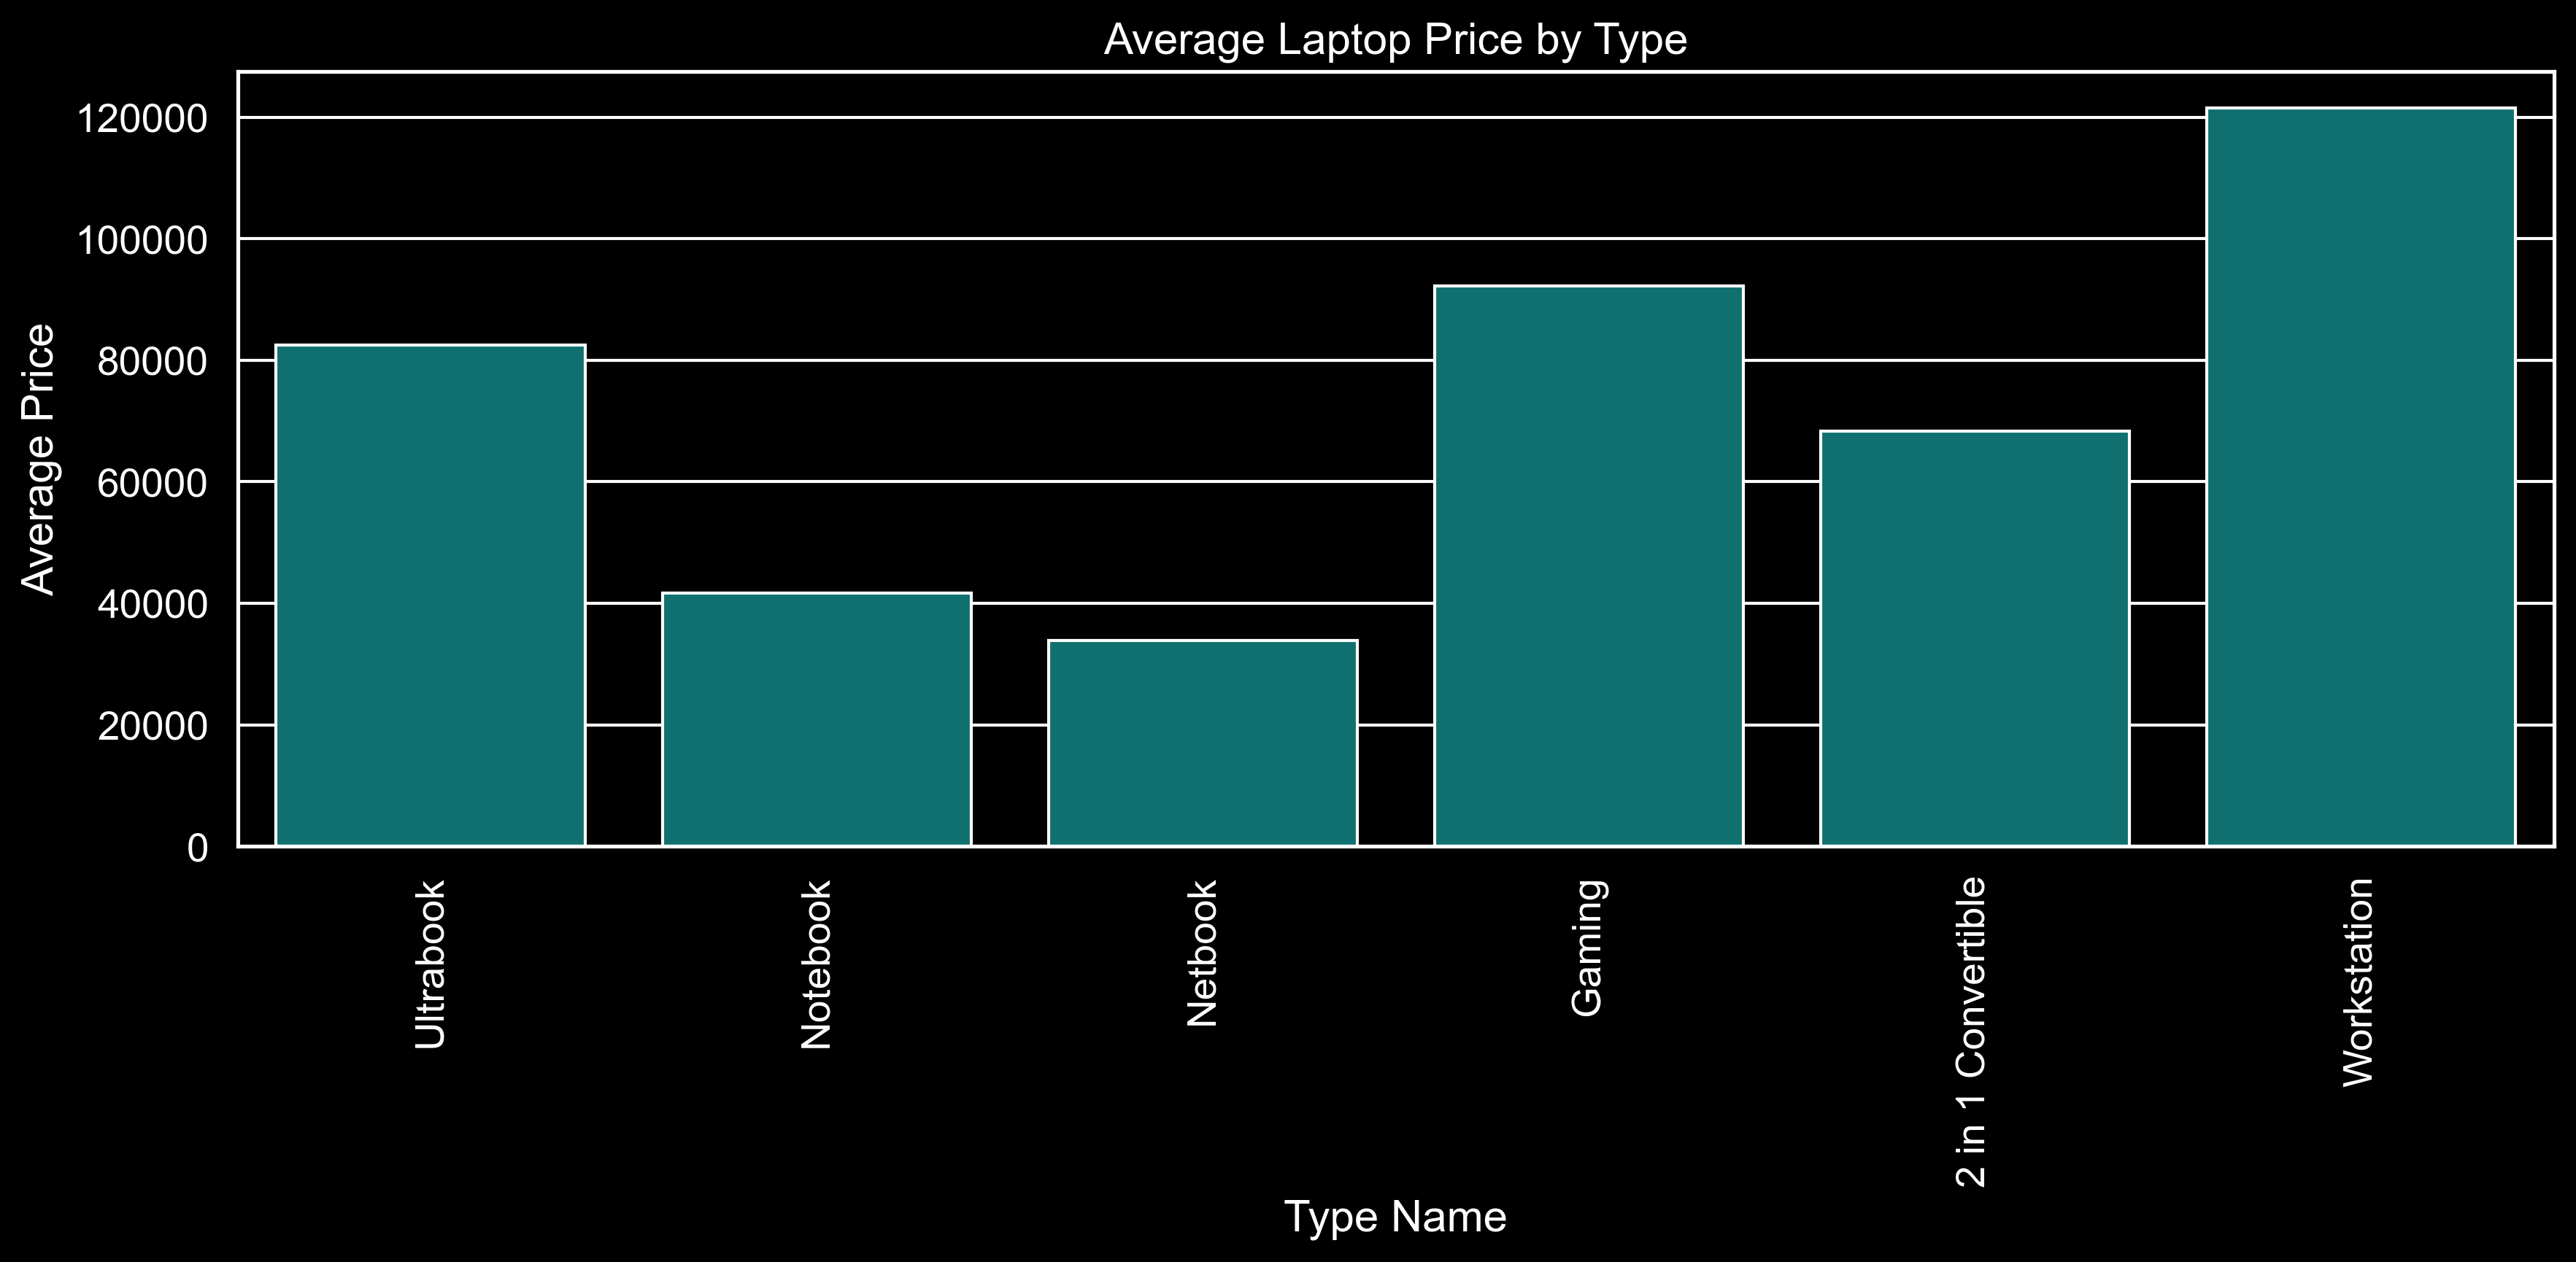

In [50]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df['TypeName'], y=df['Price'], estimator='mean', ci=None, color='teal')
plt.title('Average Laptop Price by Type')
plt.xlabel('Type Name')
plt.ylabel('Average Price')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_type.png', dpi=300)
plt.show()

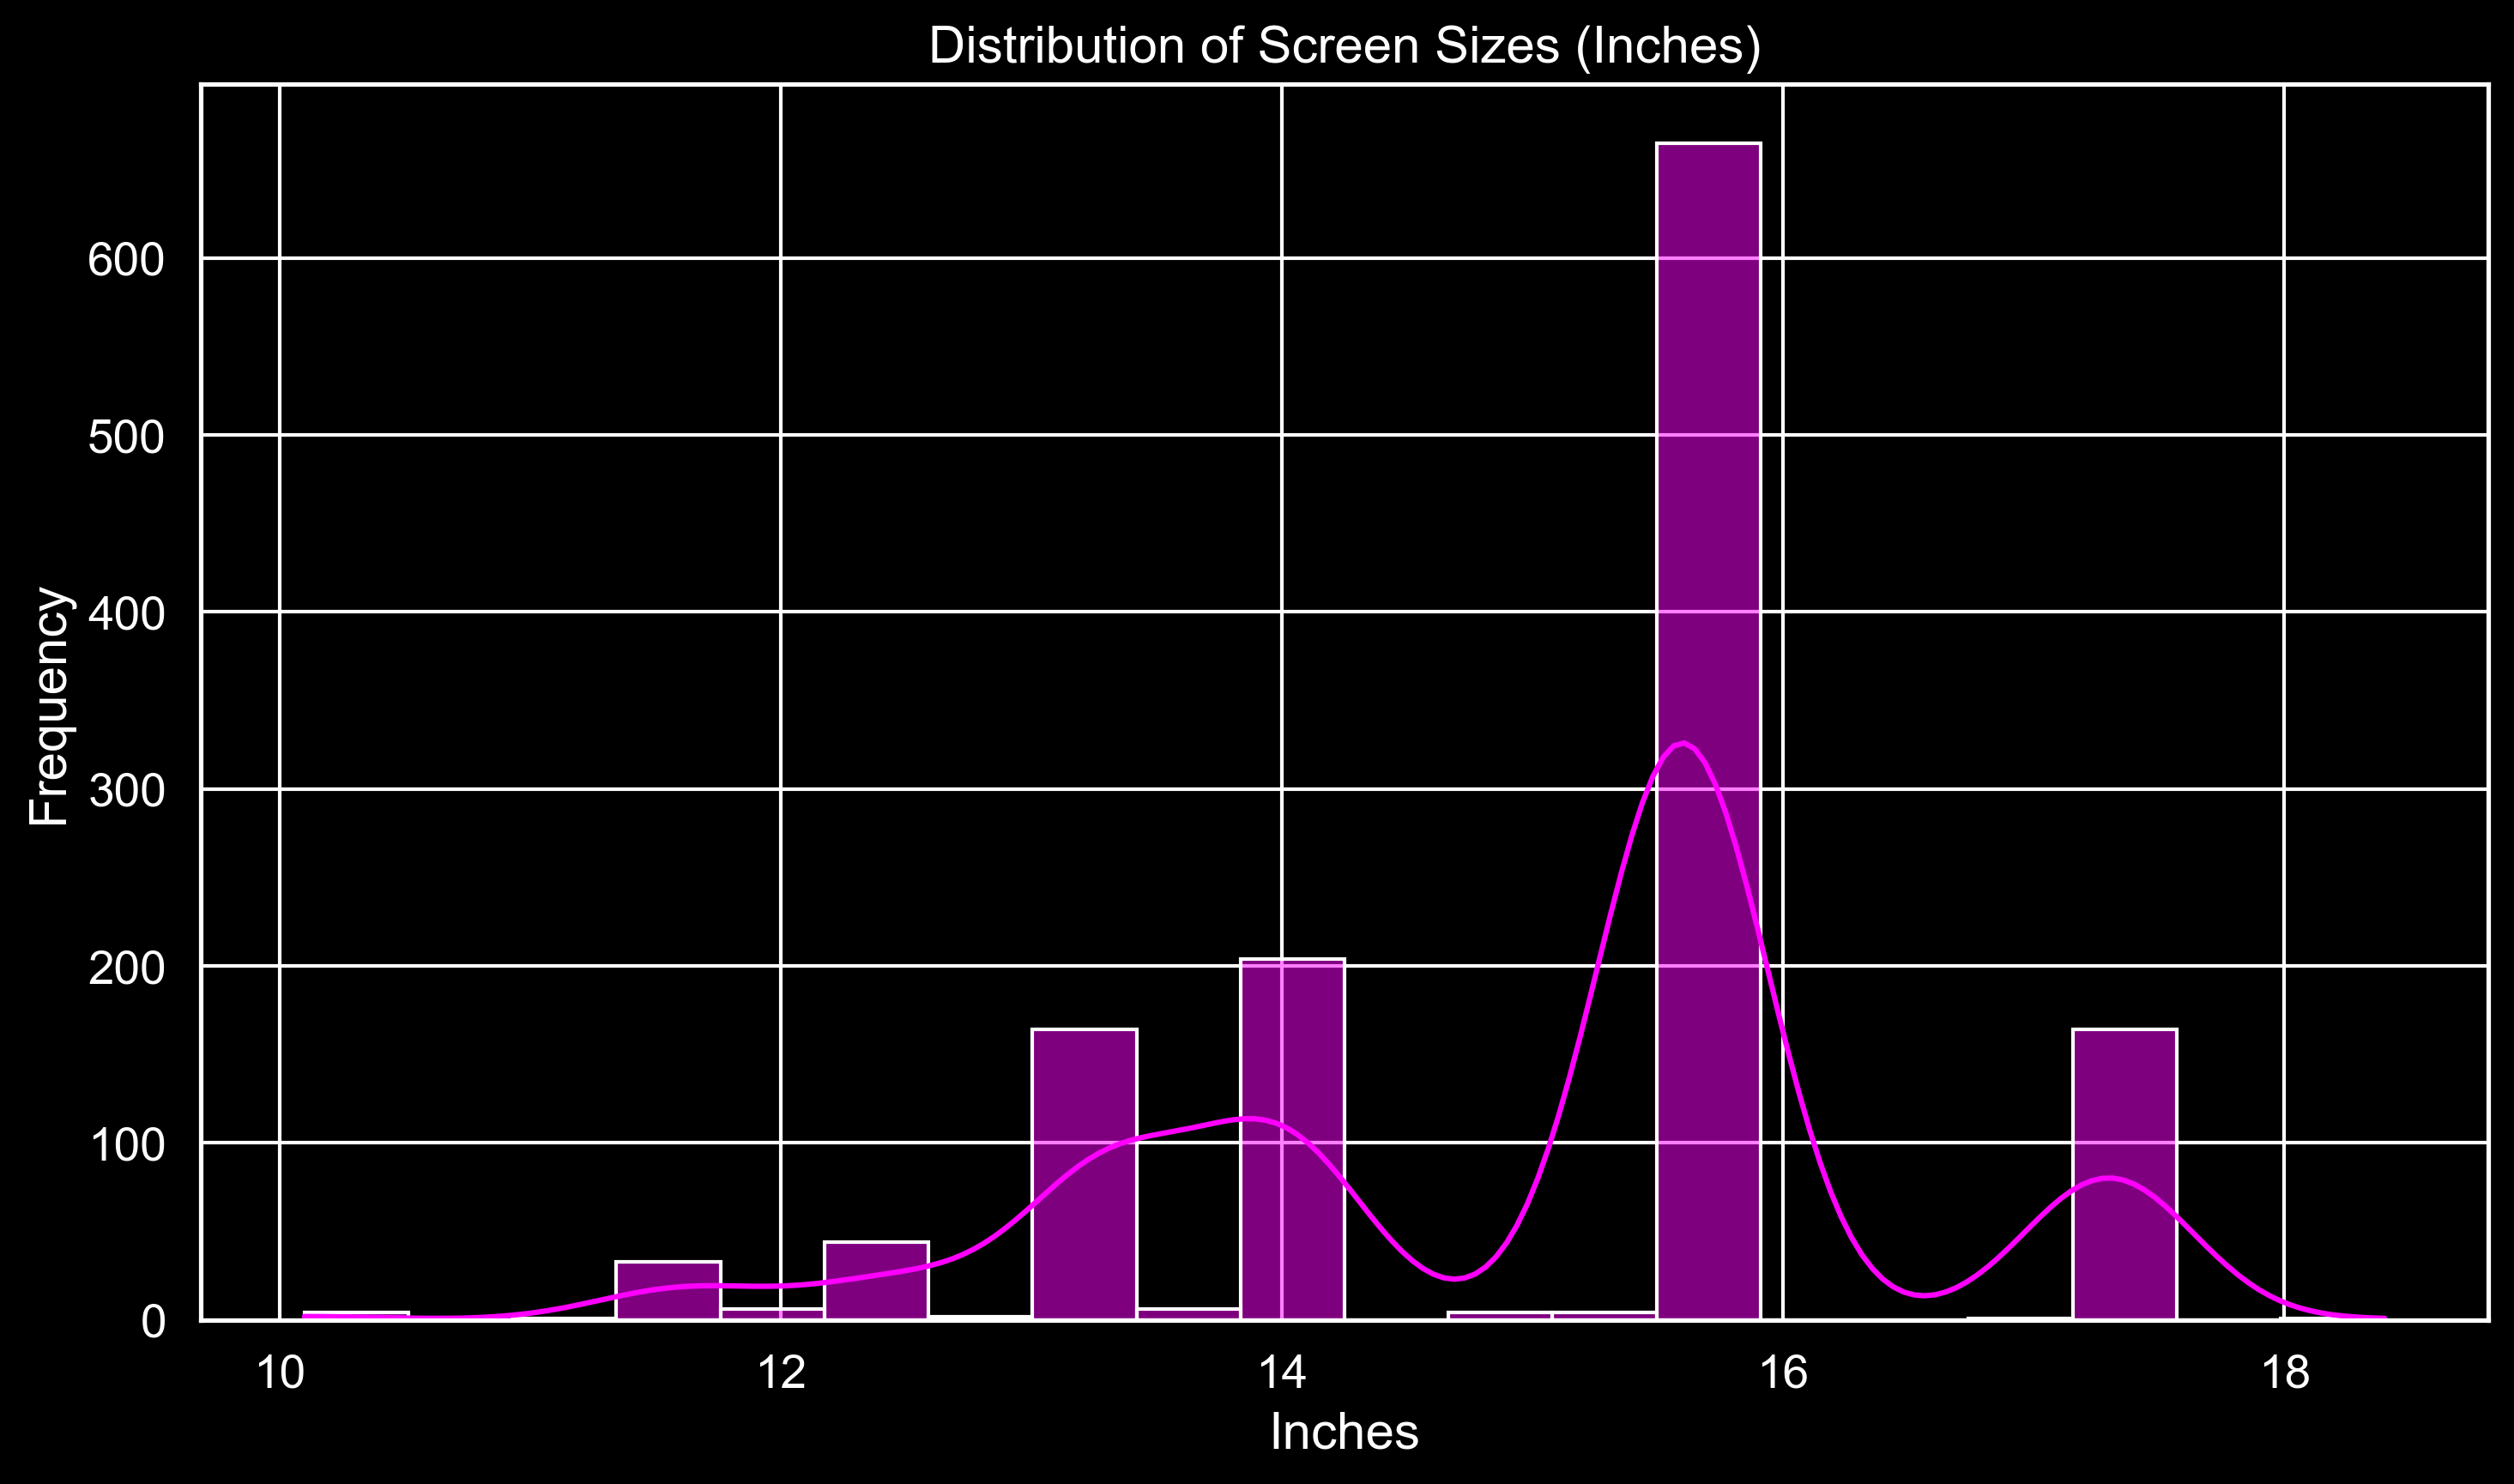

In [42]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['Inches'], kde=True, color='magenta', edgecolor='white', bins=20)
plt.title('Distribution of Screen Sizes (Inches)', color='white')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distributions/inches_distribution.png', dpi=300)
plt.show()

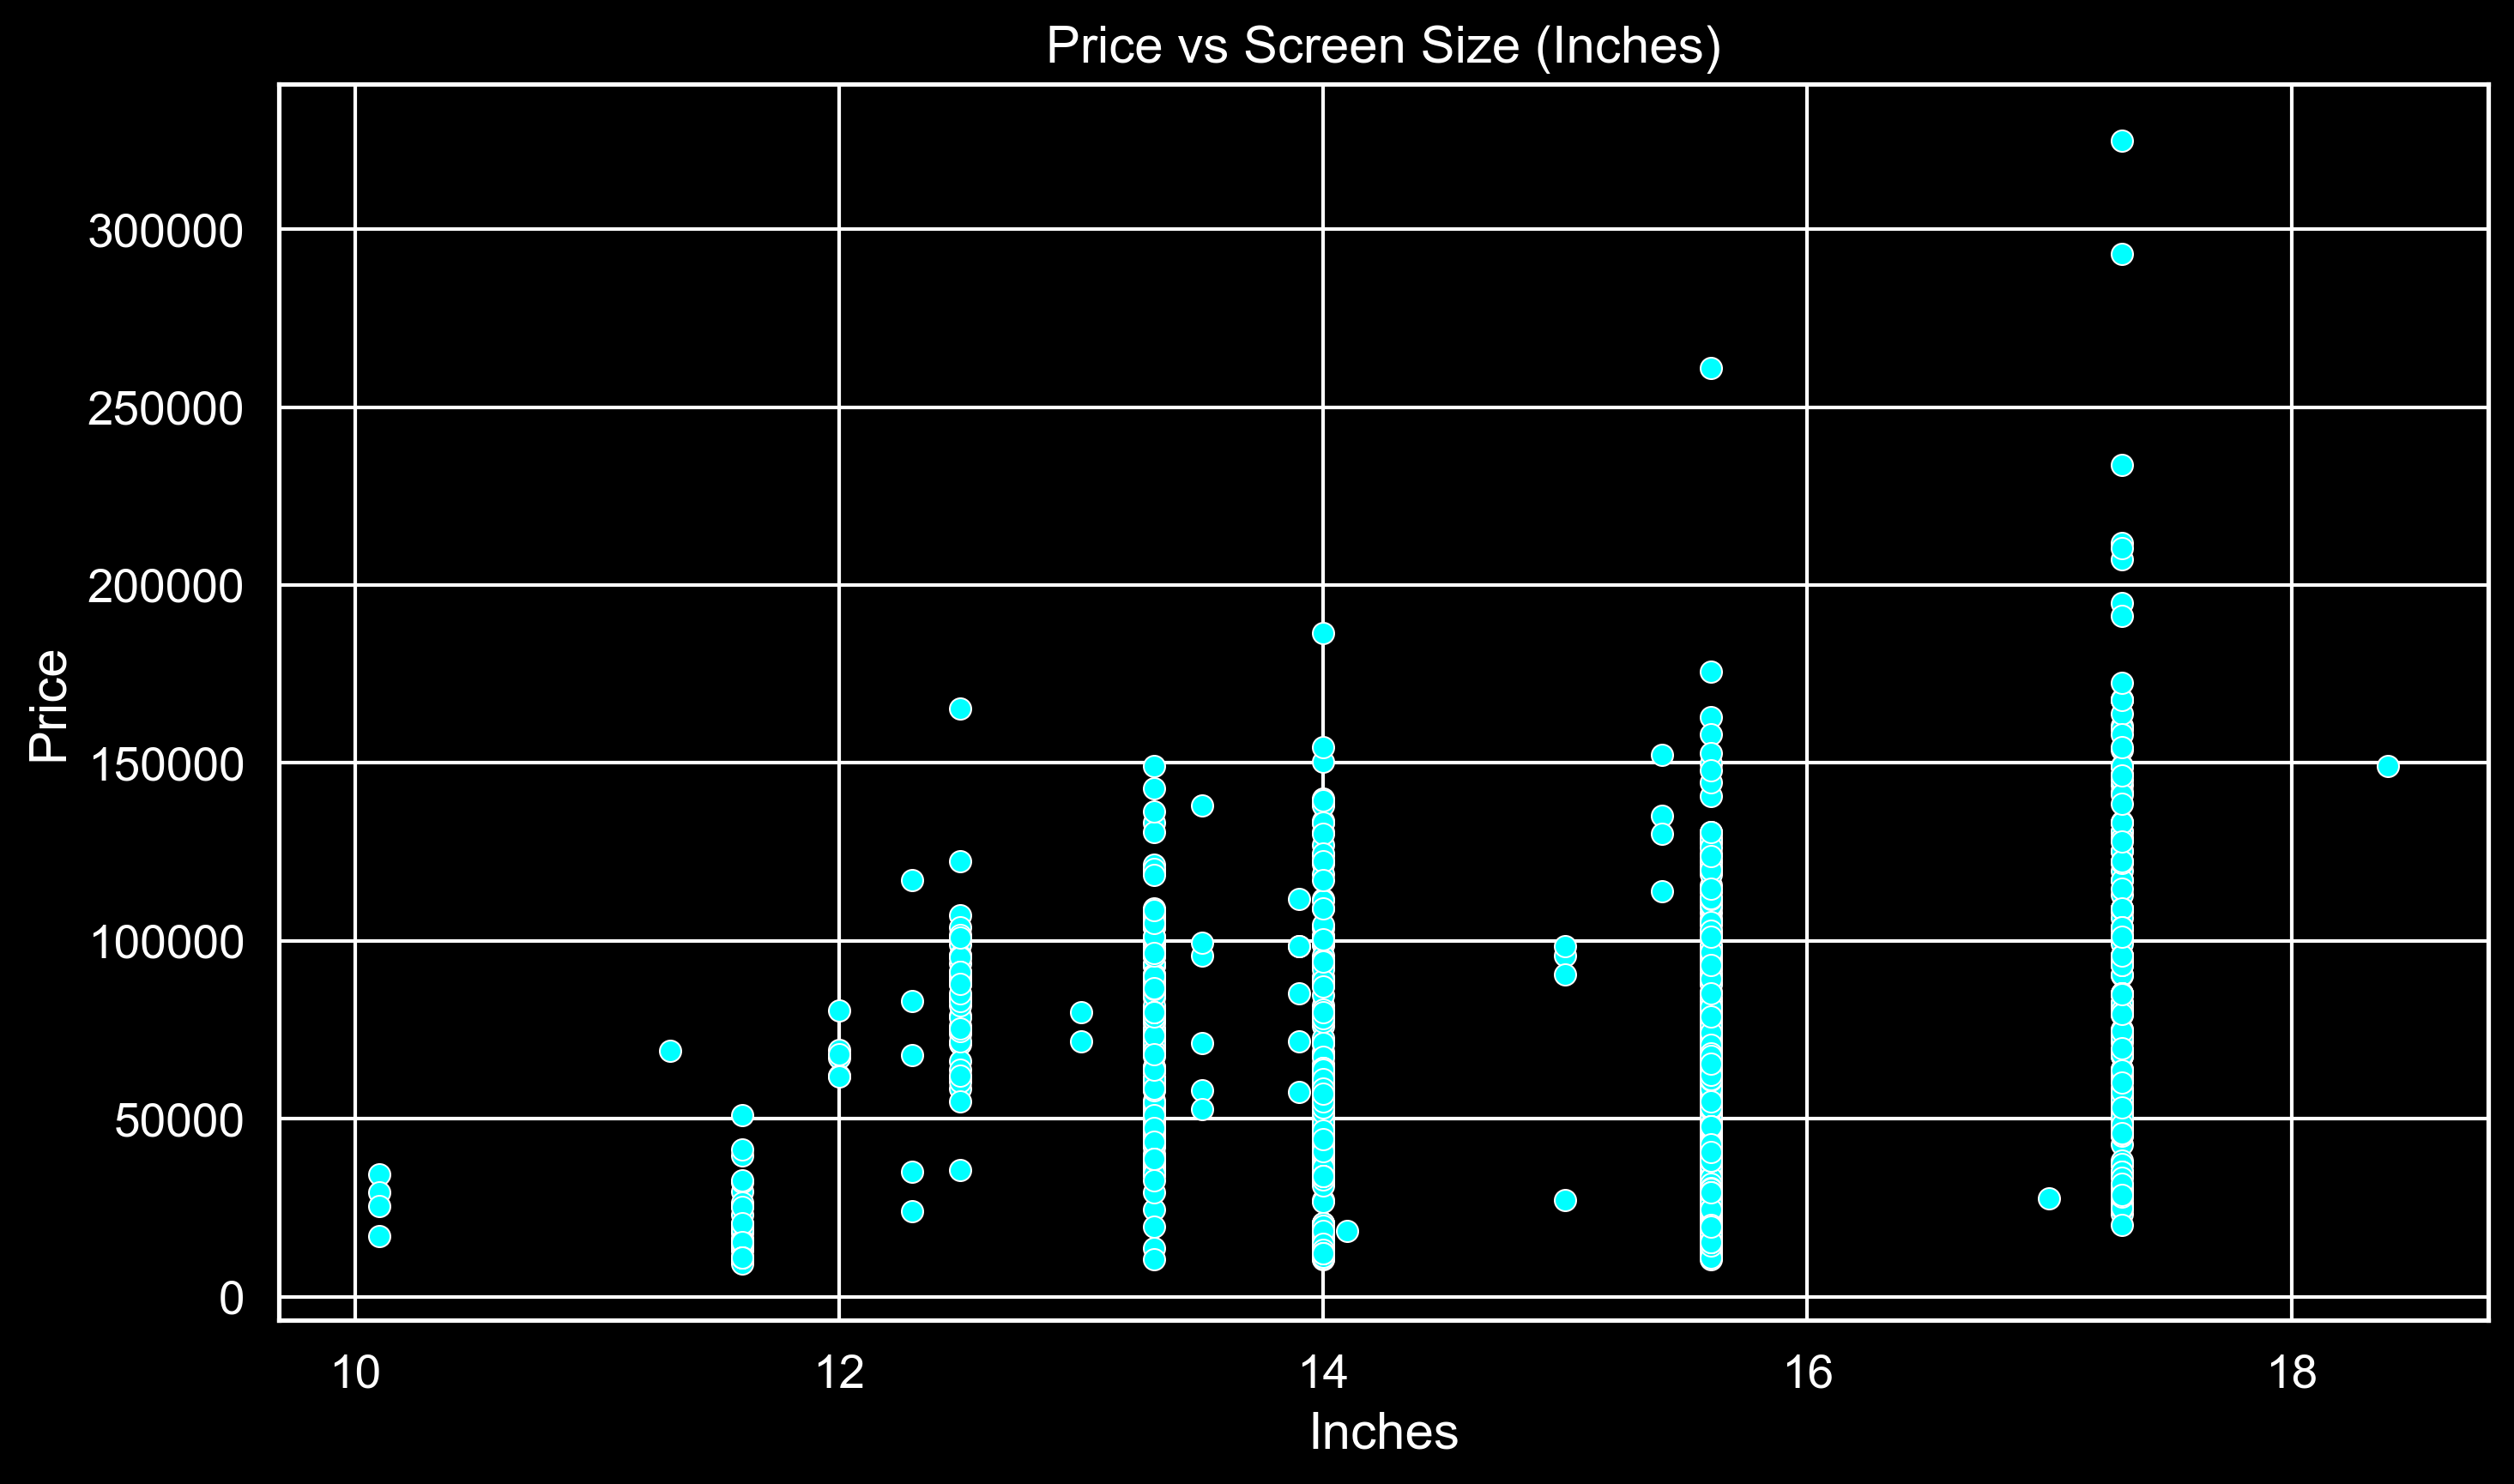

In [41]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(x=df['Inches'], y=df['Price'], color='cyan', edgecolor='white')
plt.title('Price vs Screen Size (Inches)', color='white')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('distributions/price_vs_inches.png', dpi=300)
plt.show()

In [35]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

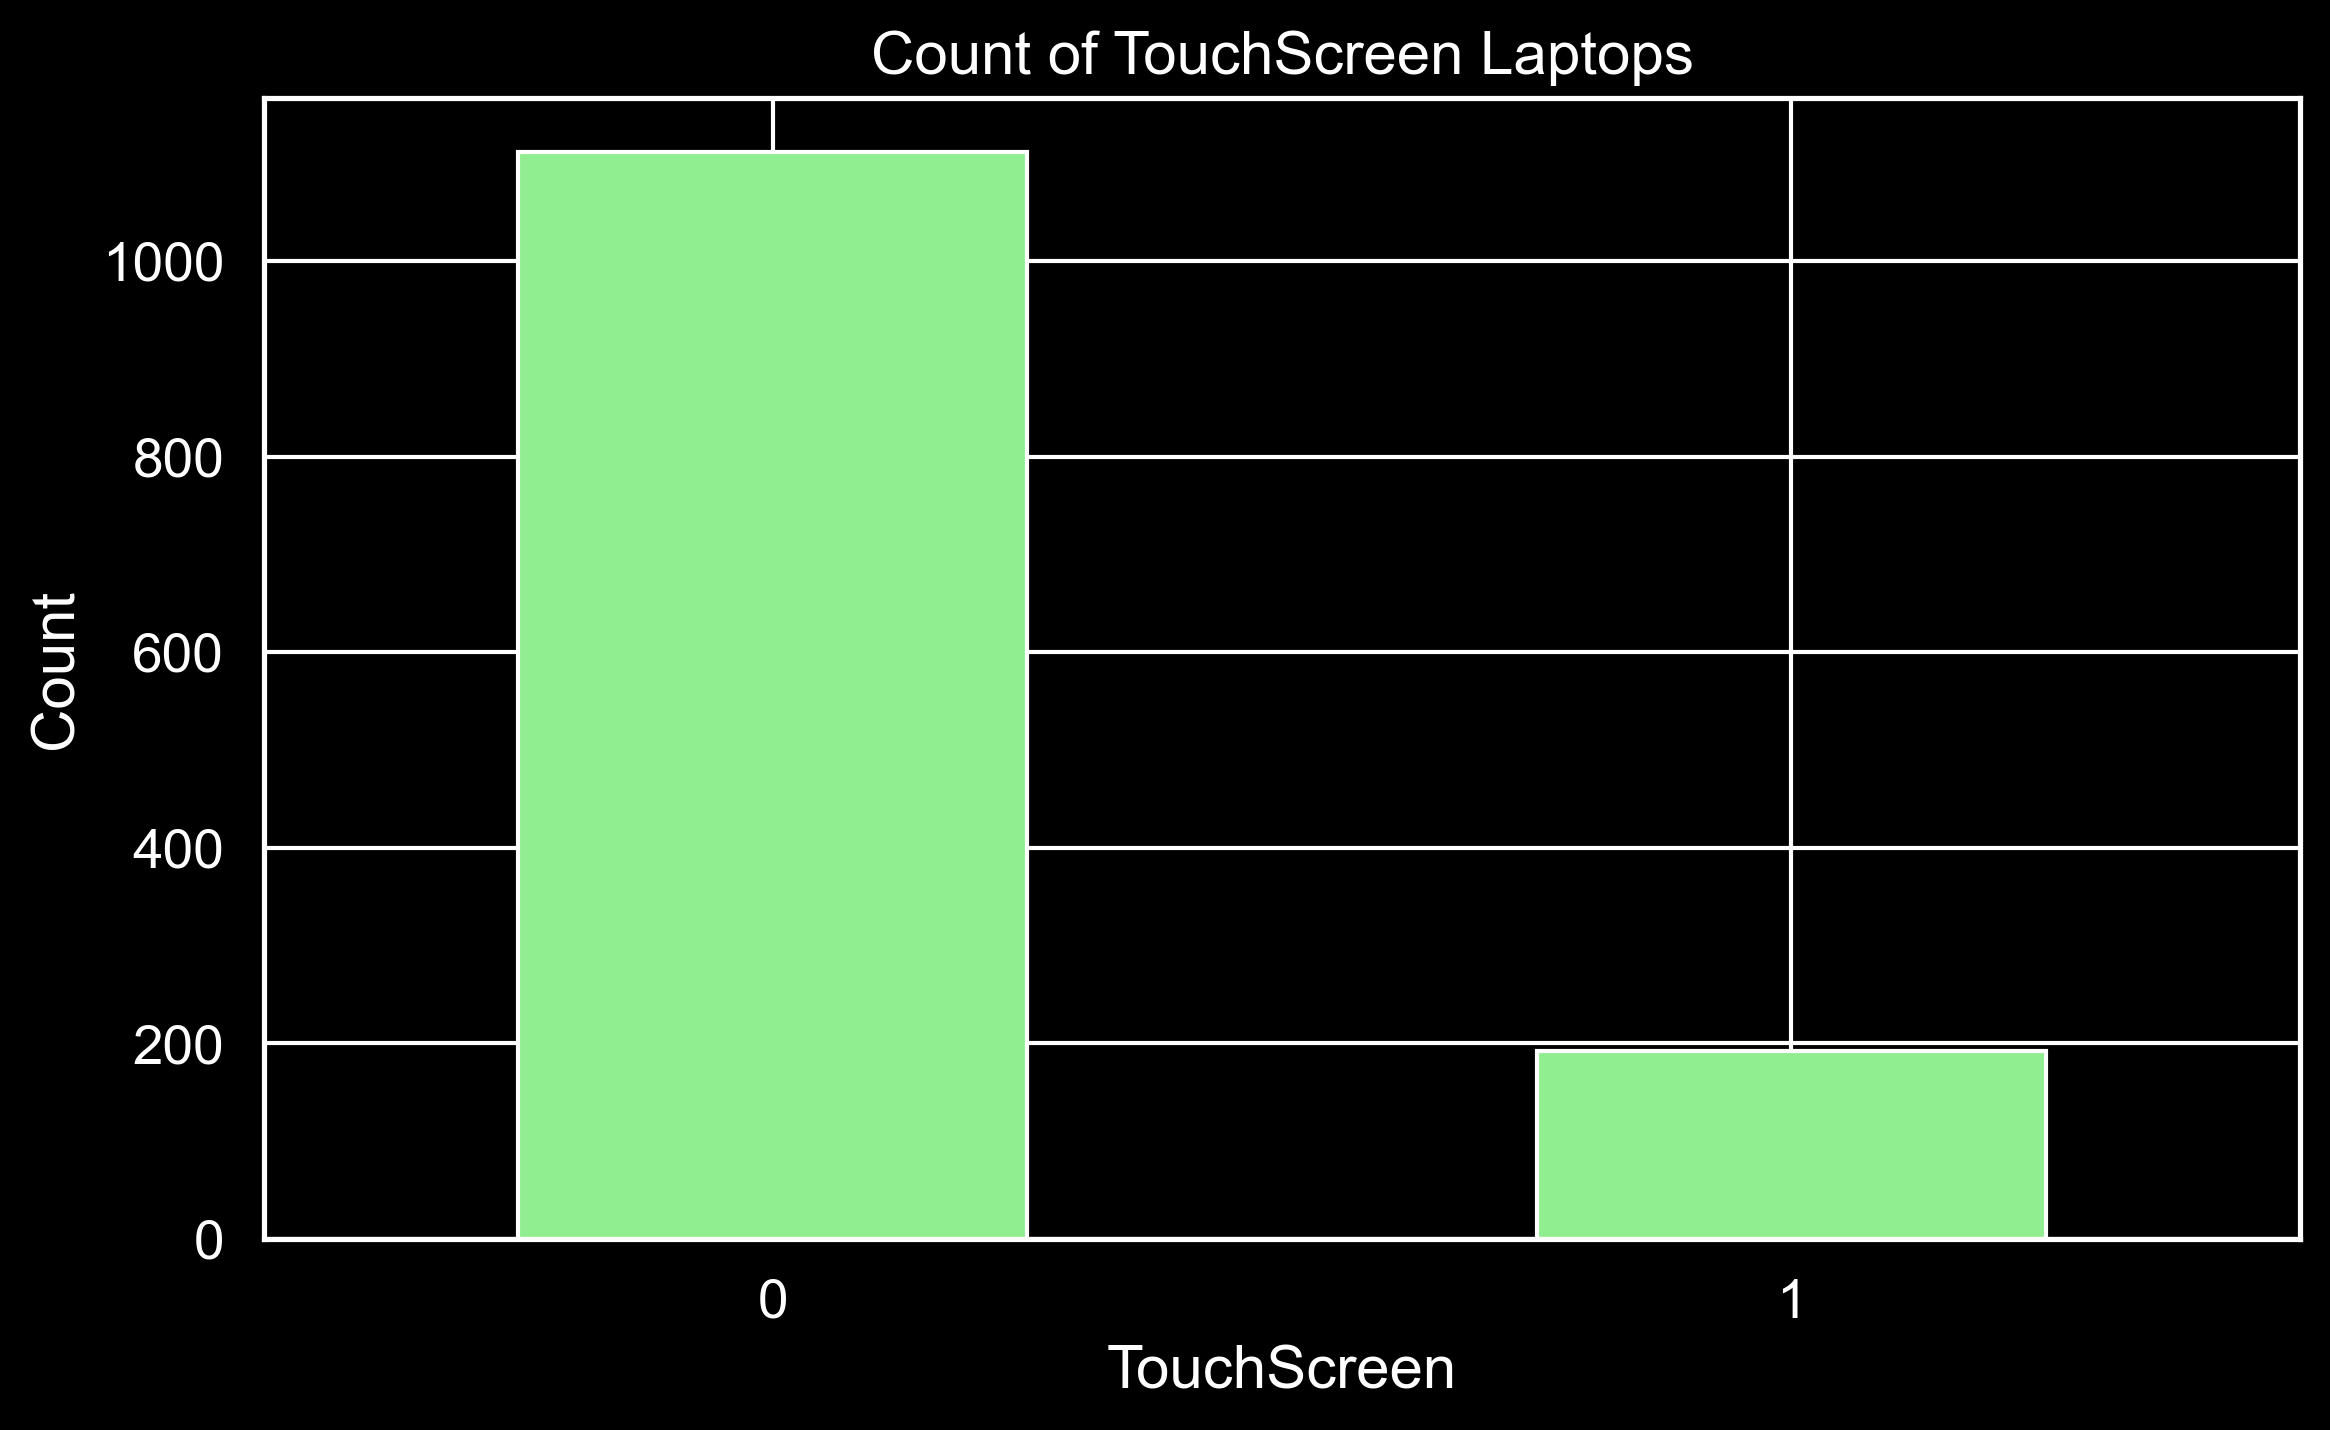

In [52]:
plt.style.use('dark_background')

plt.figure(figsize=(8, 5), dpi=300)
df['TouchScreen'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Count of TouchScreen Laptops')
plt.xlabel('TouchScreen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('distributions/touchscreen_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\909860683.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['TouchScreen'], y=df['Price'], estimator='mean', ci=None, color='orchid')


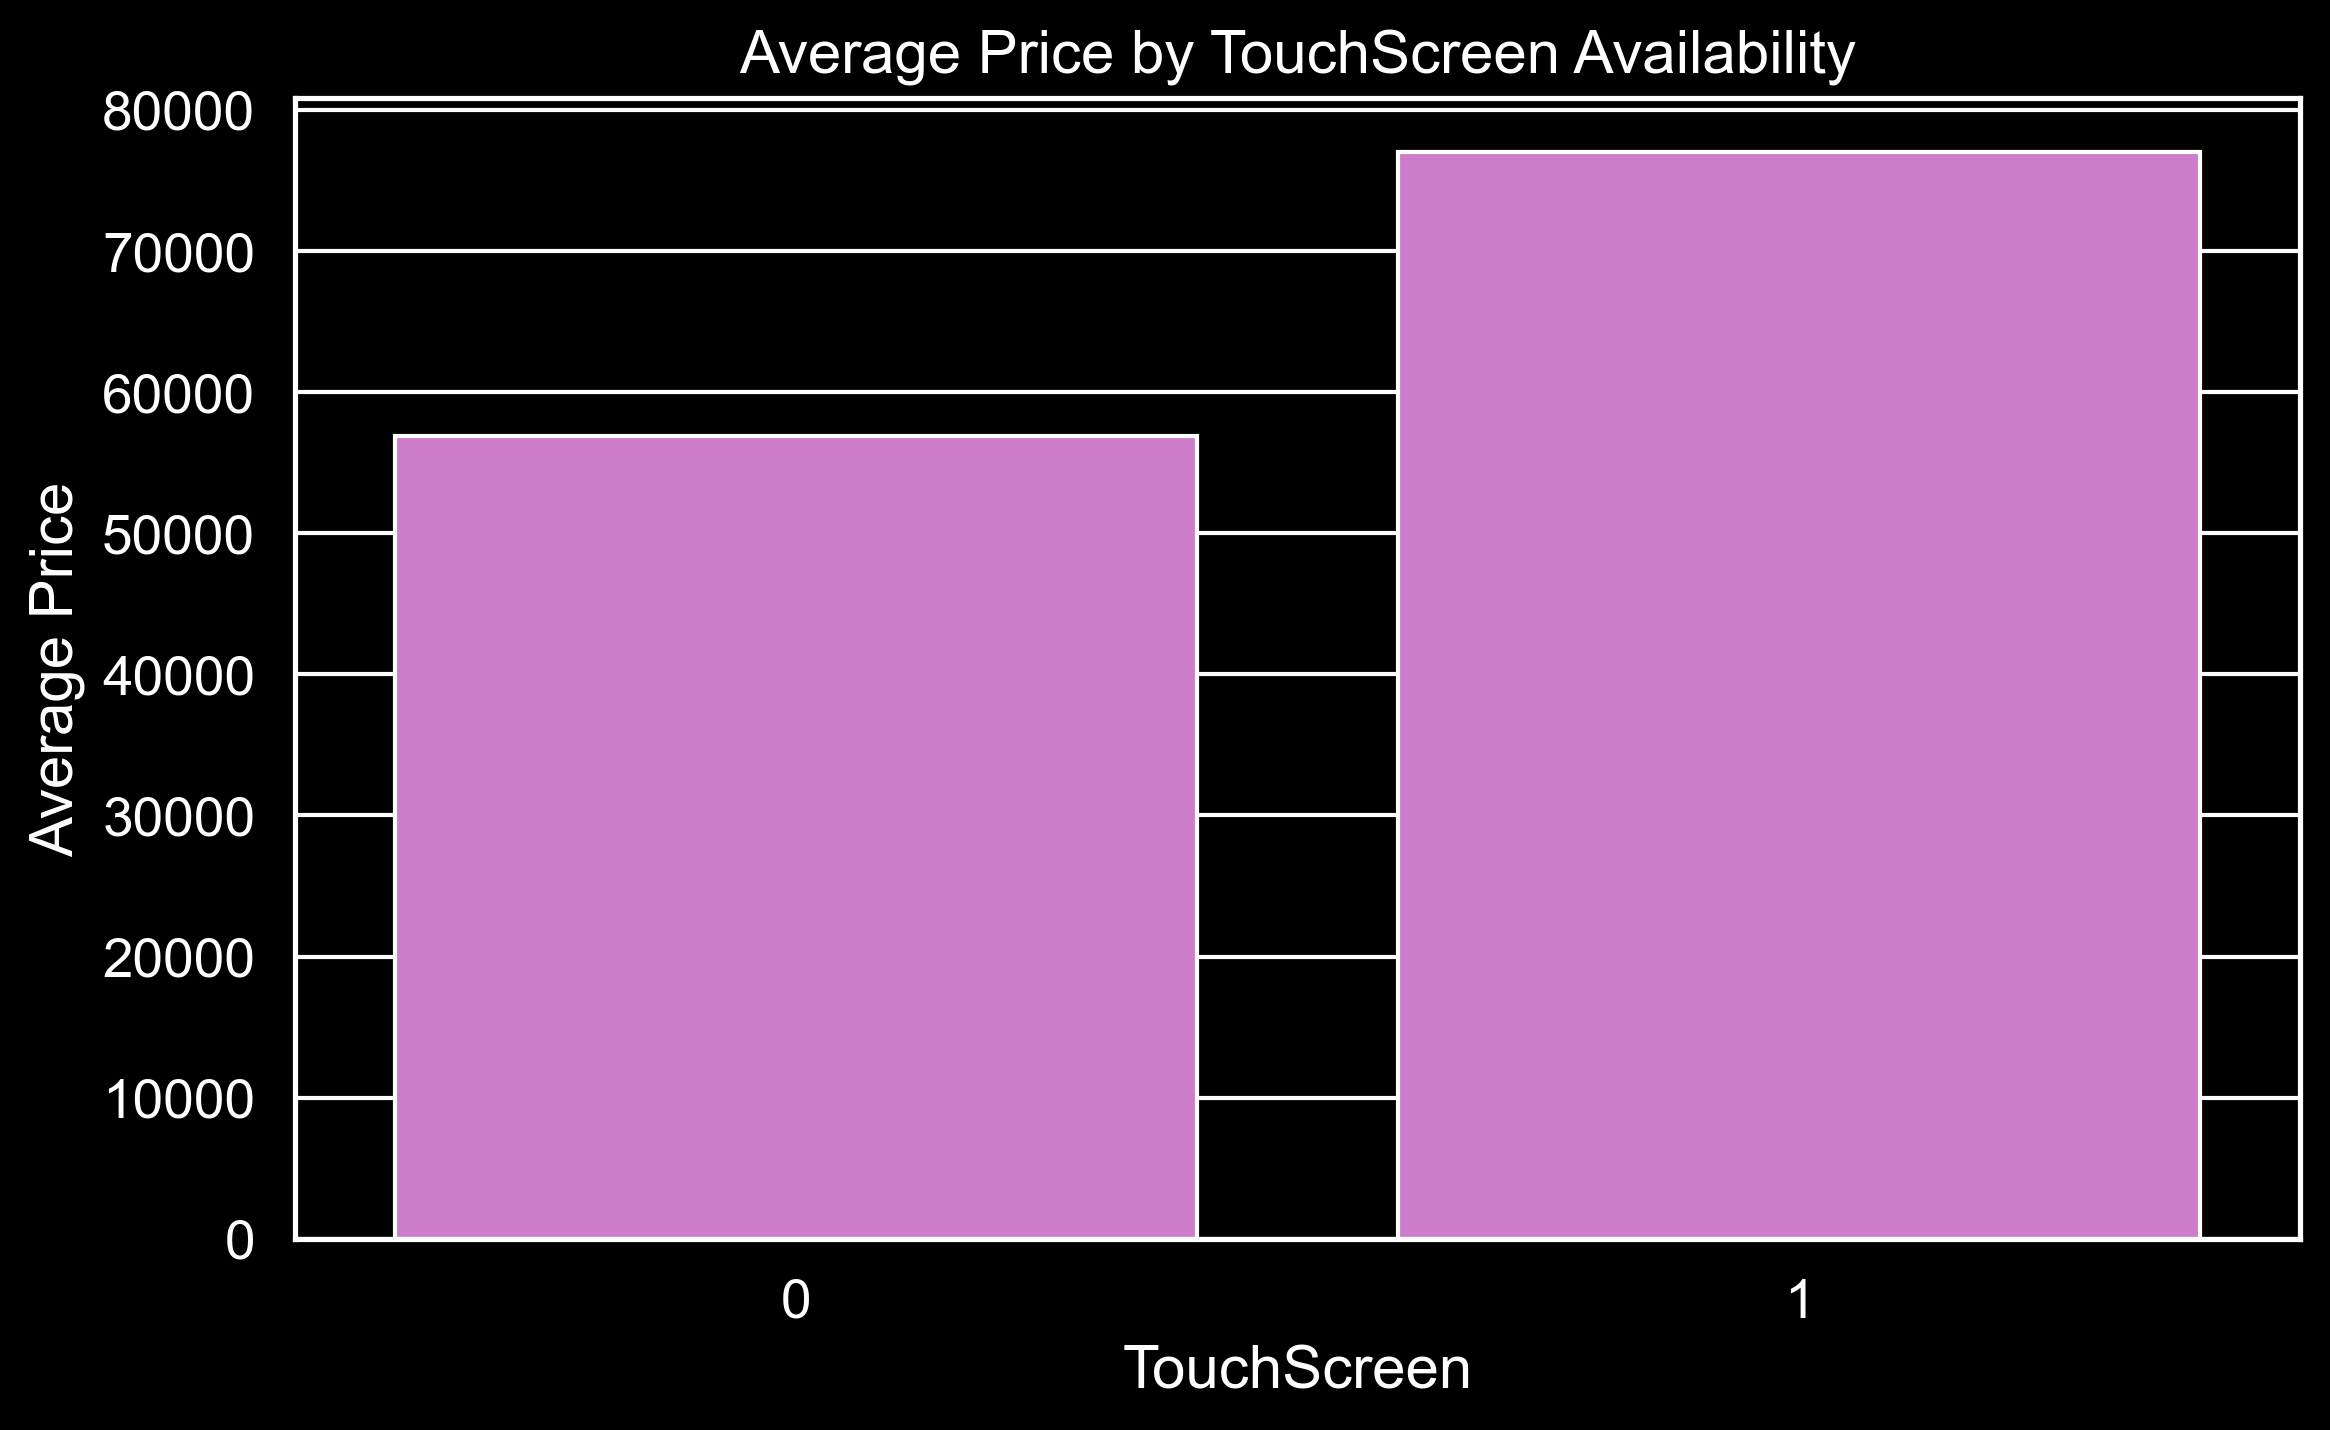

In [54]:
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(x=df['TouchScreen'], y=df['Price'], estimator='mean', ci=None, color='orchid')
plt.title('Average Price by TouchScreen Availability')
plt.xlabel('TouchScreen')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_touchscreen.png', dpi=300)
plt.show()

In [55]:
df['Price'] = df['Price']*0.012

In [56]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

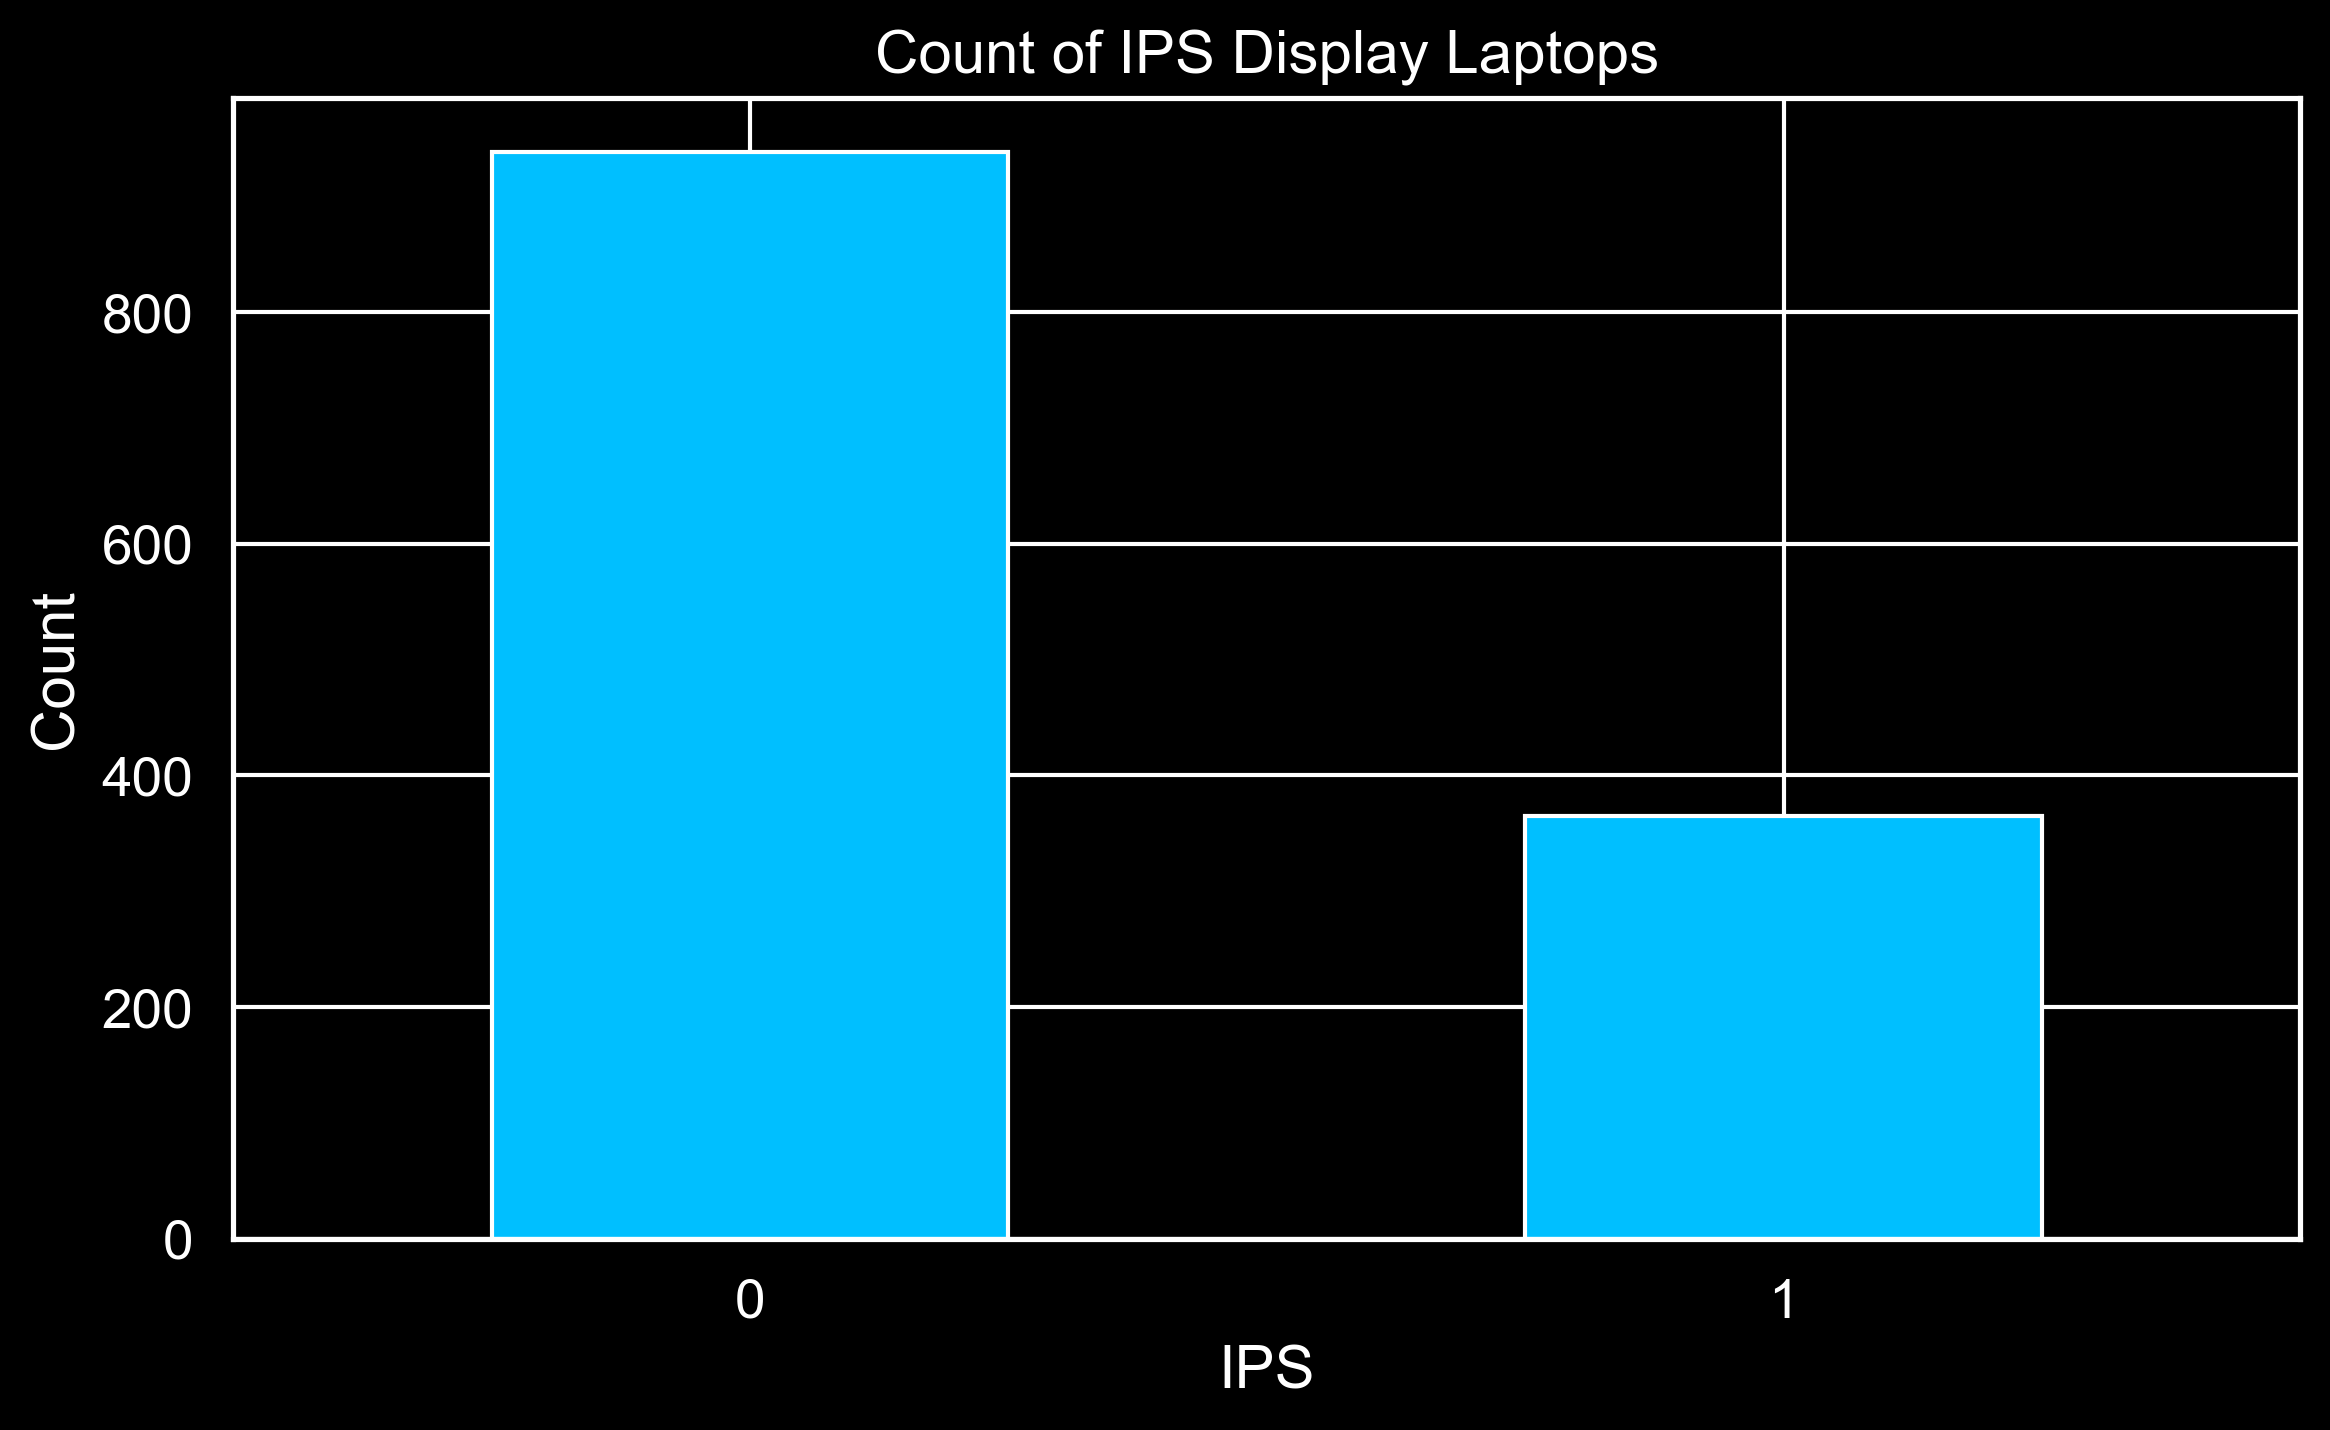

In [58]:
plt.style.use('dark_background')

plt.figure(figsize=(8, 5), dpi=300)
df['IPS'].value_counts().plot(kind='bar', color='deepskyblue')
plt.title('Count of IPS Display Laptops')
plt.xlabel('IPS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('distributions/ips_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\3924548191.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['IPS'], y=df['Price'], estimator='mean', ci=None, color='mediumslateblue')


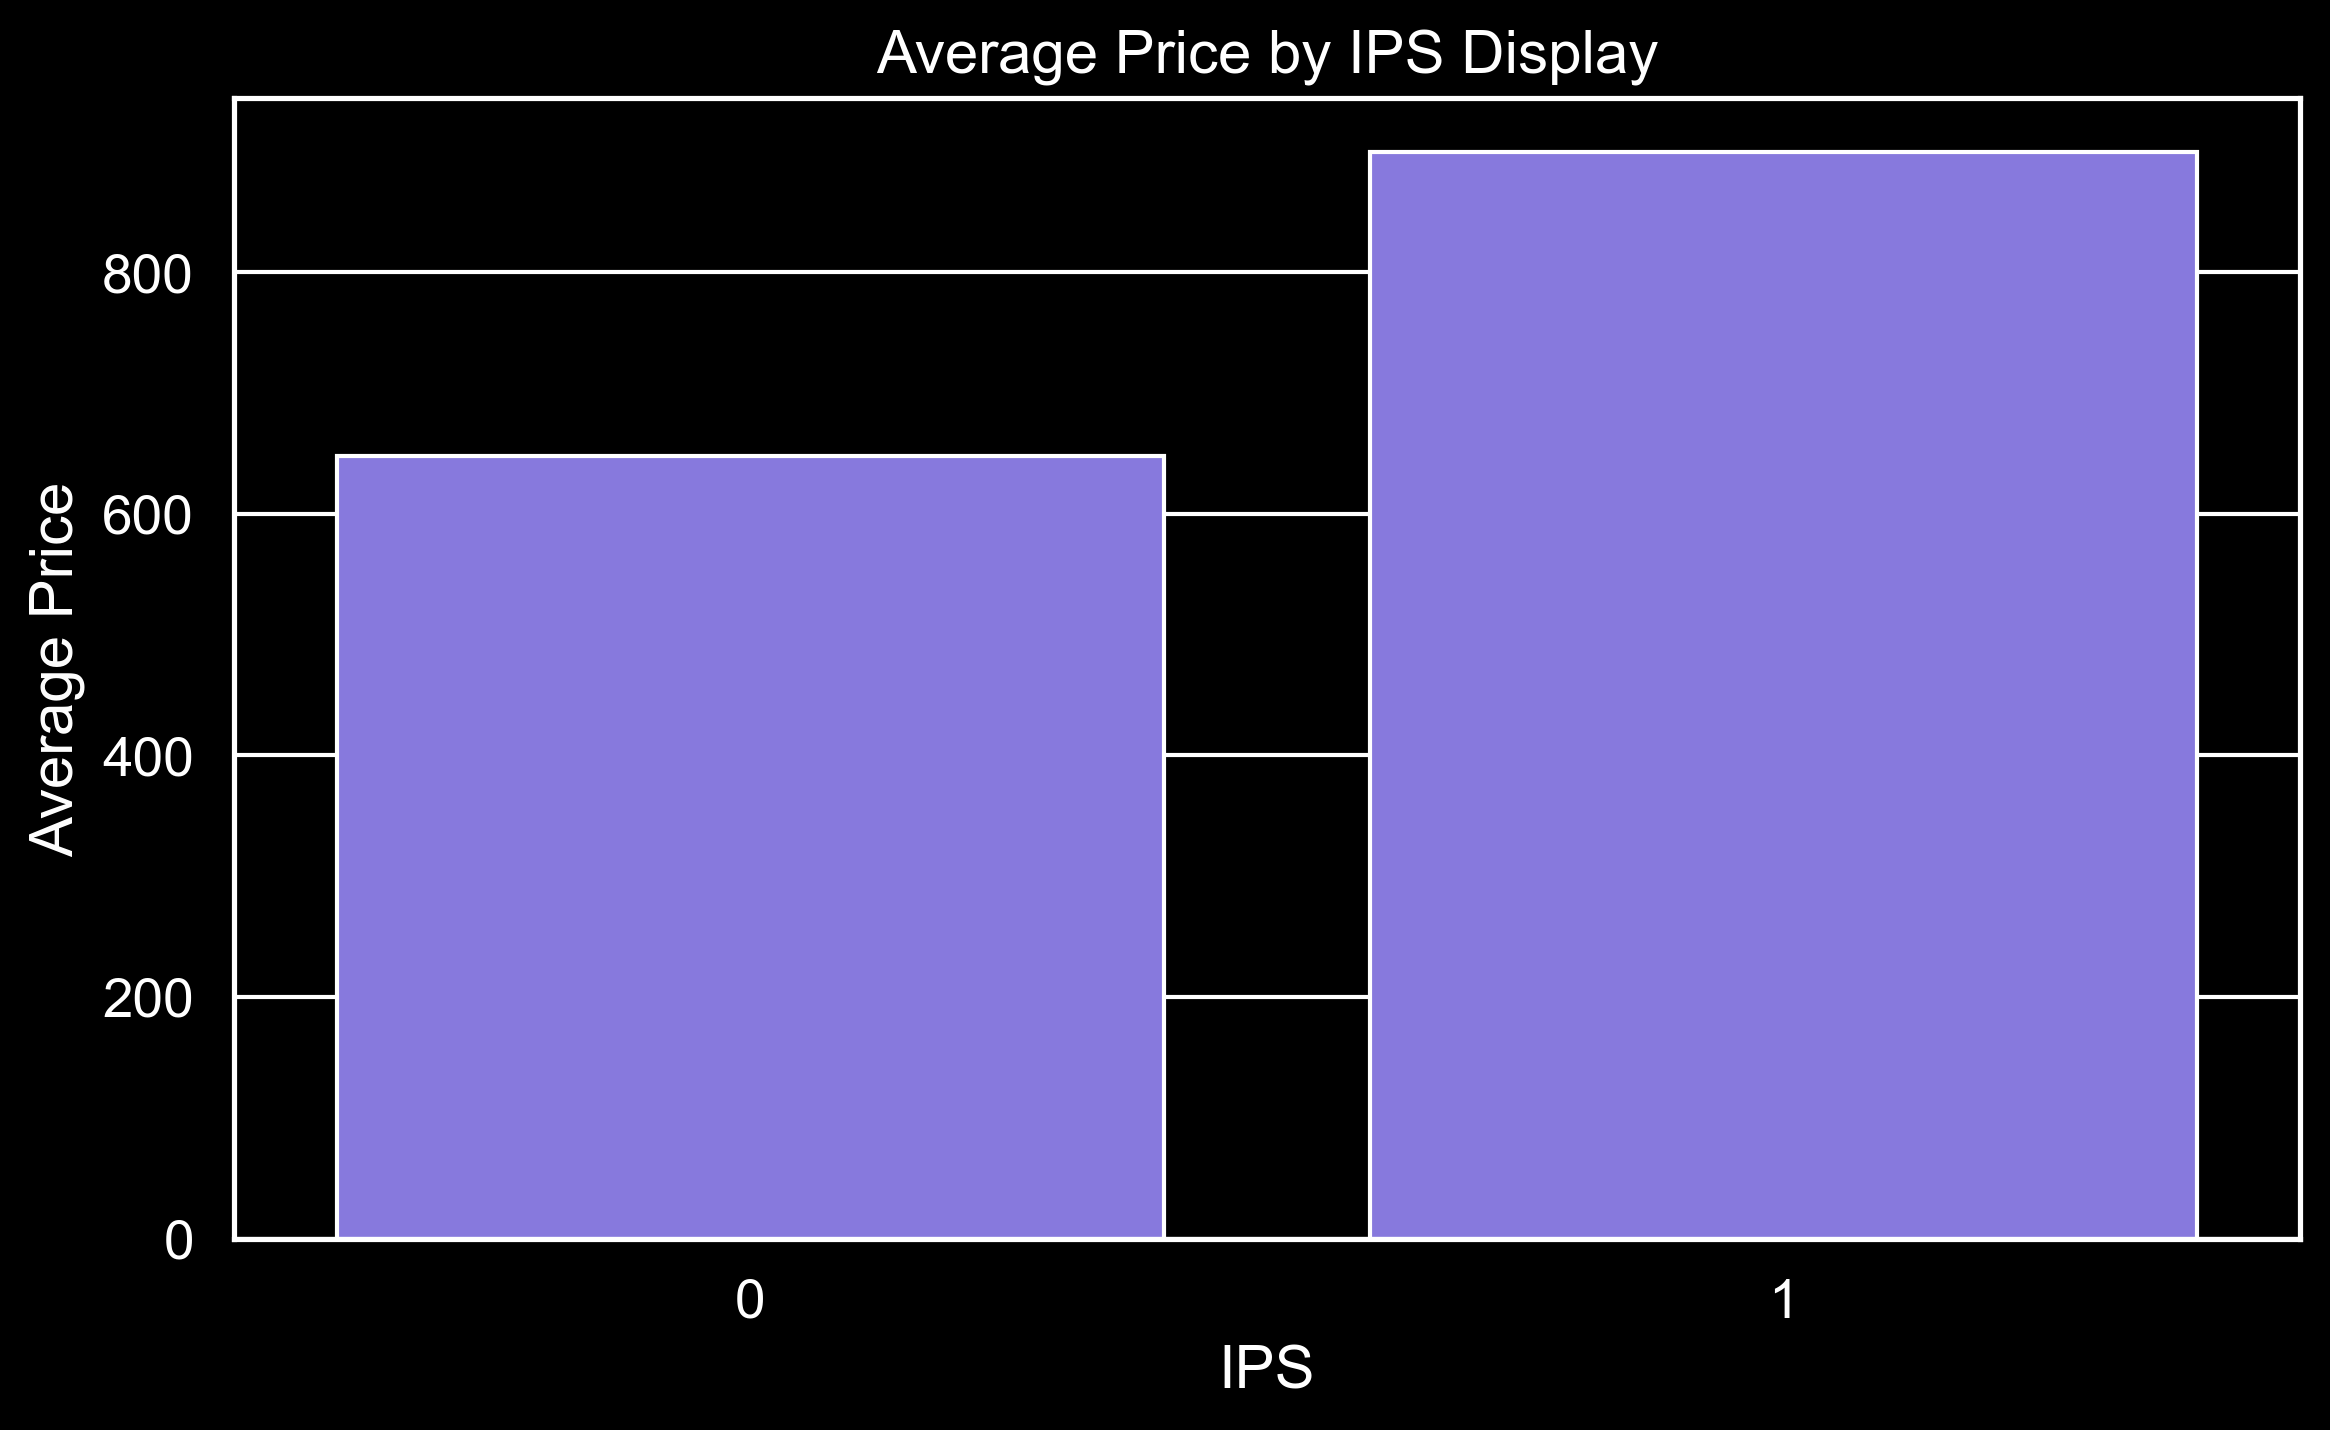

In [60]:
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(x=df['IPS'], y=df['Price'], estimator='mean', ci=None, color='mediumslateblue')
plt.title('Average Price by IPS Display')
plt.xlabel('IPS')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_ips.png', dpi=300)
plt.show()

In [61]:
df['X_res'] = (df['ScreenResolution'].str.split('x', n=1, expand=True))[0]
df['y_res'] = (df['ScreenResolution'].str.split('x', n=1, expand=True))[1]

In [62]:
df['X_res'] = df['X_res'].str.replace(',' ,'').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [63]:
print(datacmp.get_detailed(df))

╭────────────────┬──────────╮
│ Info           │   Values │
├────────────────┼──────────┤
│ Number of Rows │     1303 │
│ Number of Rows │       15 │
╰────────────────┴──────────╯

╭──────────────────┬─────────┬────────┬────────────┬────────┬──────────────╮
│ Column Name      │ Dtype   │   Null │   Not Null │ Mean   │   Unique Val │
├──────────────────┼─────────┼────────┼────────────┼────────┼──────────────┤
│ Company          │ object  │      0 │       1303 │ -      │           19 │
│ TypeName         │ object  │      0 │       1303 │ -      │            6 │
│ Inches           │ float64 │      0 │       1303 │ 15.02  │           18 │
│ ScreenResolution │ object  │      0 │       1303 │ -      │           40 │
│ Cpu              │ object  │      0 │       1303 │ -      │          118 │
│ Ram              │ int32   │      0 │       1303 │ 8.38   │            9 │
│ Memory           │ object  │      0 │       1303 │ -      │           39 │
│ Gpu              │ object  │      0 │       130

In [64]:
df['X_res'] = df['X_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [65]:
df['ppi'] = (((df['X_res']**2) + (df['y_res']**2))**0.5 / df['Inches']).astype('float')

In [66]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [67]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'y_res'], inplace=True)

In [68]:
df['CpuName'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

In [69]:
def get_cpu_brand(cpu_name):
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif 'Intel' in cpu_name:
        return 'Intel'
    elif 'AMD' in cpu_name:
        return 'AMD'
    elif 'Samsung' in cpu_name:
        return 'Samsung'
    else:
        return 'Other'

In [70]:
df['CpuBrand'] = df['CpuName'].apply(get_cpu_brand)

In [71]:
df['CpuBrand'].value_counts()

CpuBrand
Intel Core i7    527
Intel Core i5    423
Intel            154
Intel Core i3    136
AMD               62
Samsung            1
Name: count, dtype: int64

In [72]:
df = df[df['CpuBrand'] != 'Samsung']

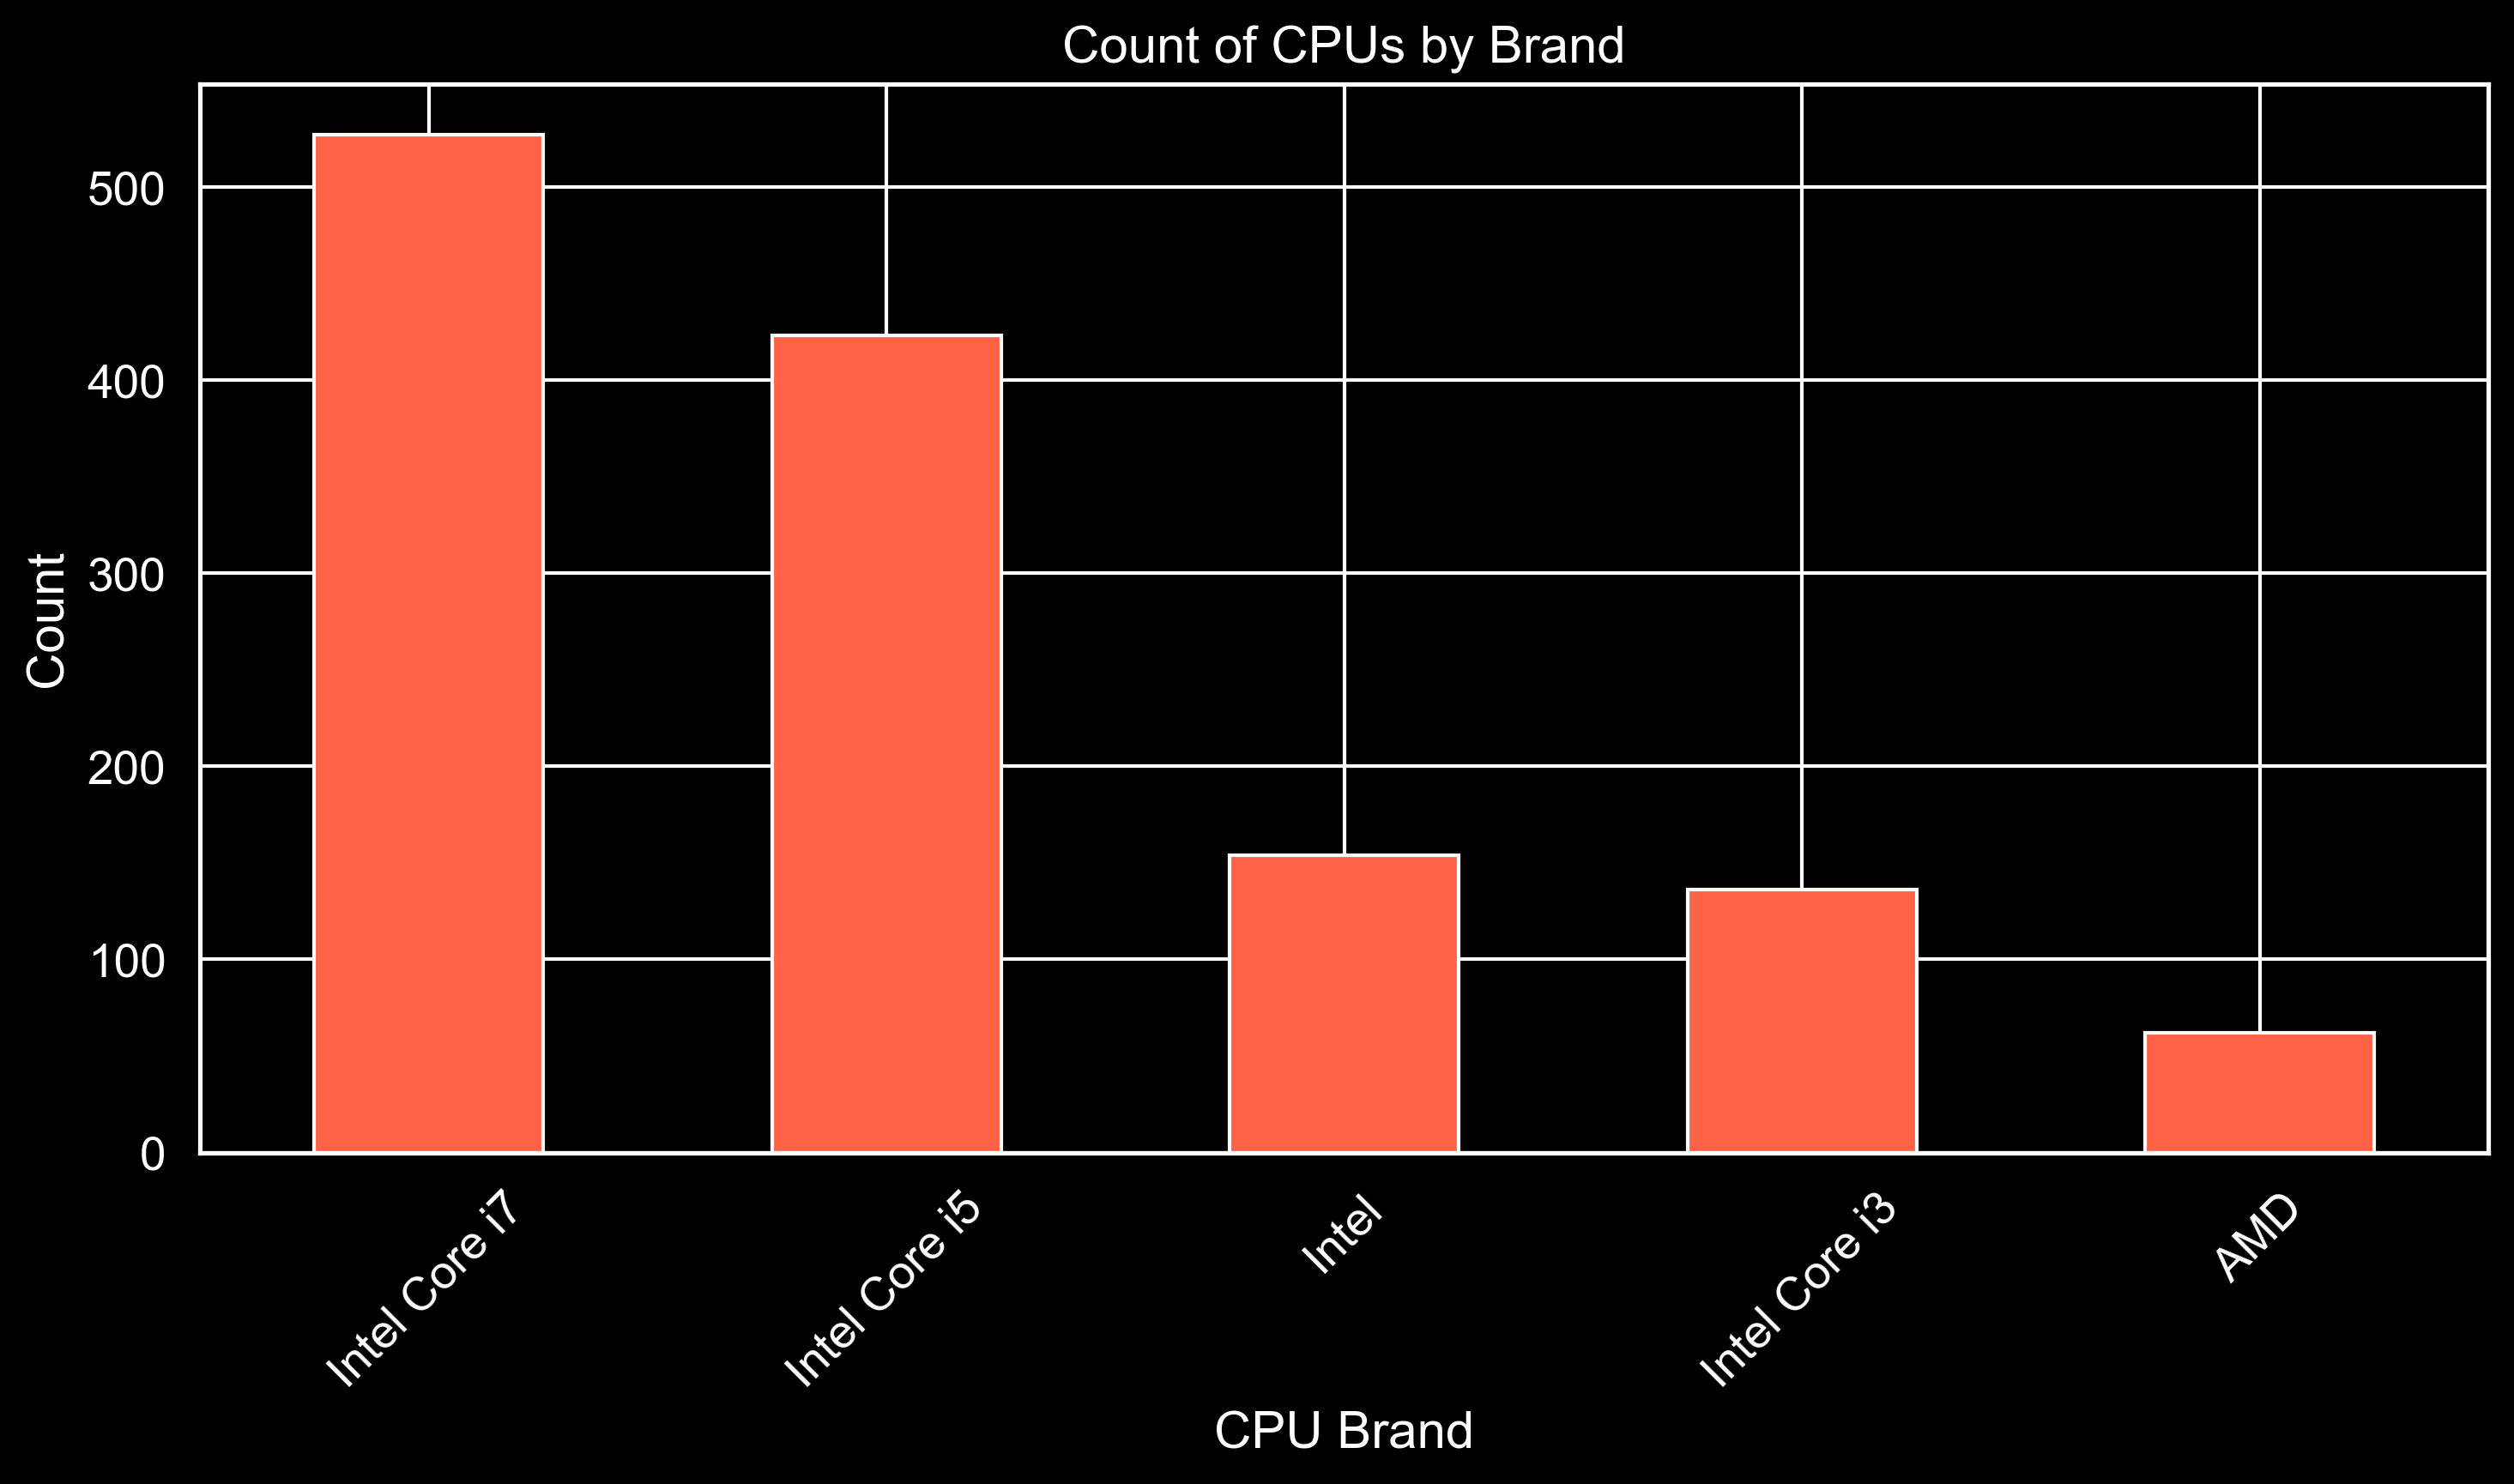

In [74]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
df['CpuBrand'].value_counts().plot(kind='bar', color='tomato')
plt.title('Count of CPUs by Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distributions/cpubrand_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\7256059.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['CpuBrand'], y=df['Price'], estimator='mean', ci=None, color='coral')


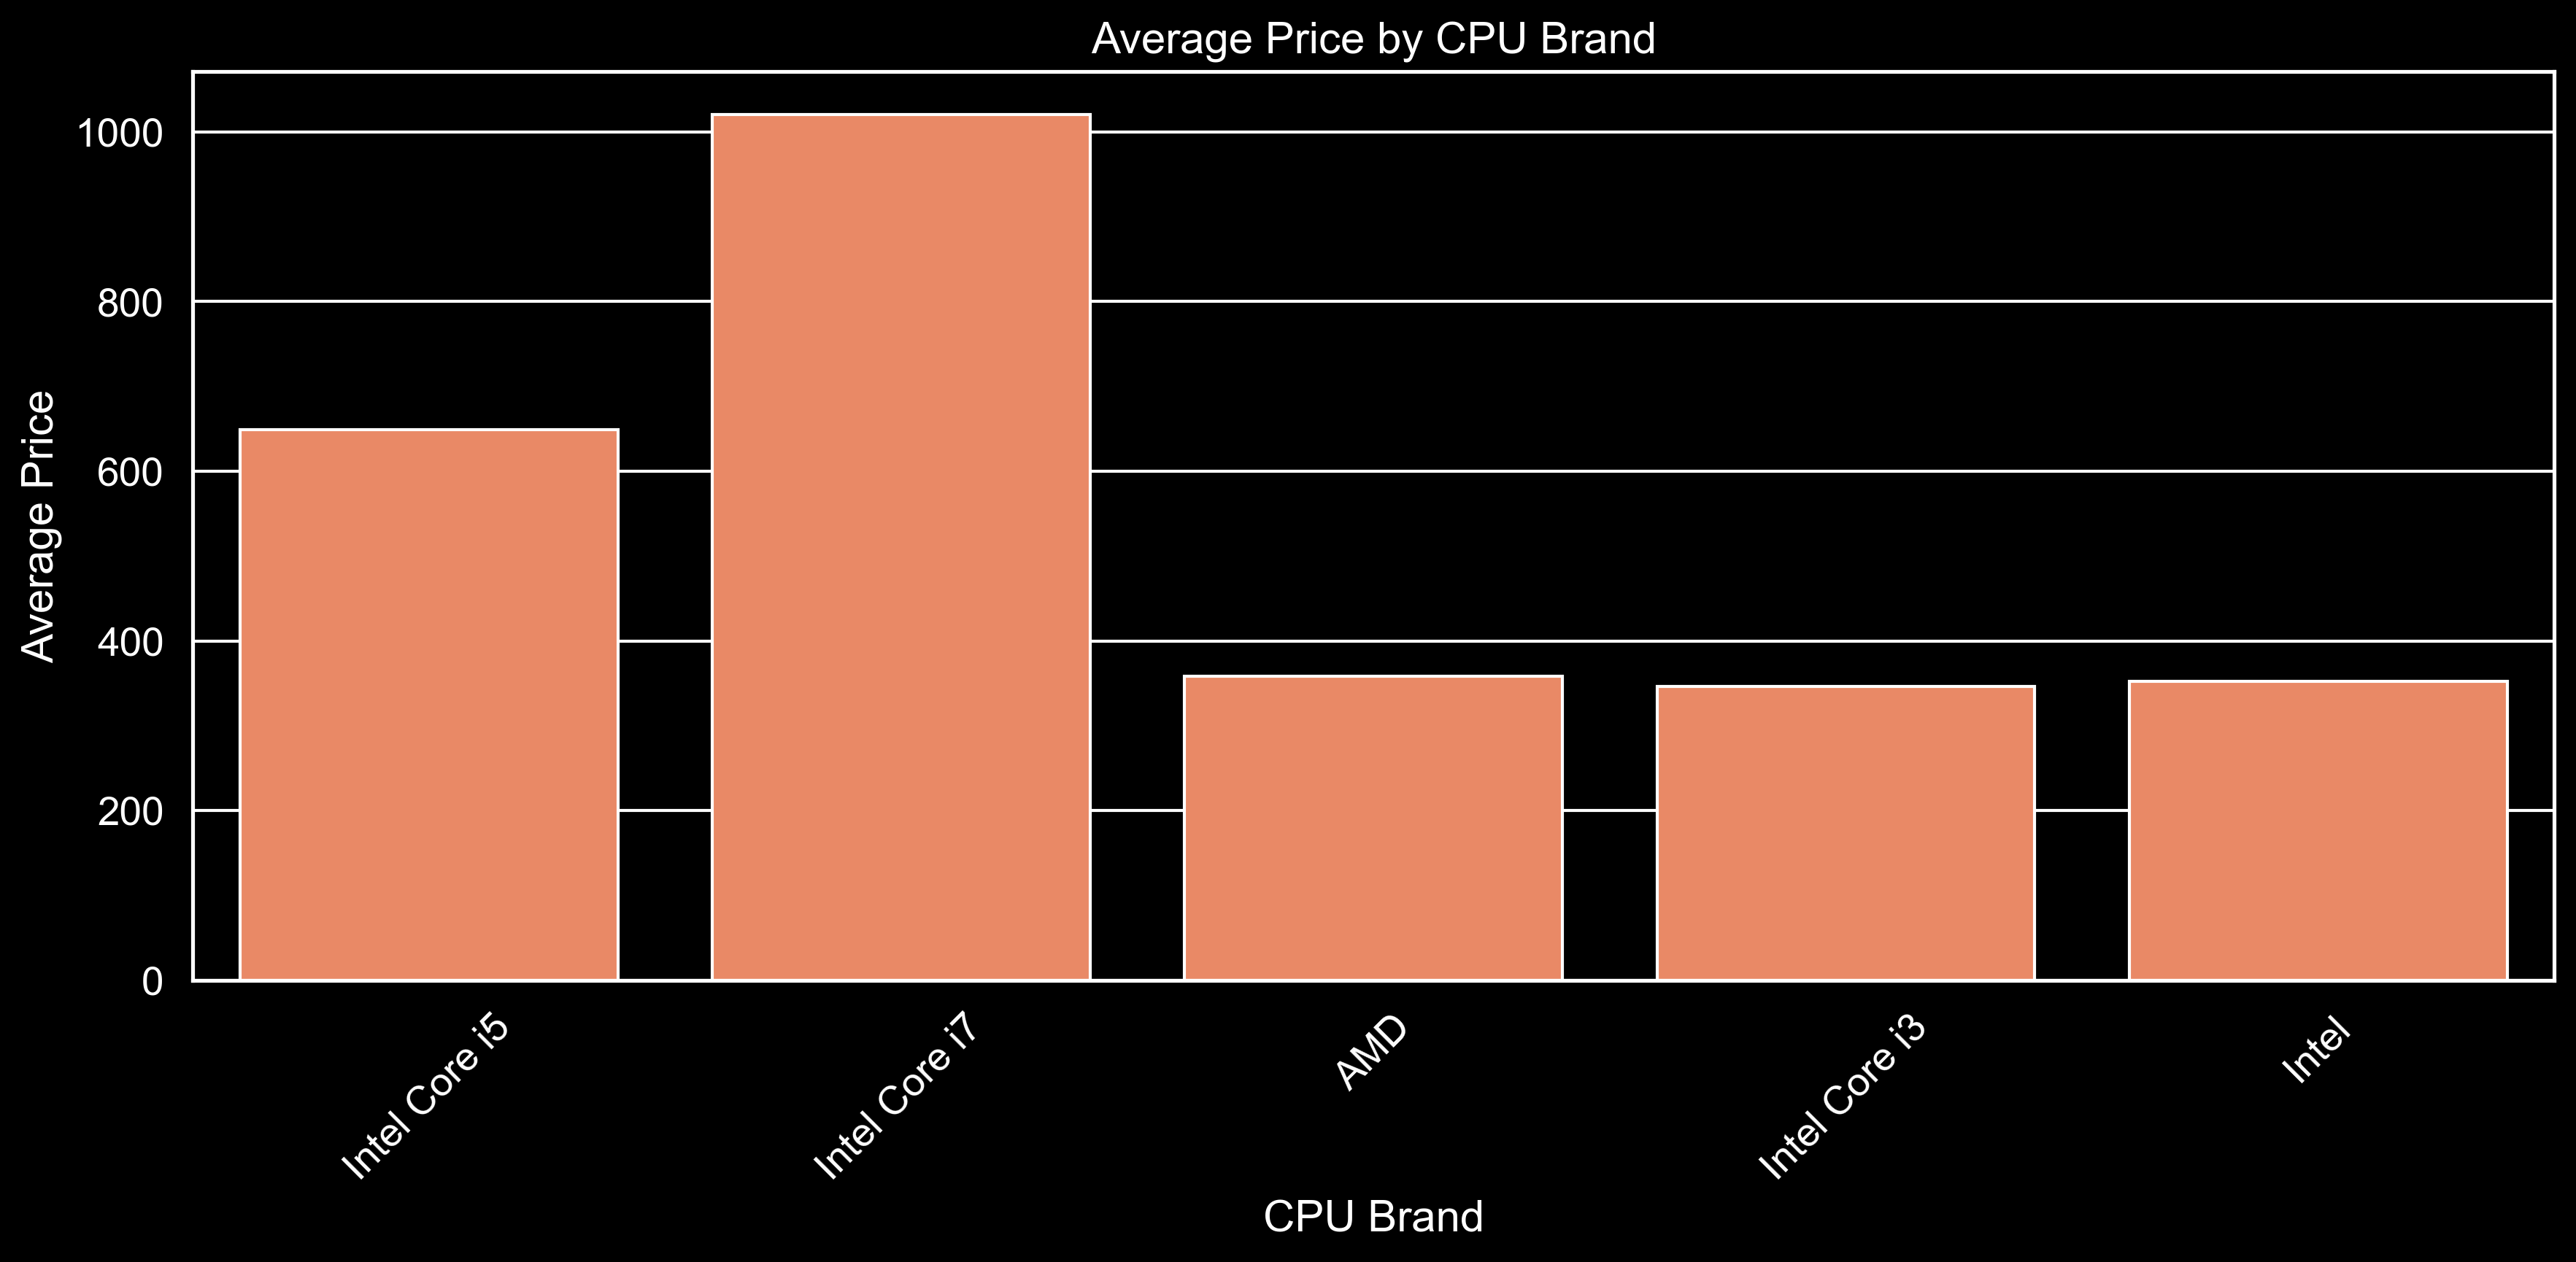

In [76]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6), dpi=300)

sns.barplot(x=df['CpuBrand'], y=df['Price'], estimator='mean', ci=None, color='coral')
plt.title('Average Price by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distributions/avg_price_by_cpubrand.png', dpi=300)
plt.show()

In [77]:
df.drop(columns=['Cpu', 'CpuName'], inplace=True)

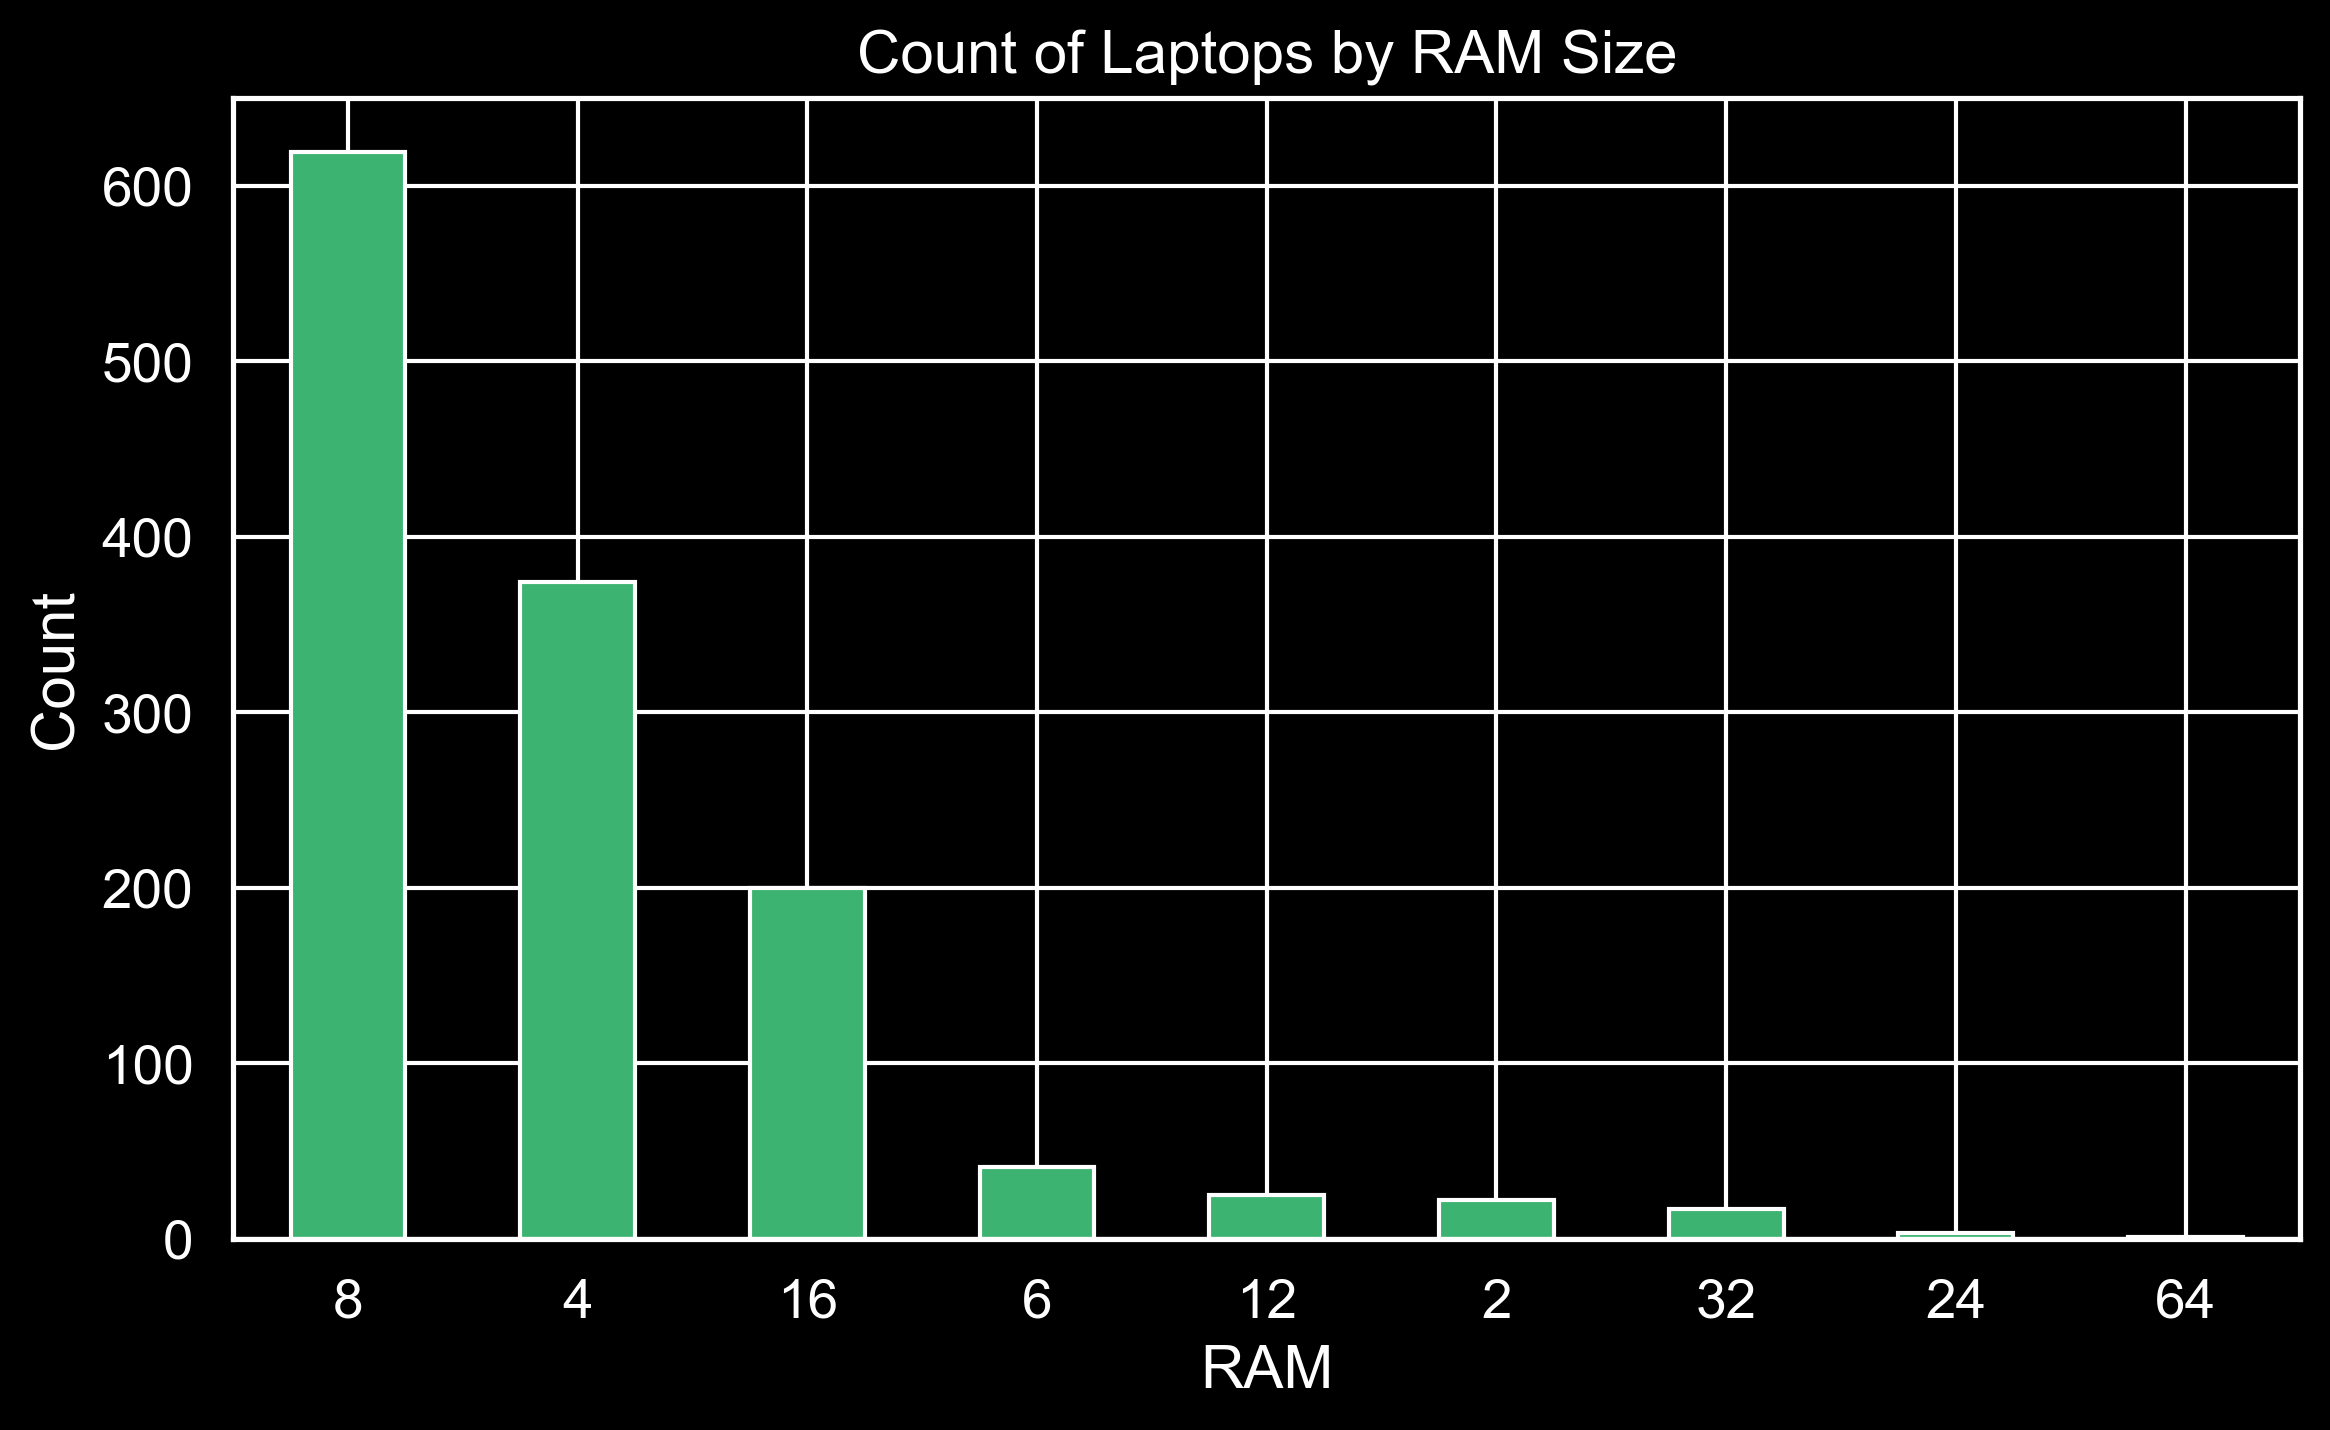

In [79]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5), dpi=300)

df['Ram'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Count of Laptops by RAM Size')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('distributions/ram_count.png', dpi=300)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\3327533361.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Ram'], y=df['Price'], estimator='mean', ci=None, color='seagreen')


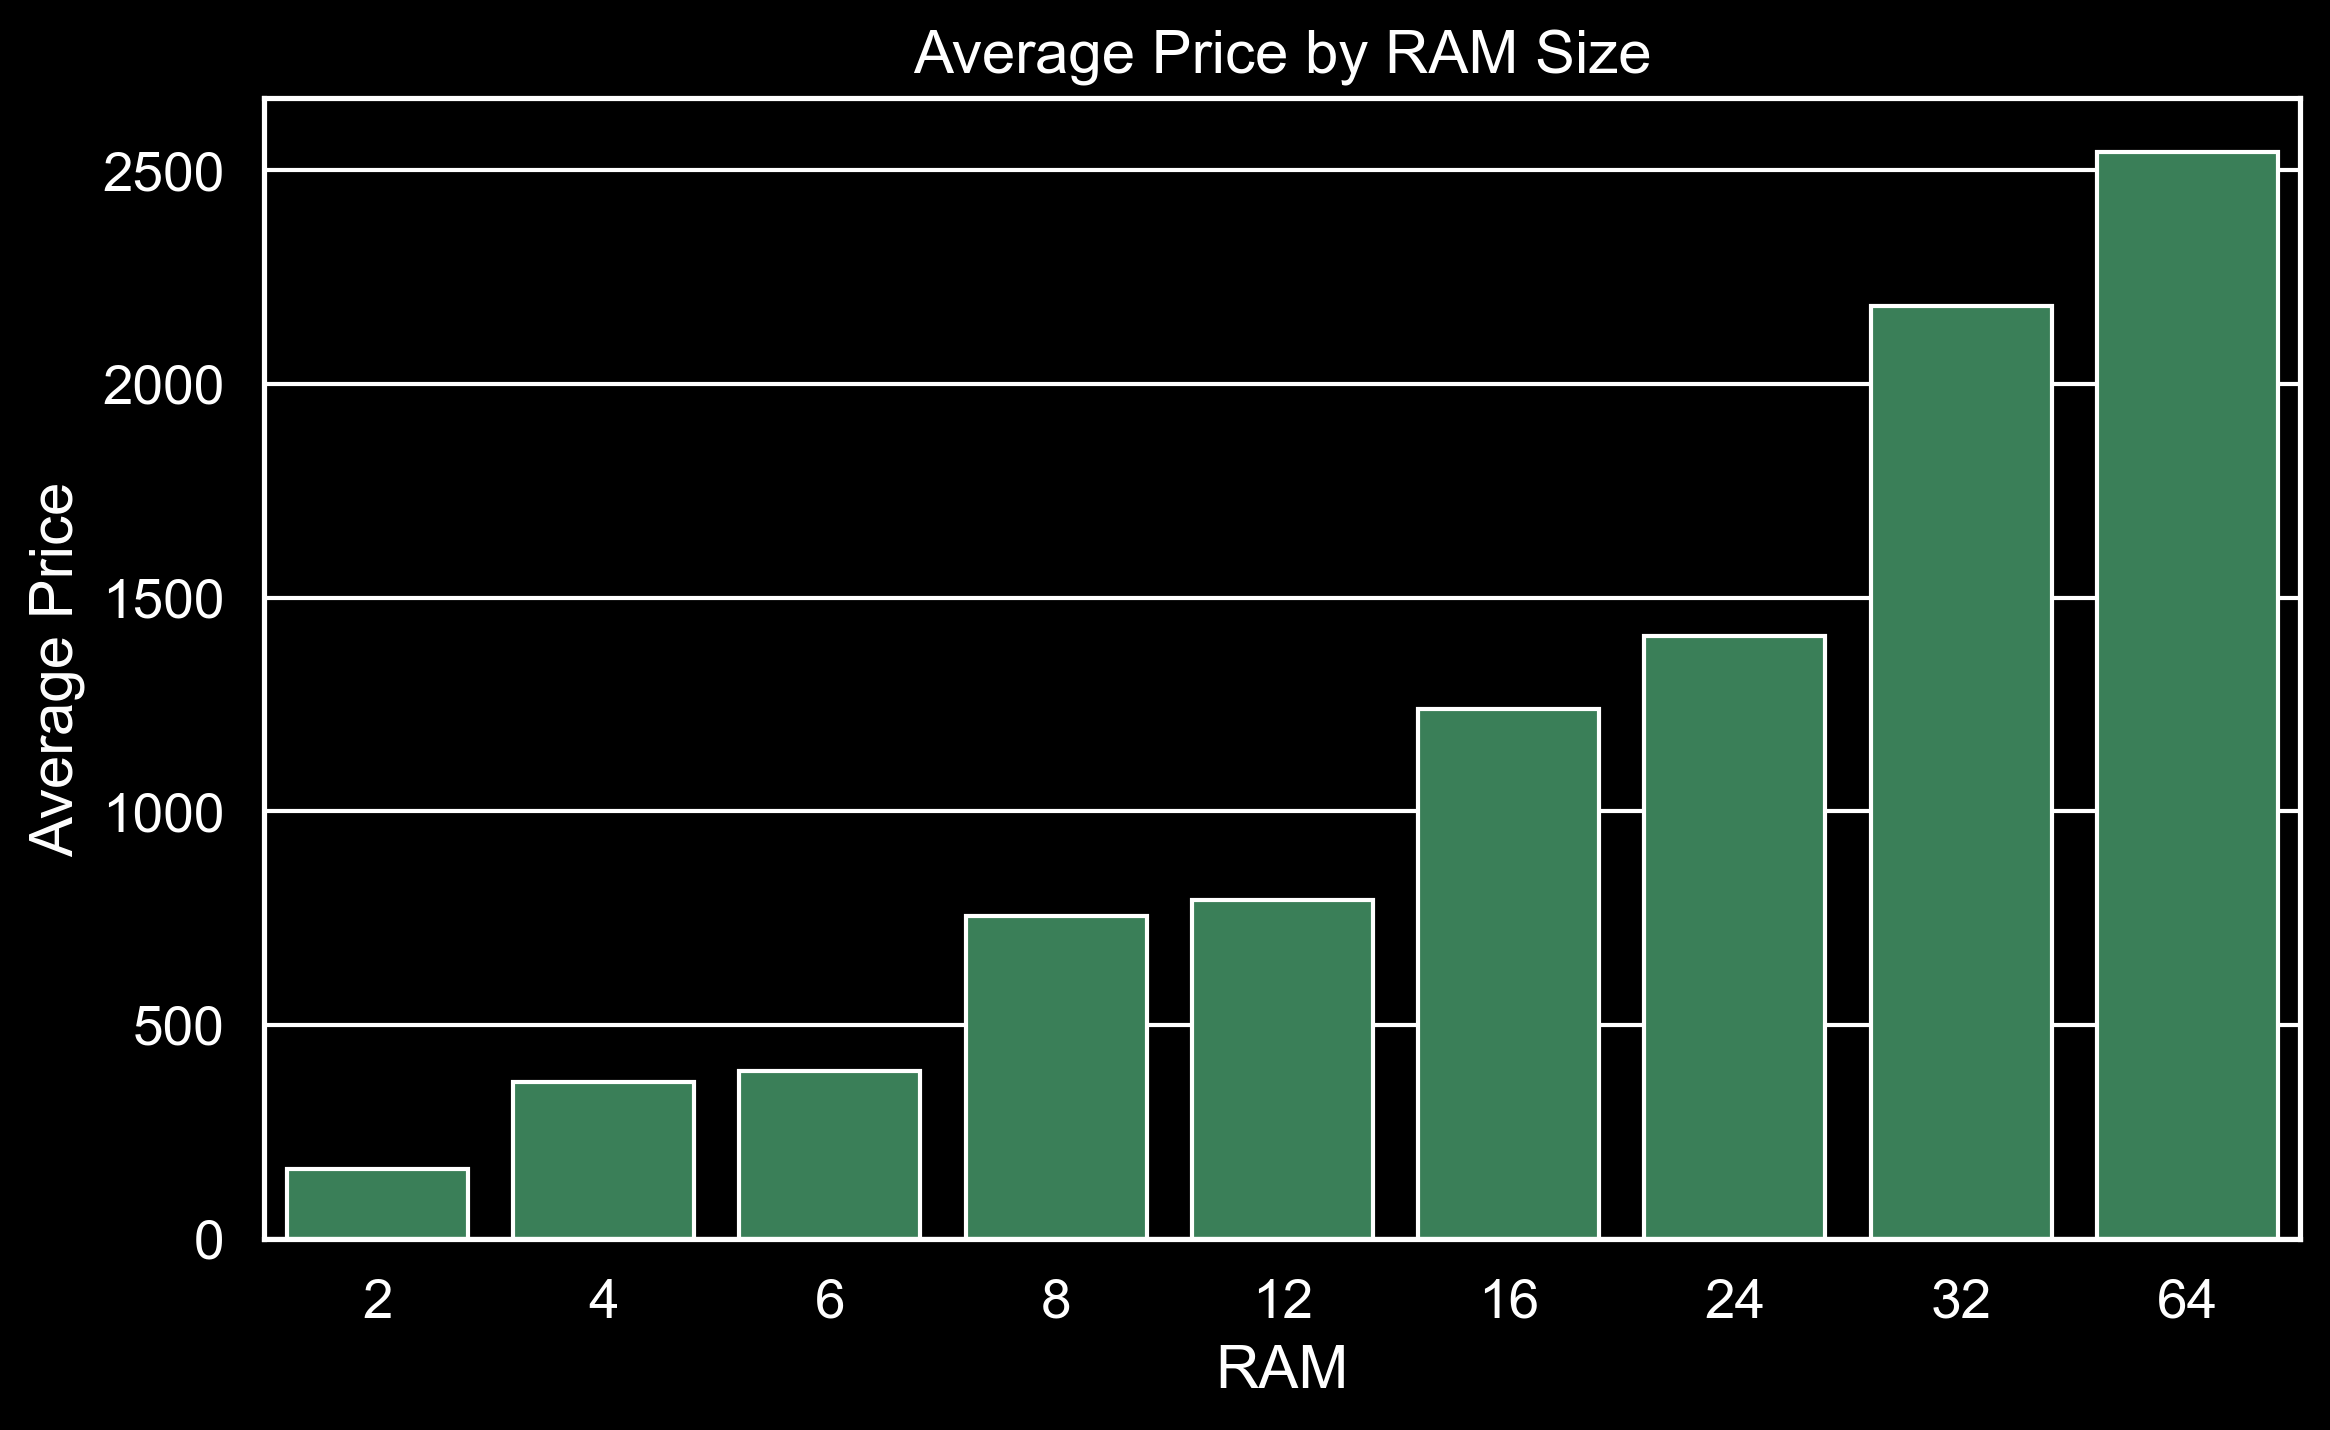

In [81]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5), dpi=300)

sns.barplot(x=df['Ram'], y=df['Price'], estimator='mean', ci=None, color='seagreen')
plt.title('Average Price by RAM Size')
plt.xlabel('RAM')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('distributions/avg_price_by_ram.png', dpi=300)
plt.show()

In [82]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [83]:
df['Memory'] = df['Memory'].str.replace(r'\s+', ' ', regex=True).str.strip().str.upper()

In [84]:
df['SSD'] = 0
df['HDD'] = 0
df['Flash'] = 0
df['Hybrid'] = 0

def convert_to_gb(size_str):
    if 'TB' in size_str:
        return int(float(size_str.replace('TB', '')) * 1024)
    elif 'GB' in size_str:
        return int(float(size_str.replace('GB', '')))
    return 0

for i, row in df.iterrows():
    parts = row['Memory'].split('+')
    for part in parts:
        part = part.strip()
        if 'SSD' in part and 'FLASH' not in part:
            df.at[i, 'SSD'] += convert_to_gb(part.replace('SSD', '').strip())
        elif 'HDD' in part:
            df.at[i, 'HDD'] += convert_to_gb(part.replace('HDD', '').strip())
        elif 'FLASH' in part:
            df.at[i, 'Flash'] += convert_to_gb(part.replace('FLASH STORAGE', '').strip())
        elif 'HYBRID' in part:
            df.at[i, 'Hybrid'] += convert_to_gb(part.replace('HYBRID', '').strip())


In [85]:
df.drop('Memory', axis=1, inplace=True)

In [86]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
ppi            0.475368
SSD            0.670543
HDD           -0.095304
Flash         -0.040067
Hybrid         0.007963
Name: Price, dtype: float64

In [87]:
df.drop(columns=['Hybrid', 'Flash'], inplace=True)

In [88]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: count, Length: 109, dtype: int64

In [89]:
df['GpuBrand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [90]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\1225772188.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['GpuBrand'], y=df['Price'], estimator=np.median, ci=None, color='slateblue')


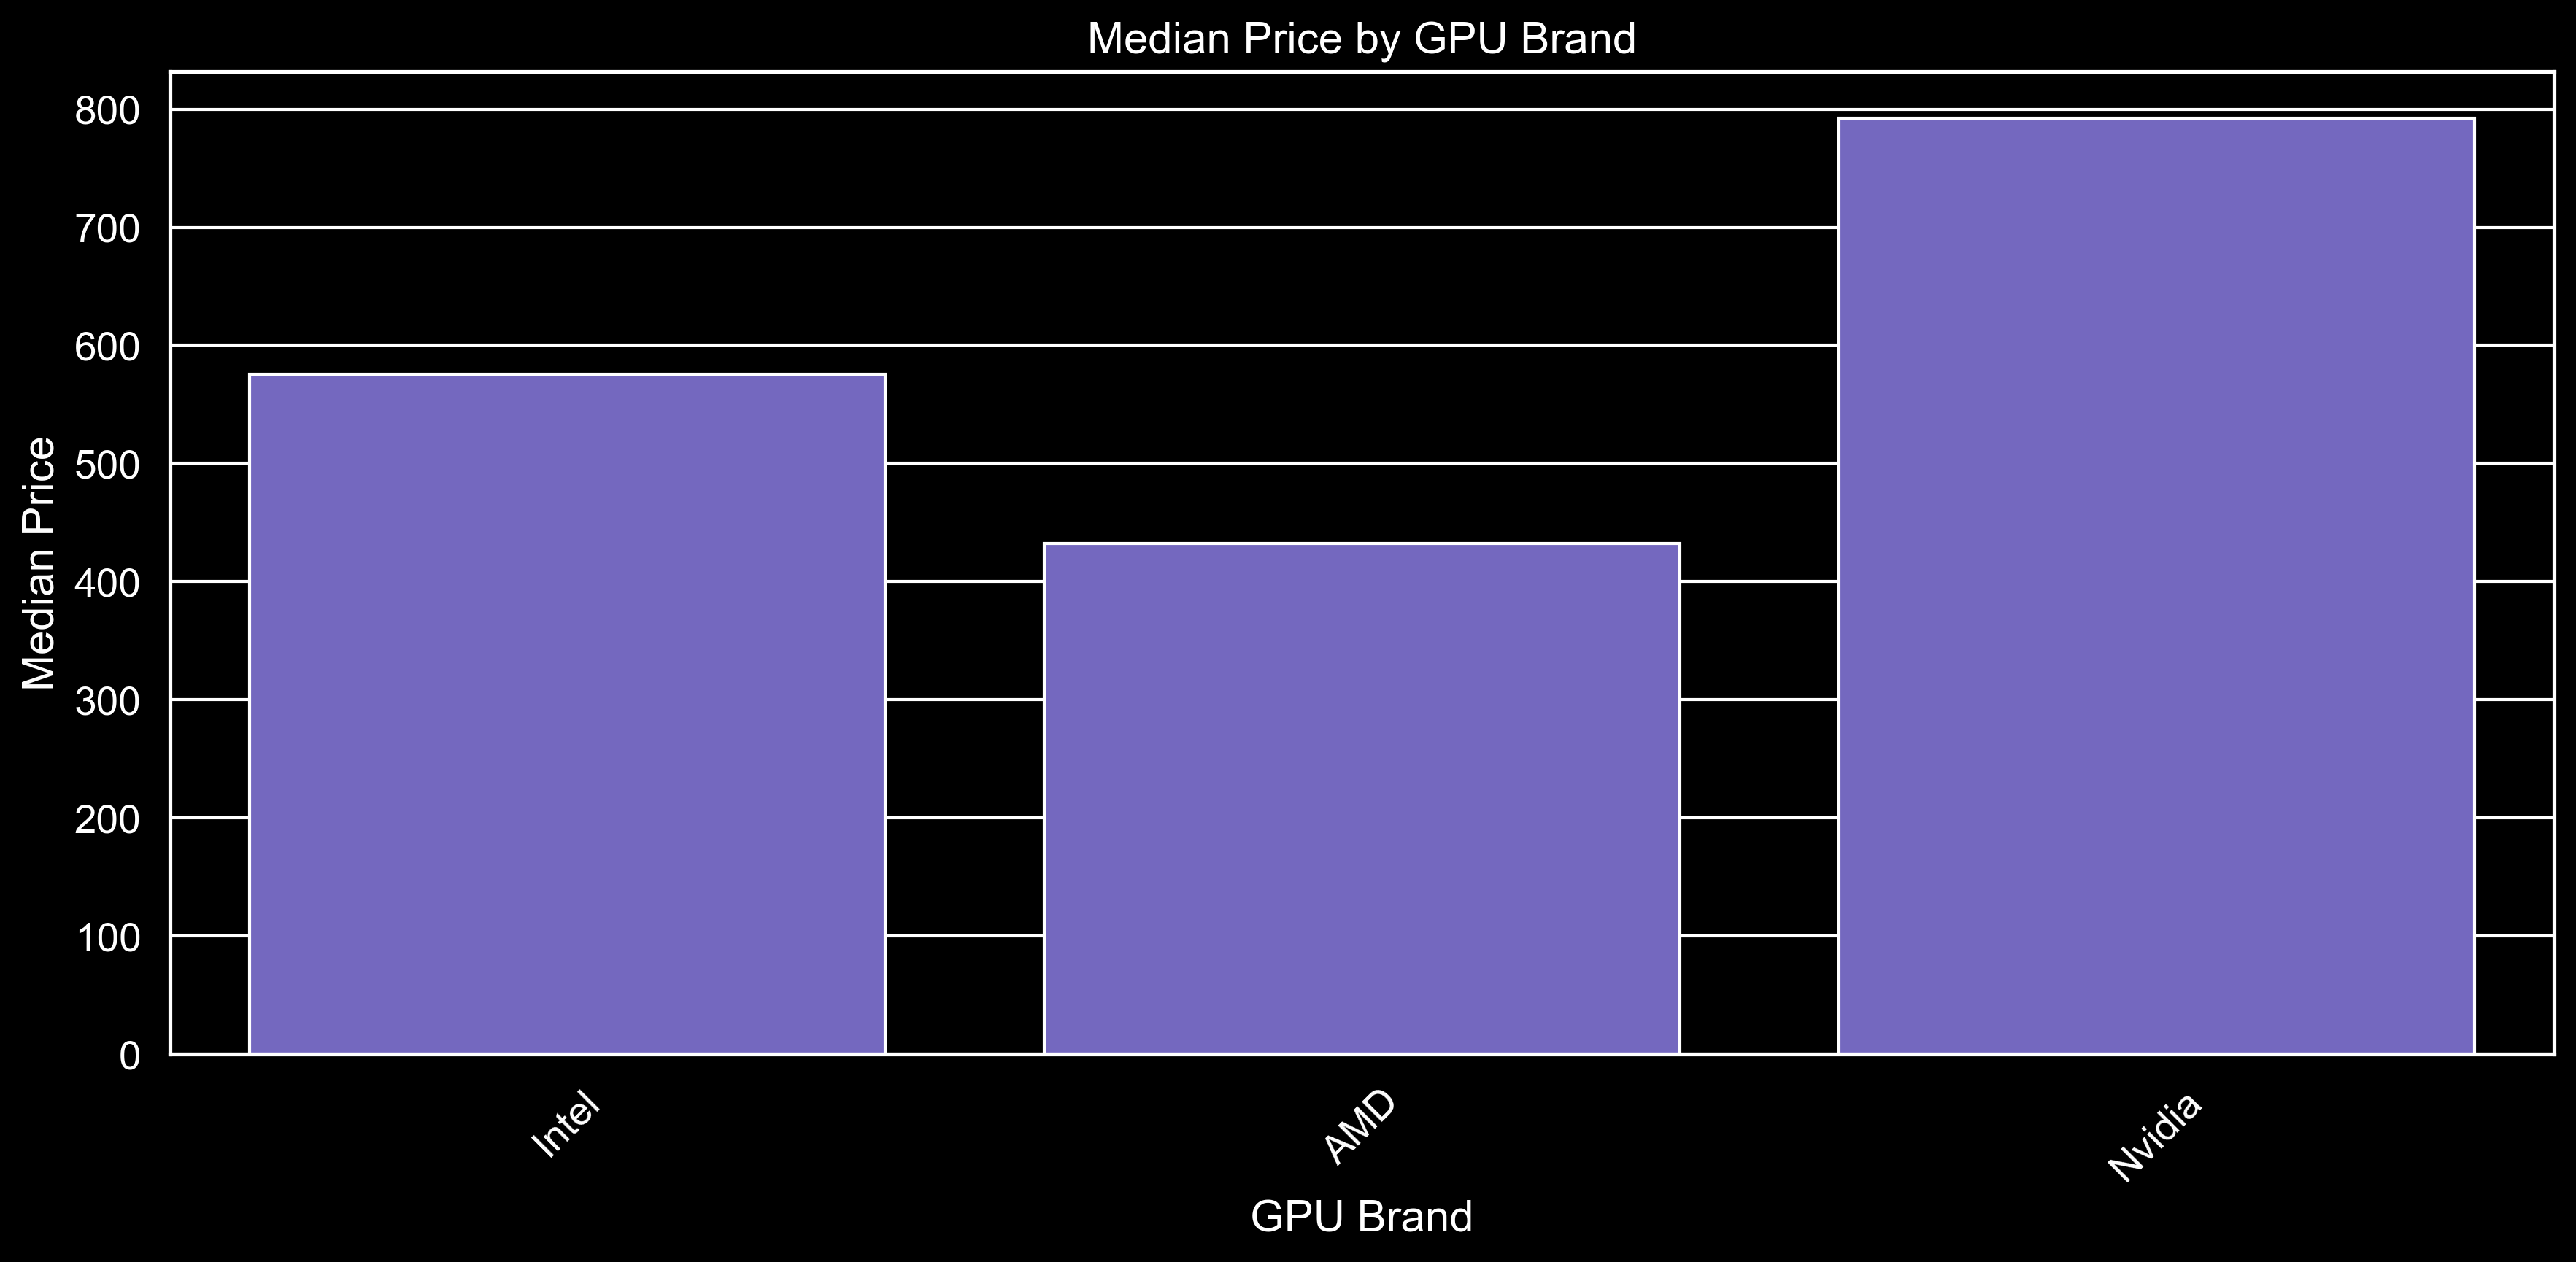

In [92]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df['GpuBrand'], y=df['Price'], estimator=np.median, ci=None, color='slateblue')
plt.title('Median Price by GPU Brand')
plt.xlabel('GPU Brand')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distributions/median_price_by_gpubrand.png', dpi=300)
plt.show()

In [93]:
df.drop(columns=['Gpu'], inplace=True)

In [94]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\3654117157.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['OpSys'], y=df['Price'], estimator='mean', ci=None, color='steelblue')


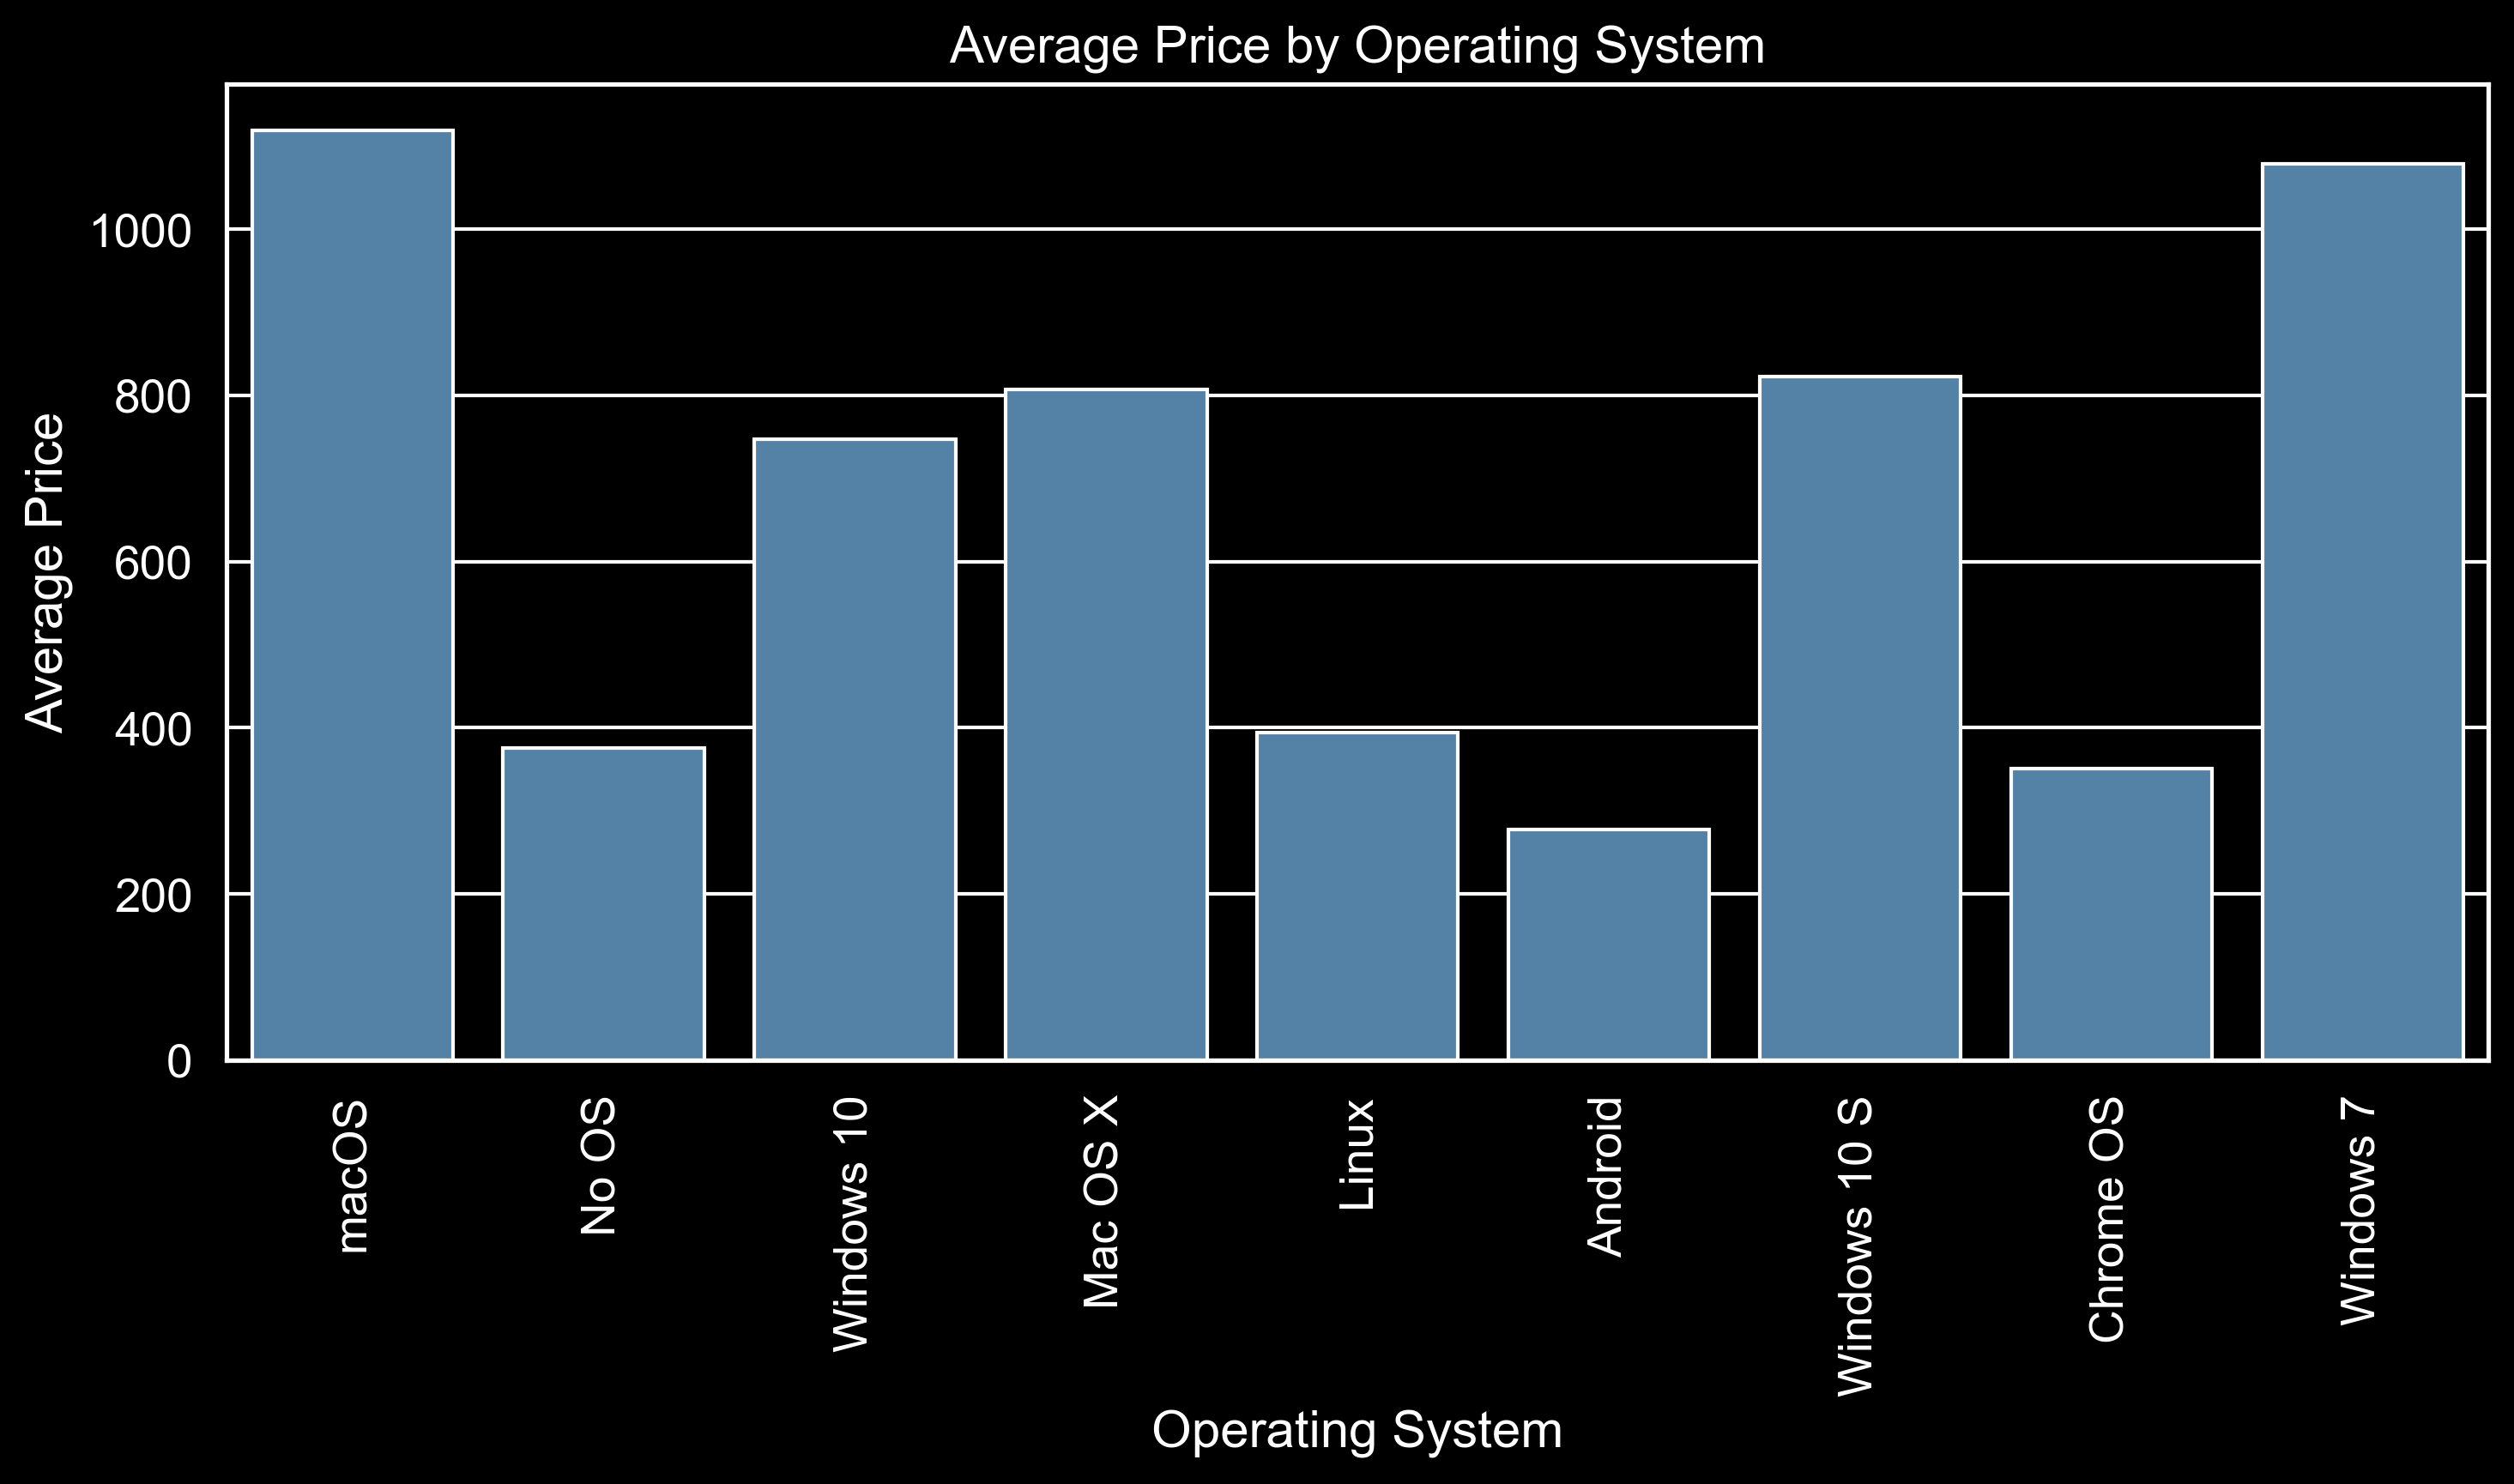

In [96]:
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x=df['OpSys'], y=df['Price'], estimator='mean', ci=None, color='steelblue')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_opsys.png', dpi=300)
plt.show()

In [97]:
def clean_opsys(os):
    os = os.strip().upper()
    if 'WINDOWS' in os:
        return 'Windows'
    elif 'MAC' in os or 'MACOS' in os:
        return 'macOS'
    elif 'LINUX' in os:
        return 'Linux'
    elif 'CHROME' in os:
        return 'Chrome OS'
    elif 'ANDROID' in os:
        return 'Android'
    elif 'NO OS' in os:
        return 'No OS'
    else:
        return 'Other'

In [98]:
df['os'] = df['OpSys'].apply(clean_opsys)

In [99]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12976\727055070.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['os'], y=df['Price'], estimator='mean', ci=None, color='mediumvioletred')


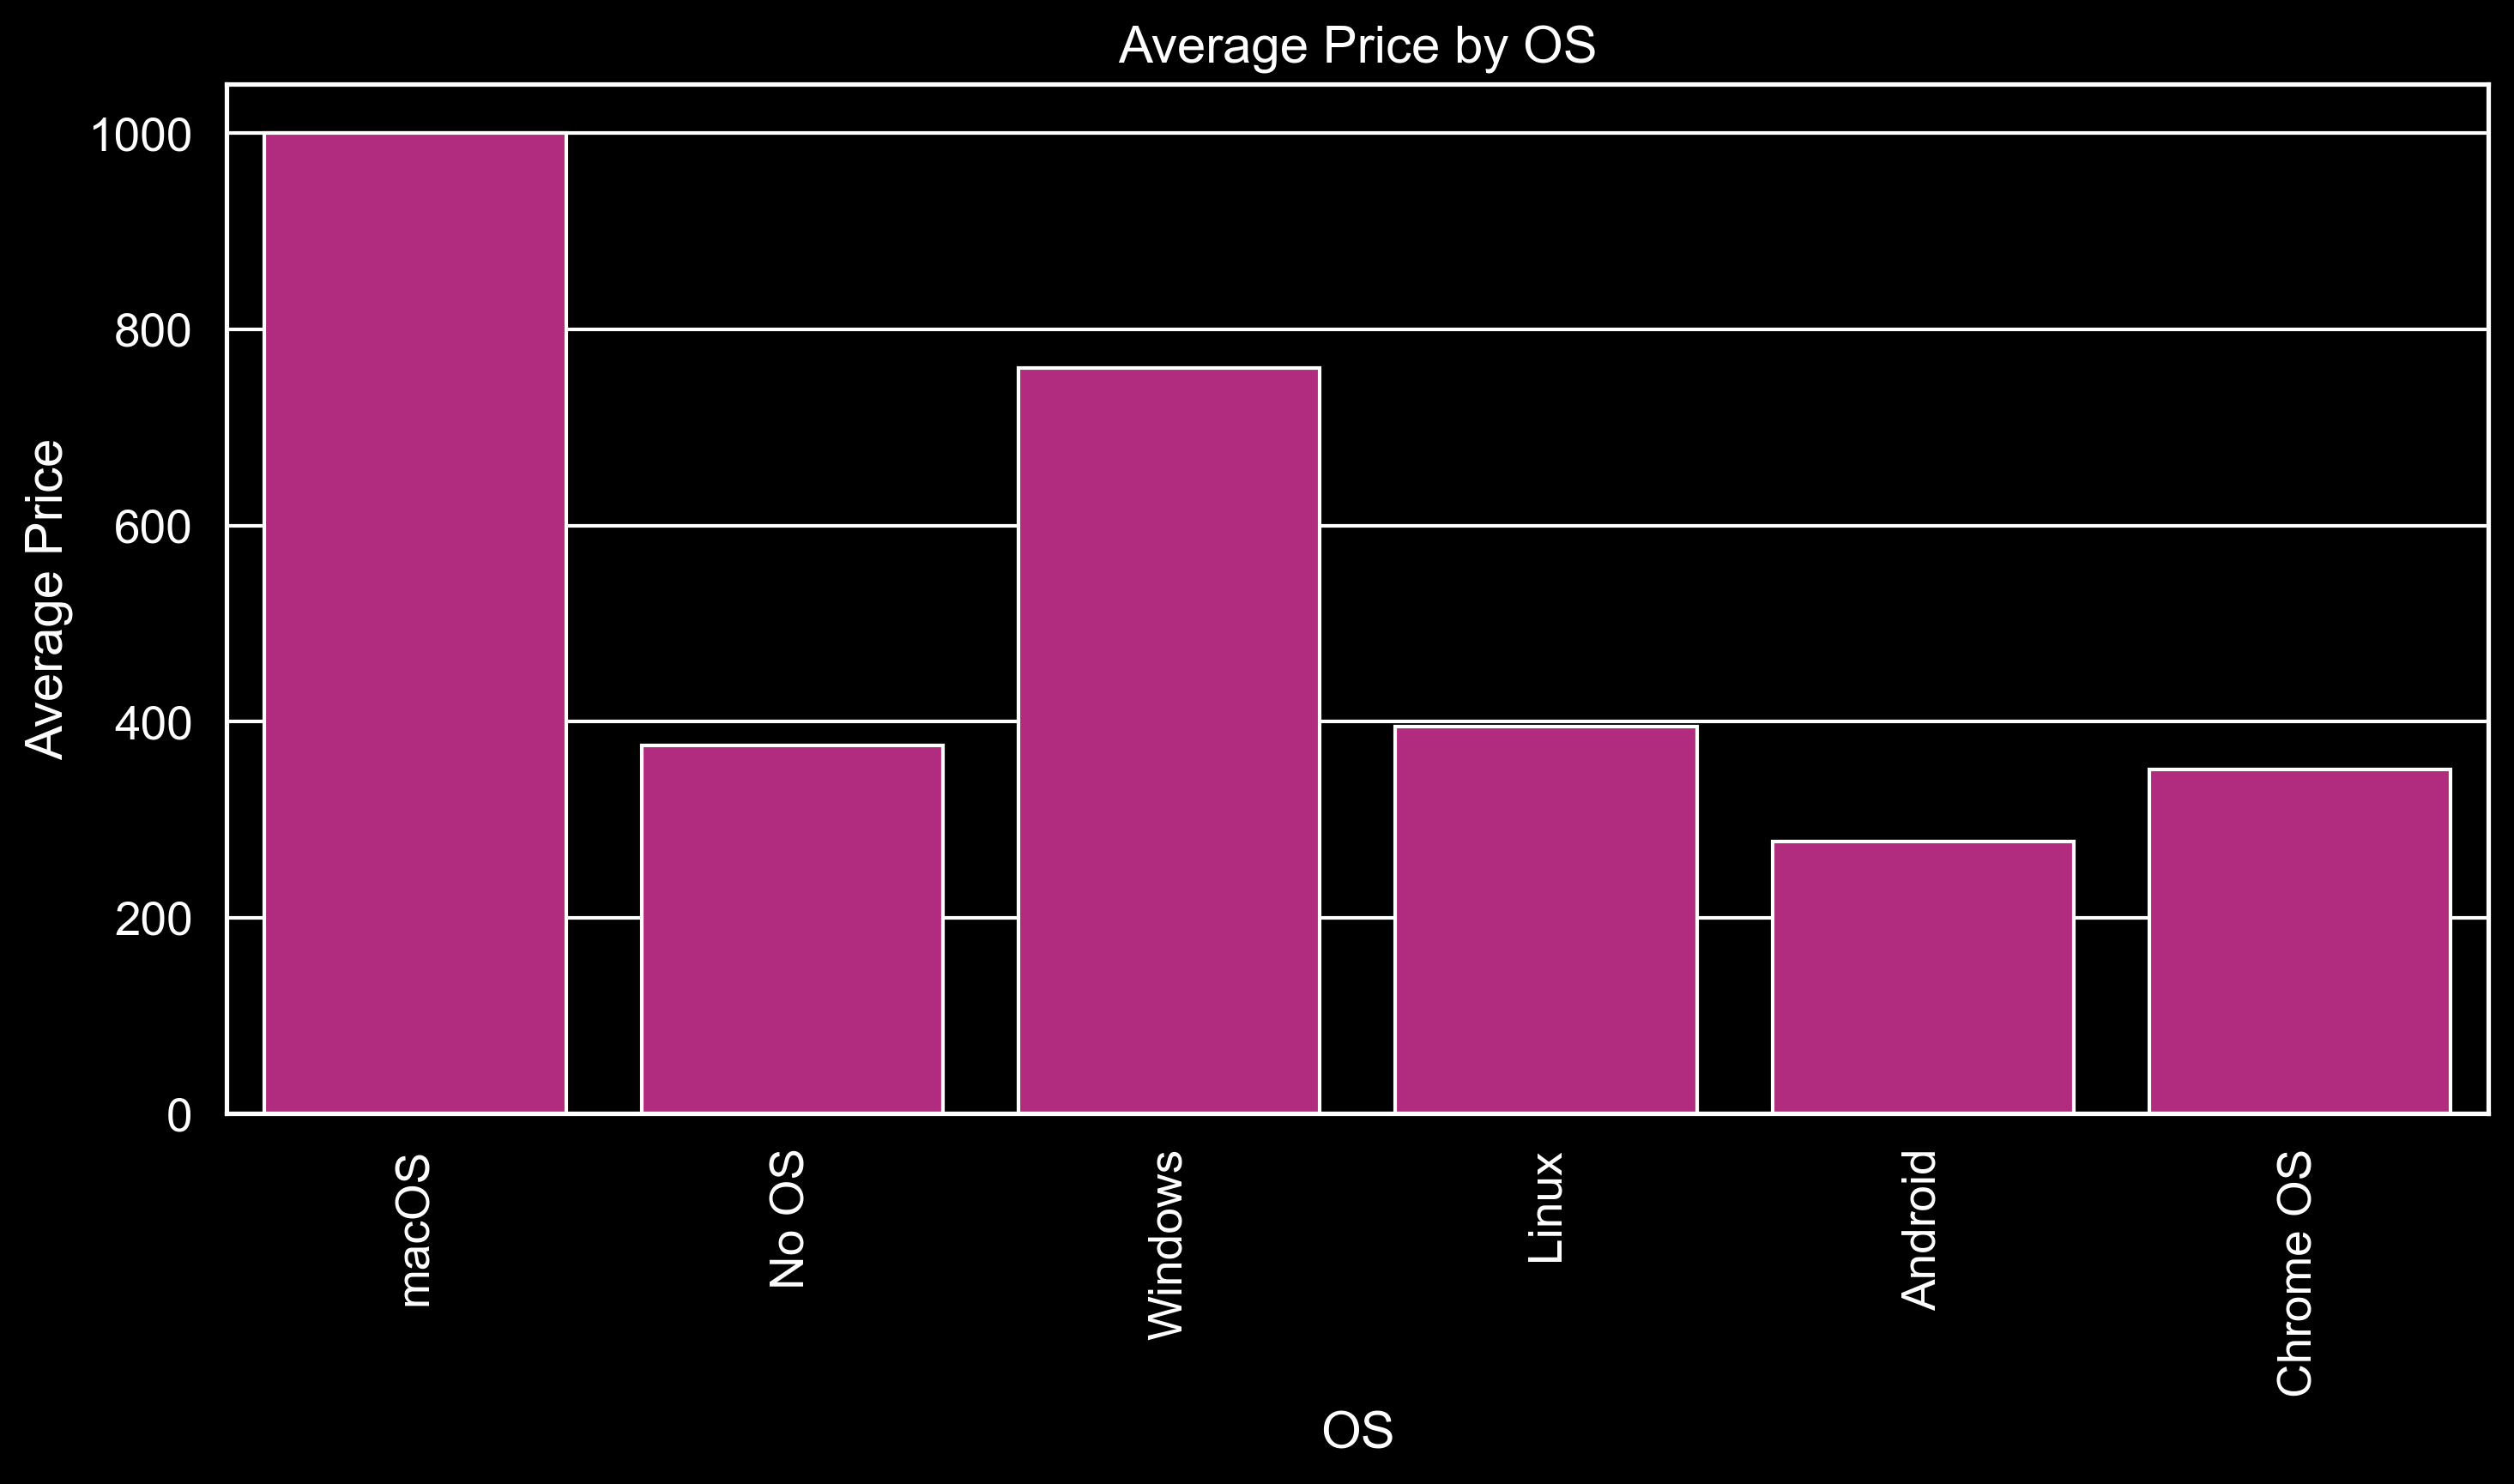

In [101]:
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x=df['os'], y=df['Price'], estimator='mean', ci=None, color='mediumvioletred')
plt.title('Average Price by OS')
plt.xlabel('OS')
plt.ylabel('Average Price')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('distributions/avg_price_by_os.png', dpi=300)
plt.show()

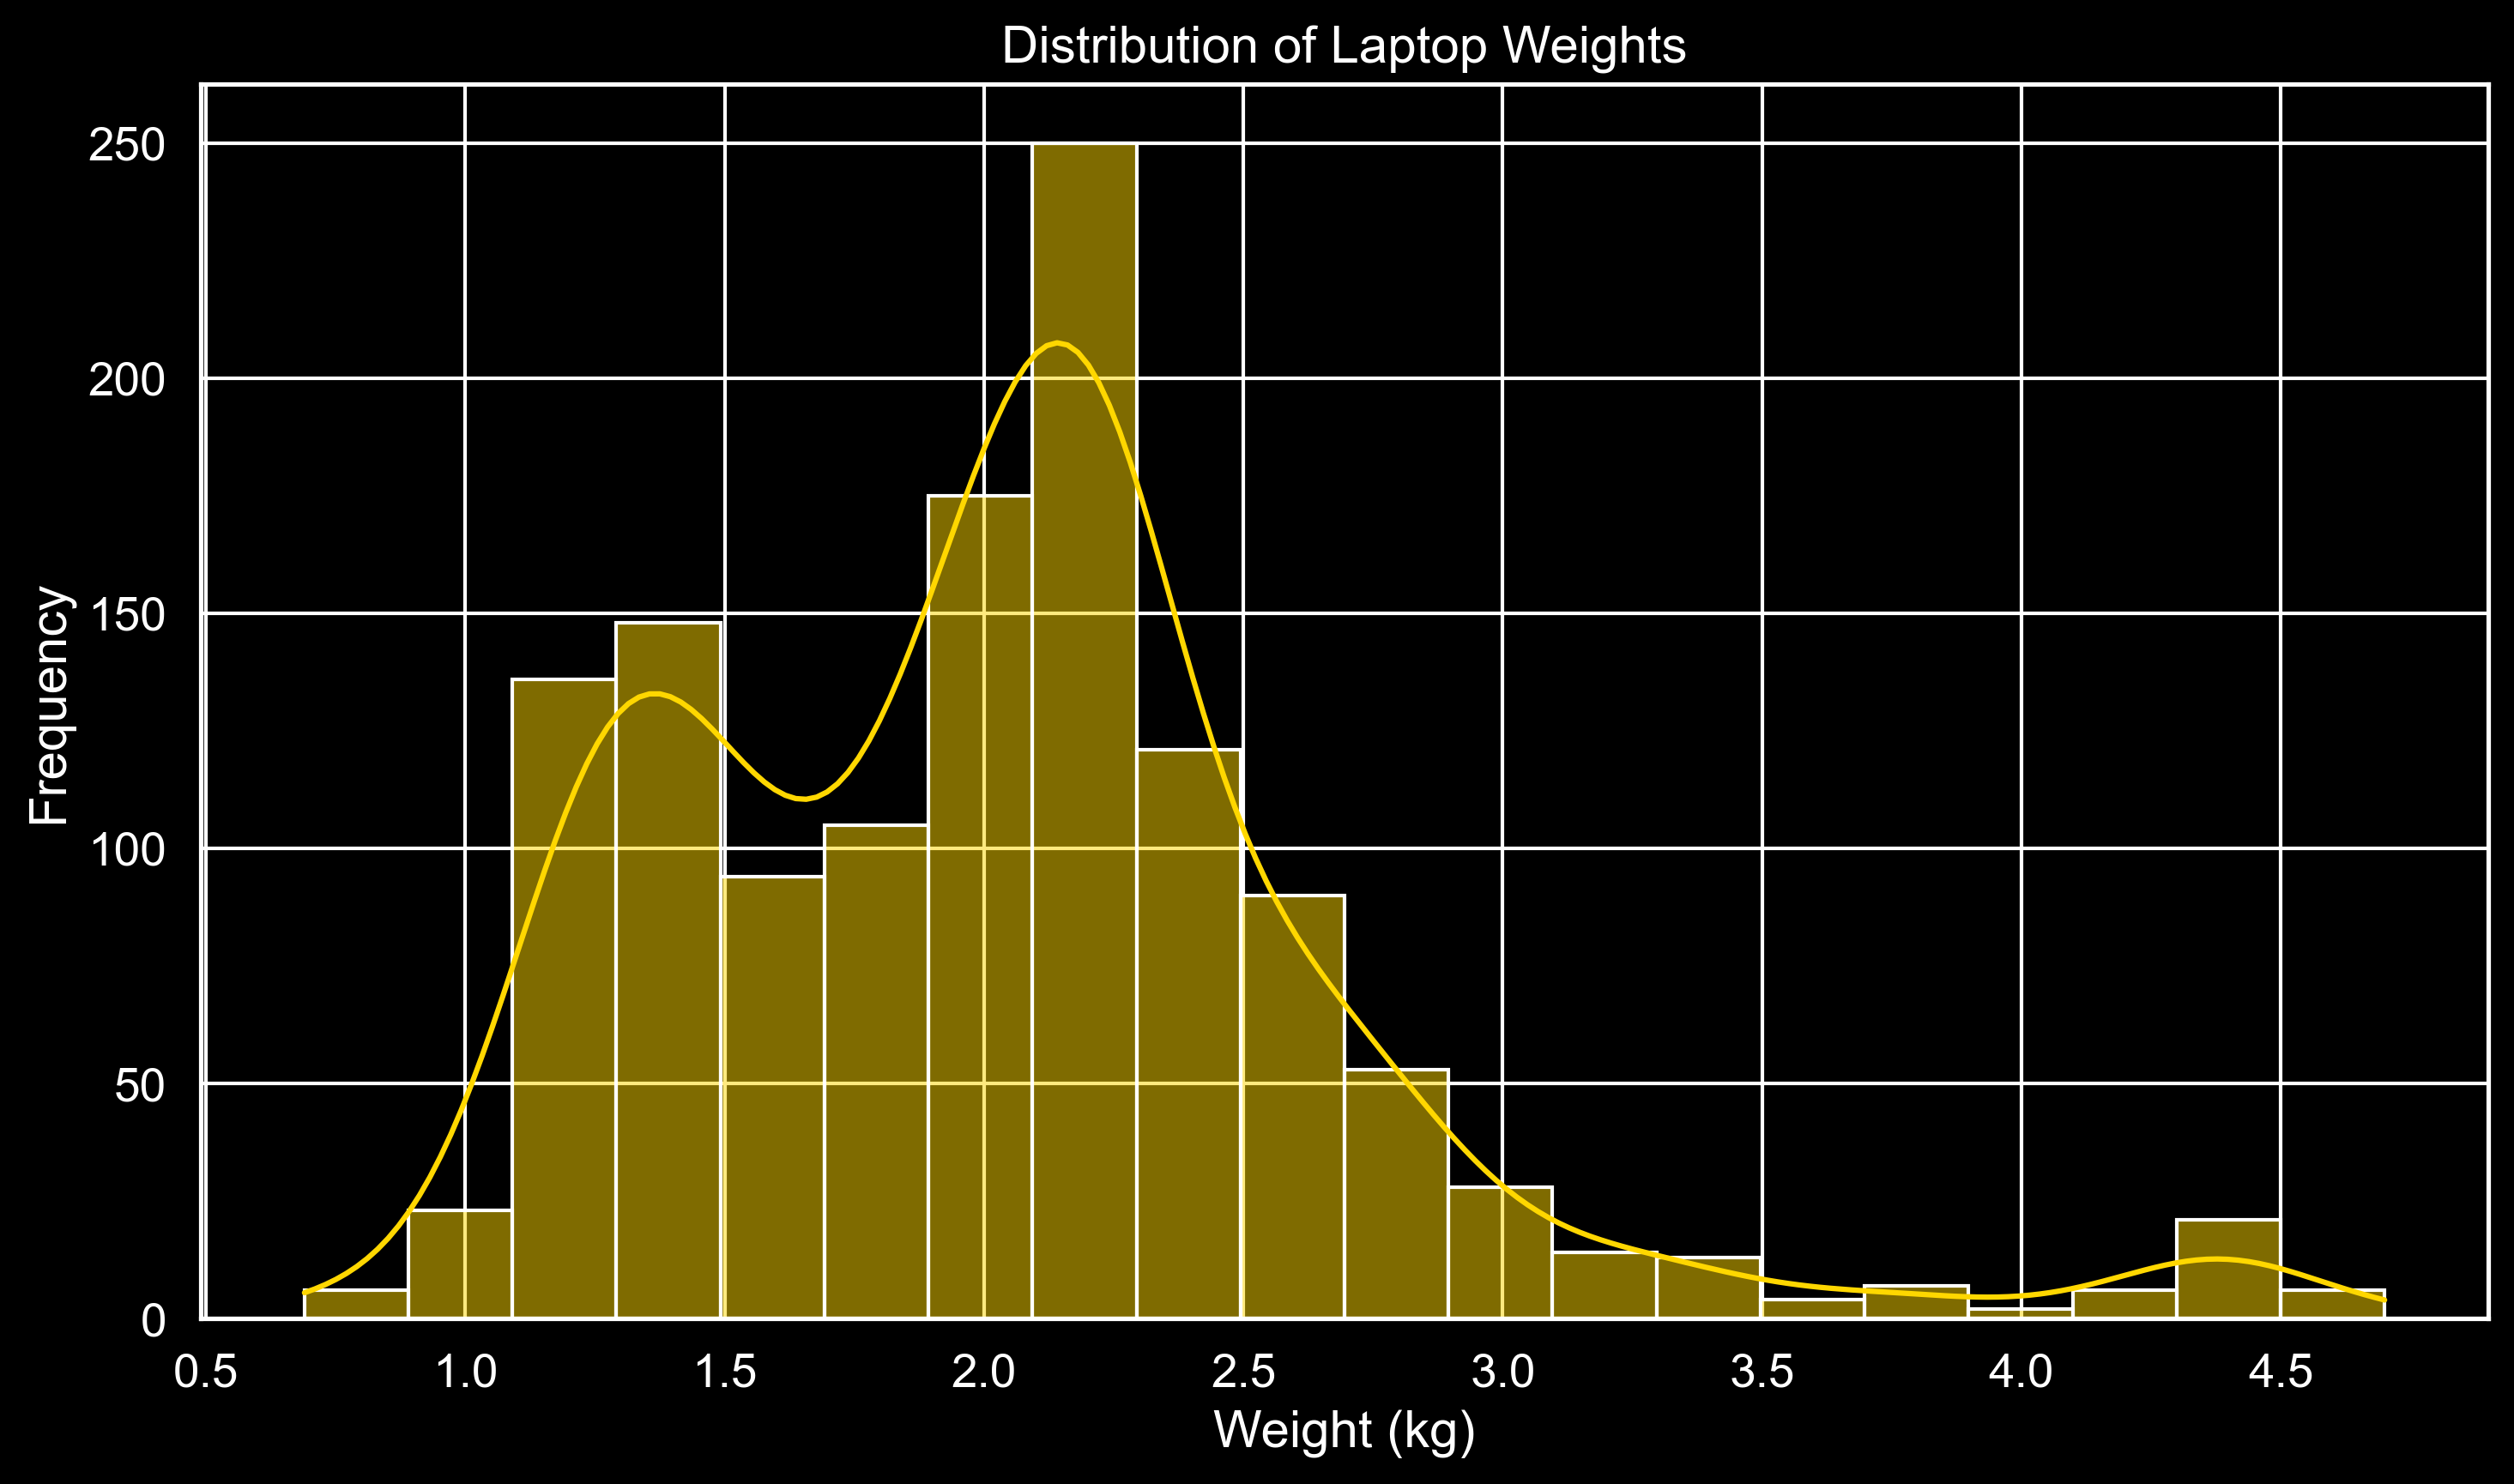

In [104]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['Weight'], kde=True, color='gold', bins=20)
plt.title('Distribution of Laptop Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distributions/weight_distribution.png', dpi=300)
plt.show()

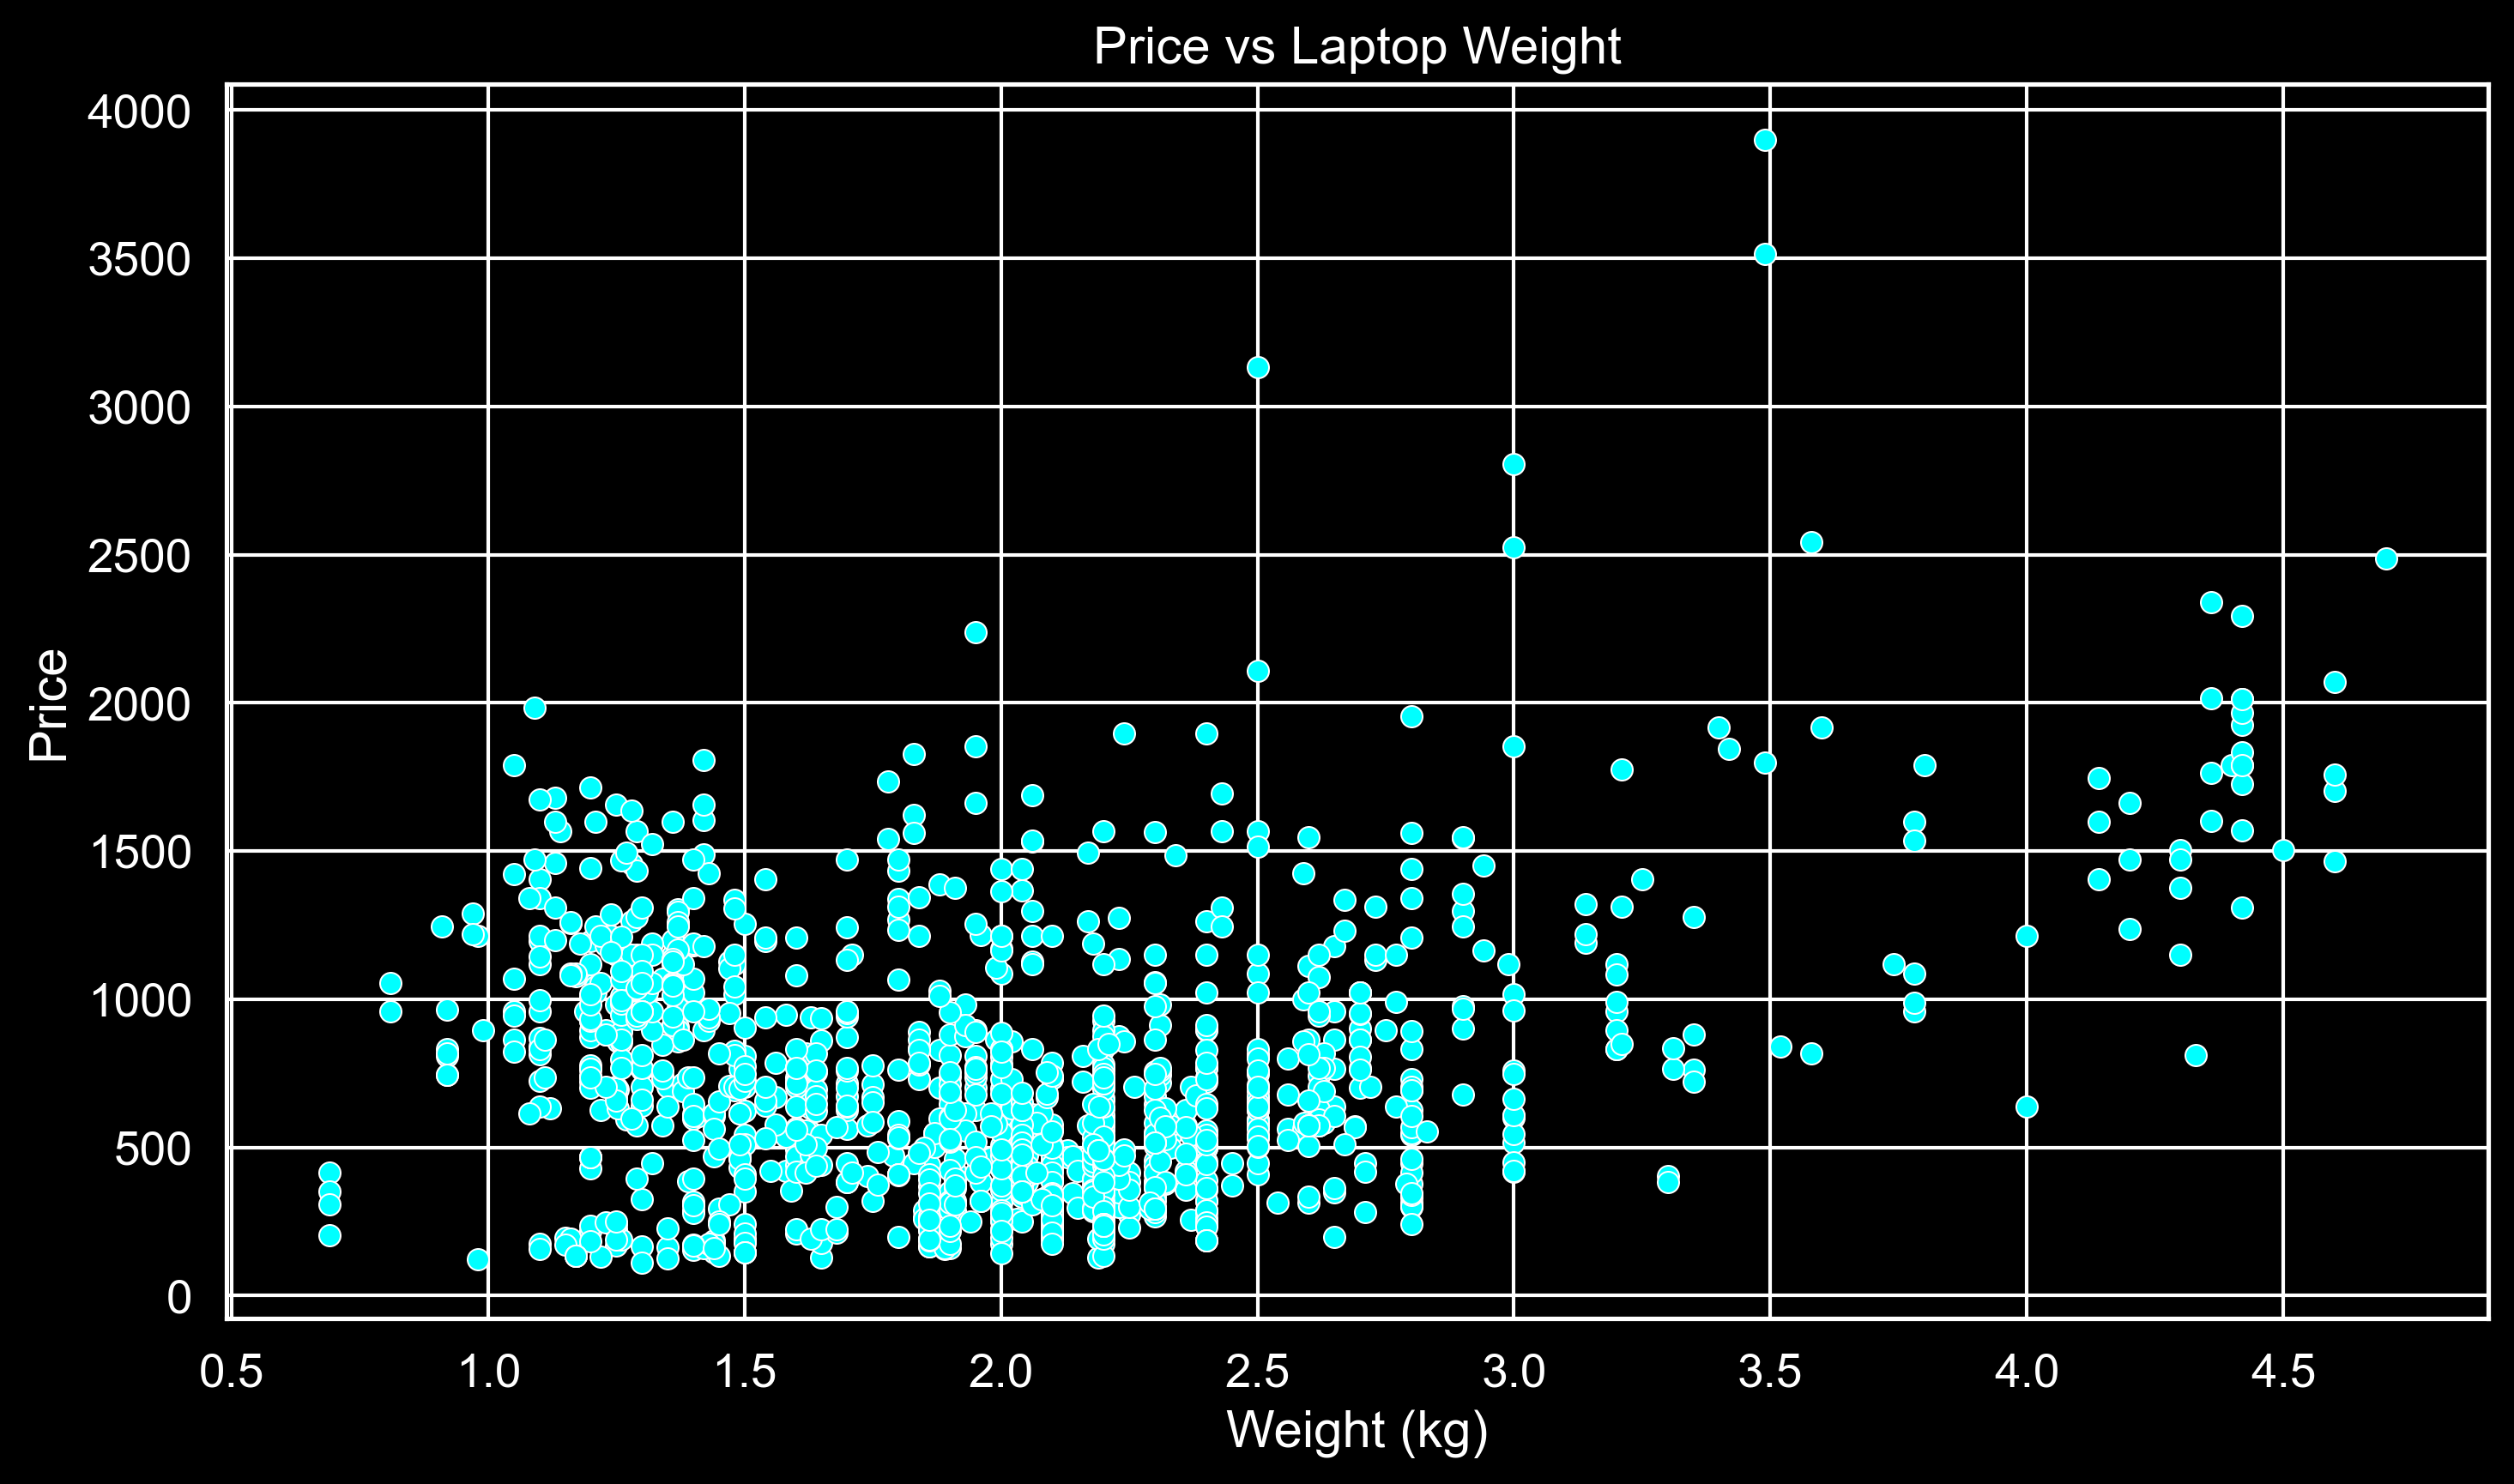

In [106]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), dpi=300)

sns.scatterplot(x=df['Weight'], y=df['Price'], color='cyan')
plt.title('Price vs Laptop Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('distributions/price_vs_weight.png', dpi=300)
plt.show()

In [107]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
ppi            0.475368
SSD            0.670543
HDD           -0.095304
Name: Price, dtype: float64

In [108]:
df.corr(numeric_only=True)

Ram    Weight     Price  TouchScreen       IPS       ppi  \
Ram          1.000000  0.383362  0.742905     0.118875  0.207949  0.305688   
Weight       0.383362  1.000000  0.209867    -0.293004  0.018643 -0.321883   
Price        0.742905  0.209867  1.000000     0.192917  0.253320  0.475368   
TouchScreen  0.118875 -0.293004  0.192917     1.000000  0.148026  0.458571   
IPS          0.207949  0.018643  0.253320     0.148026  1.000000  0.299142   
ppi          0.305688 -0.321883  0.475368     0.458571  0.299142  1.000000   
SSD          0.603865 -0.062888  0.670543     0.257360  0.224522  0.509319   
HDD          0.097704  0.514211 -0.095304    -0.208018 -0.092436 -0.293007   

                  SSD       HDD  
Ram          0.603865  0.097704  
Weight      -0.062888  0.514211  
Price        0.670543 -0.095304  
TouchScreen  0.257360 -0.208018  
IPS          0.224522 -0.092436  
ppi          0.509319 -0.293007  
SSD          1.000000 -0.396753  
HDD         -0.396753  1.000000

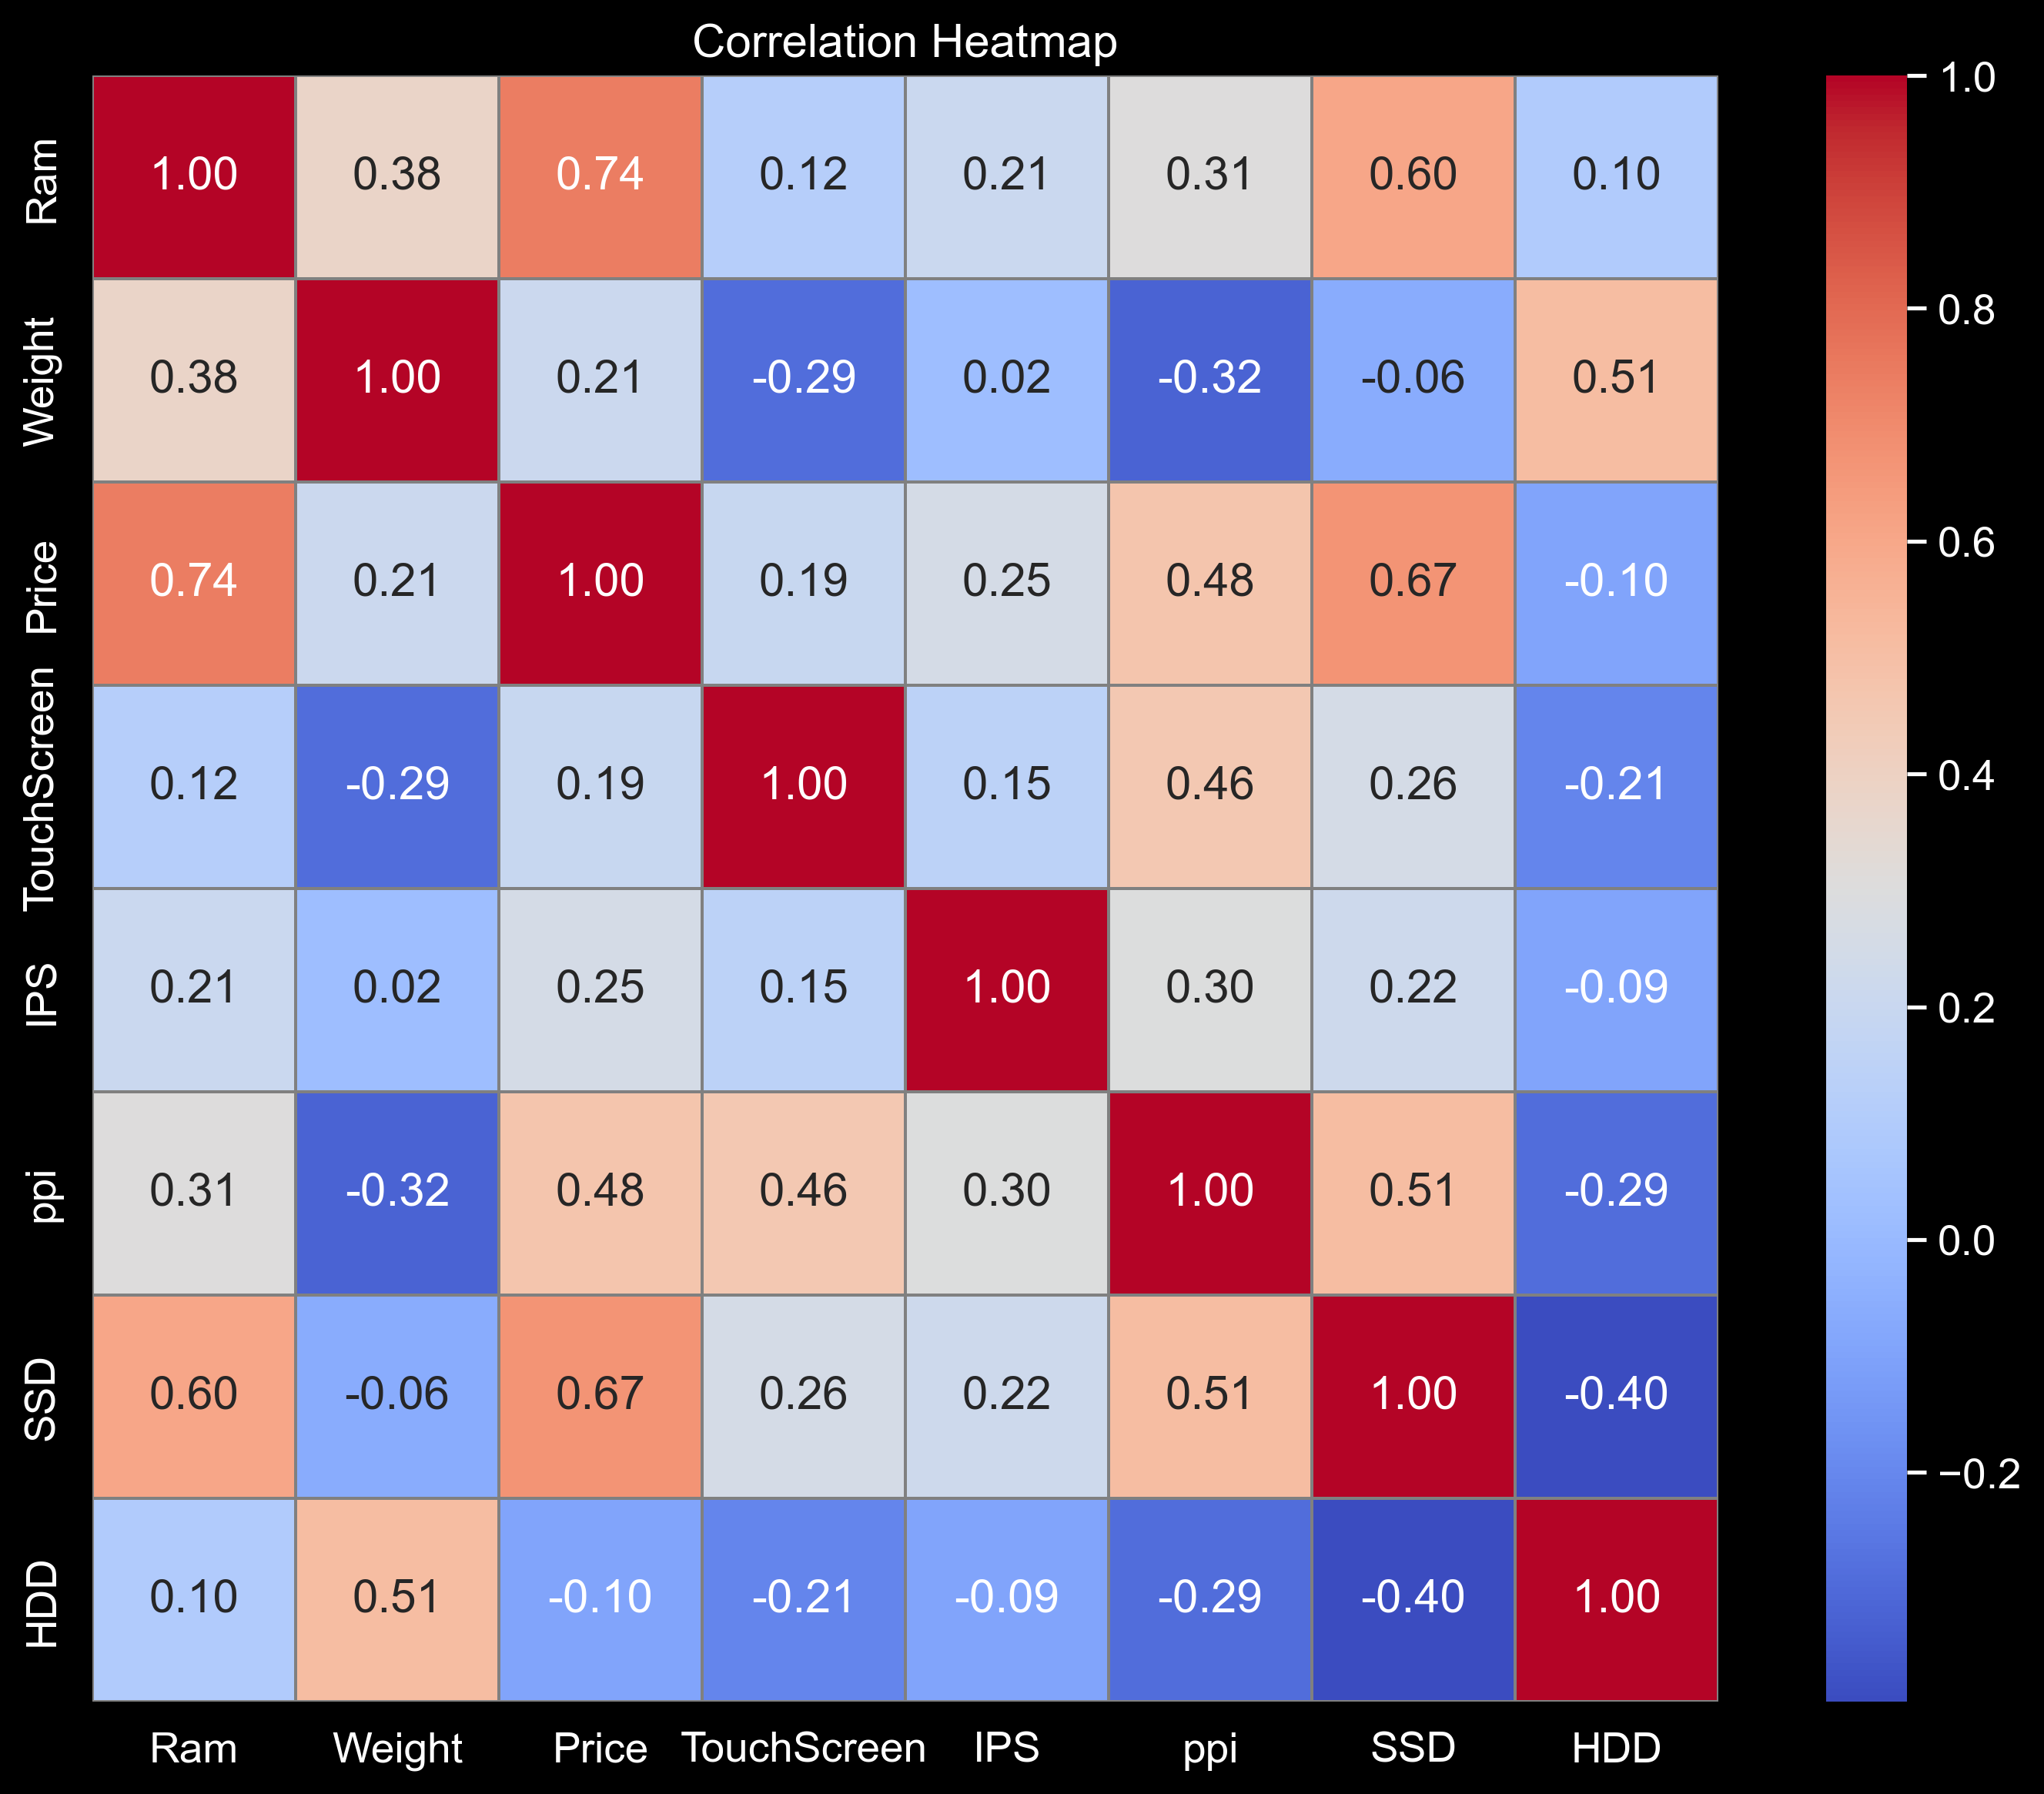

In [110]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8), dpi=300)

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('distributions/correlation_heatmap.png', dpi=300)
plt.show()

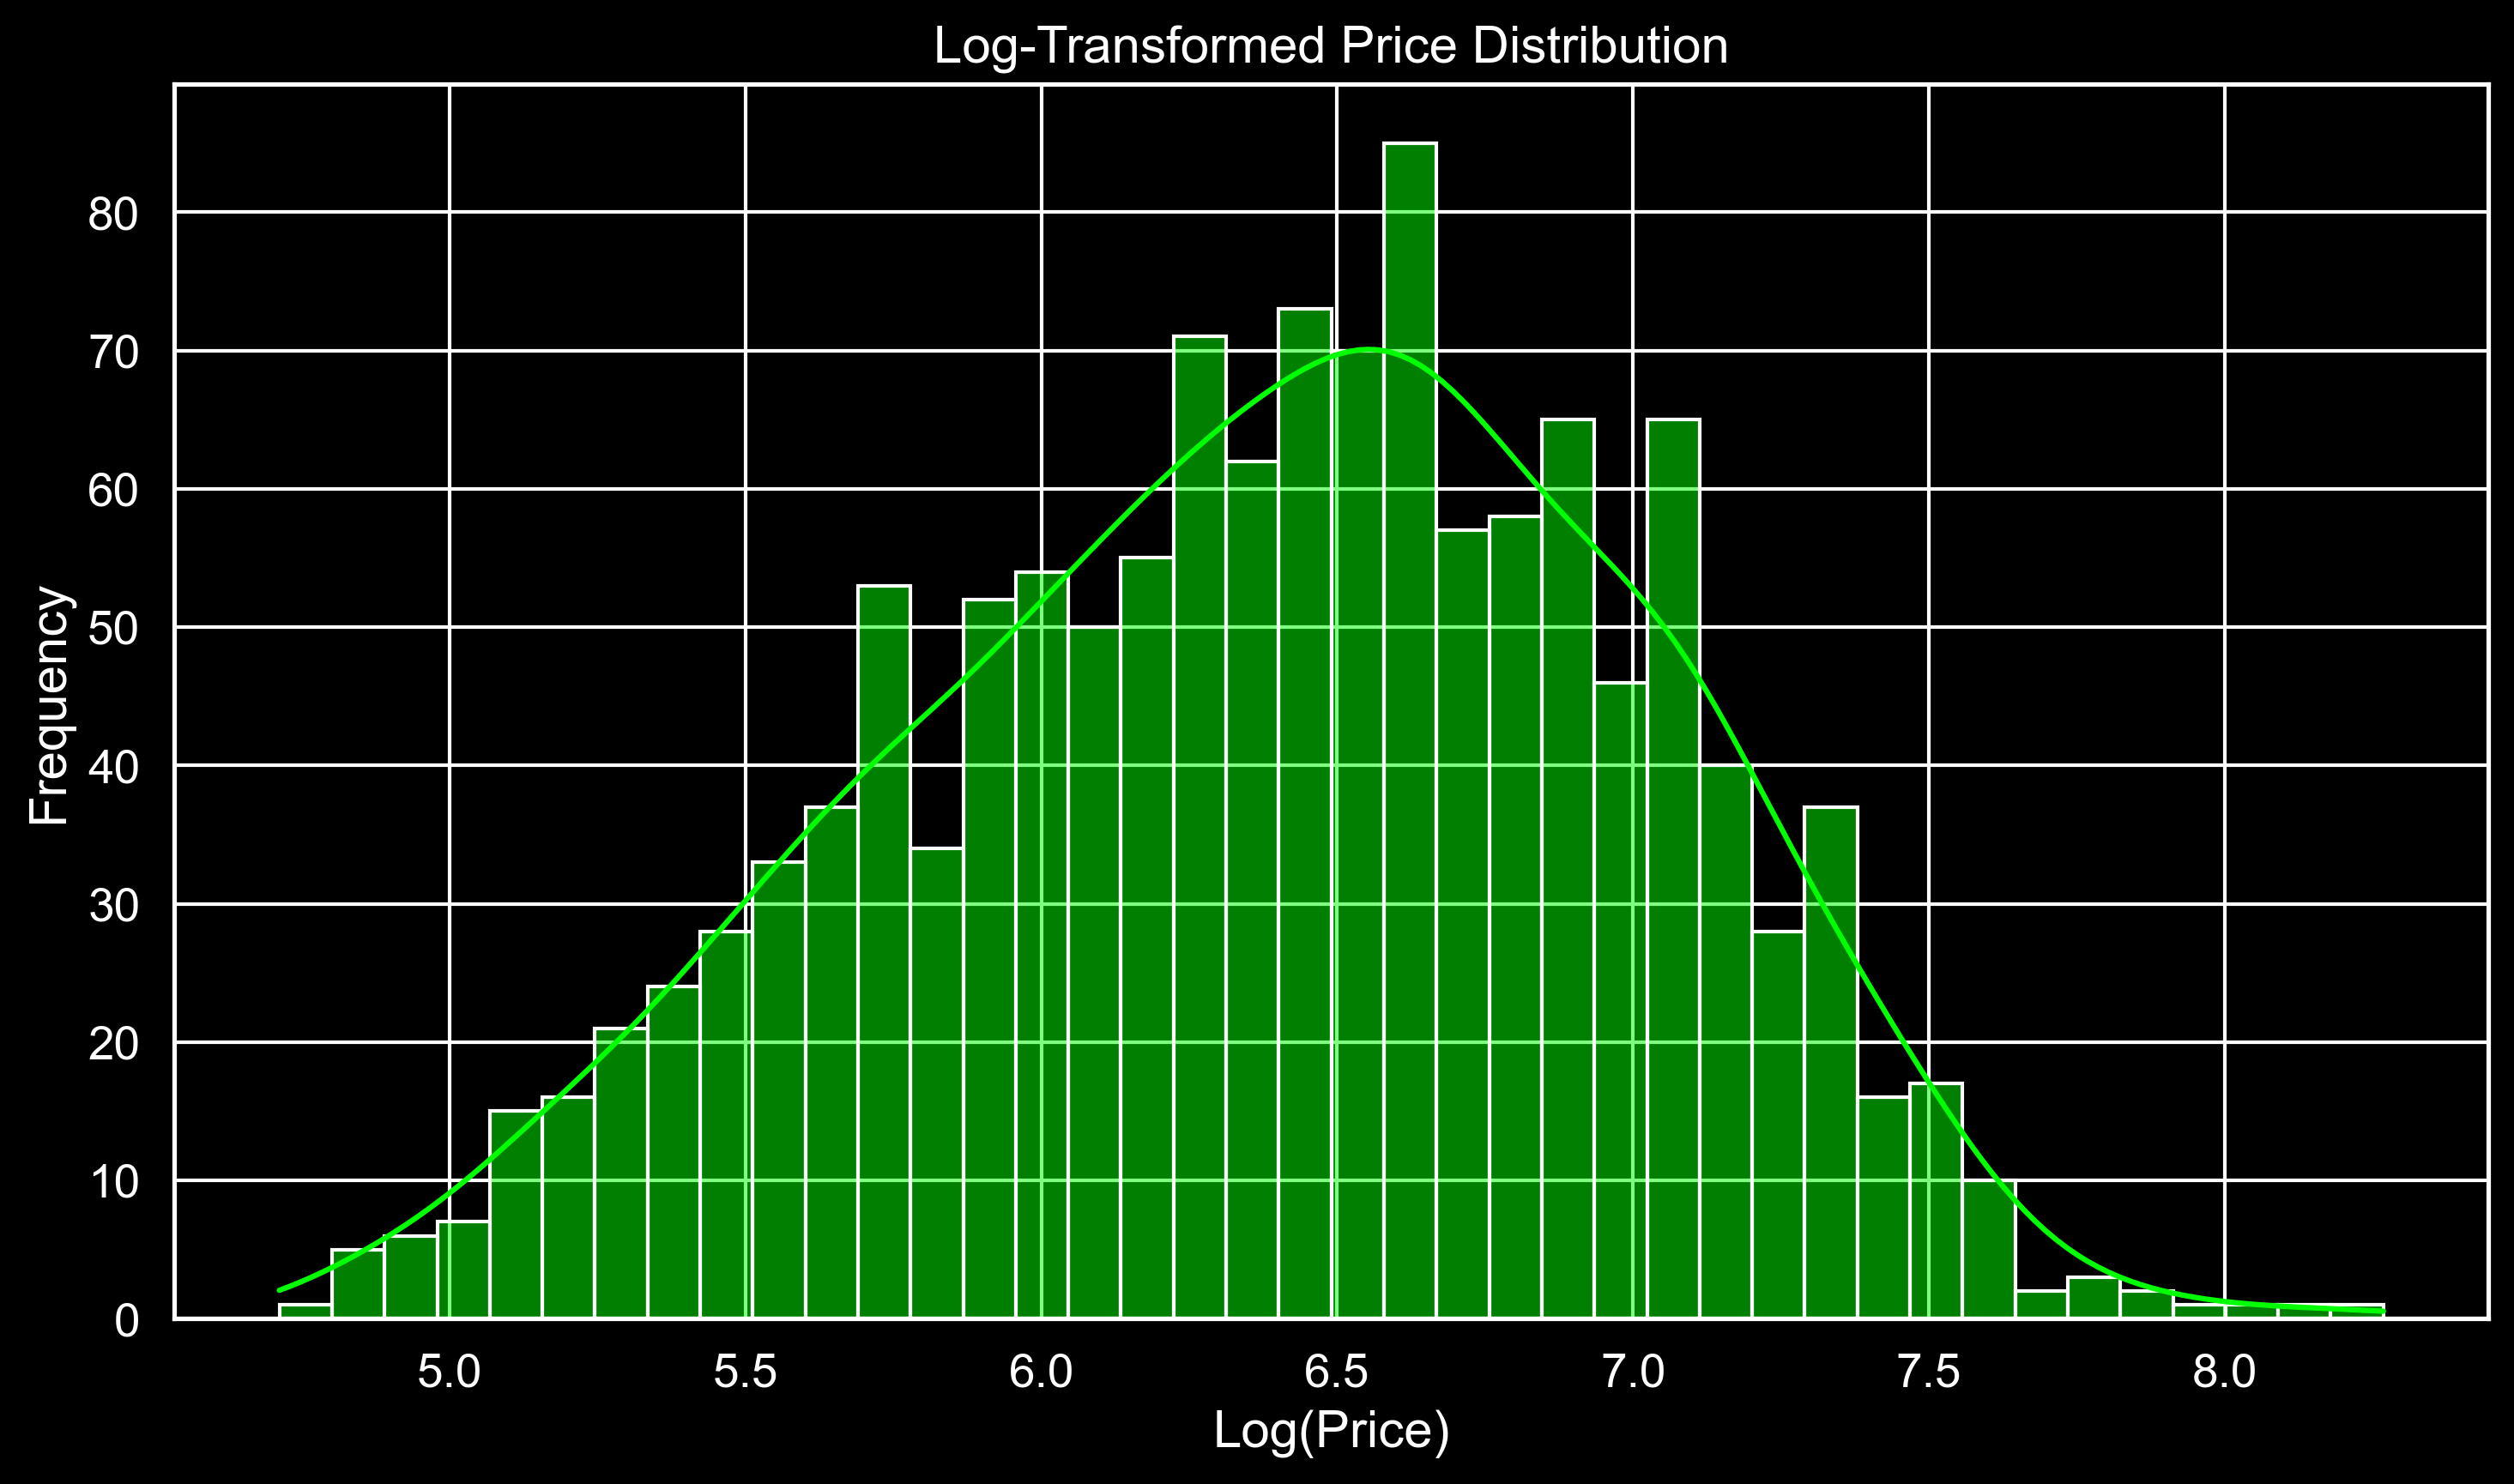

In [115]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), dpi=300)

sns.histplot(np.log(df['Price']), kde=True, color='lime', bins=40)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distributions/log_price_distribution.png', dpi=300)
plt.show()

In [126]:
df.to_csv('cleaned_laptop_data.csv', index=False)